#Supplementary Material: Collapse and control of the MnAu$_{2}$ spin spiral state through pressure and doping

J. K. Glasbrenner

National Research Council/Code 6393, Naval Research Laboratory, Washington, DC 20375, USA

*****

## Overview

The supplemental material for the paper entitled "Collapse and control of the MnAu$_{2}$ spin spiral state through pressure and doping" is being distributed as an IPython notebook. This document contains marked up Python code detailing how we analyzed our density functional theory calculations, and also includes additional, in-depth discussion not featured in the main text, similar to traditional supplemental materials. The data and analysis used to generate the figures in our main text are contained here for review.

For those that are not familiar, an IPython notebook is analogous to a Mathematica notebook, except that the backend is the Python language. This mode of distribution brings the advantage that readers can verify our calculations and analysis for themselves.

This notebook was generated using the following software:
- [Python3](http://www.python.org) (v3.4.3)
- Python3 modules: [Numpy](http://www.numpy.org) (v1.9.2), [Scipy](http://www.scipy.org) (v0.15.1), [IPython](http://www.ipython.org) (v3.1.0), [Matplotlib](http://www.matplotlib.org) (v1.4.3), [Sympy](http://www.sympy.org) (v0.7.6), [Statsmodels](http://statsmodels.sourceforge.net/) (v0.6.1)

# Table of Contents

1. [Setup](#Setup)
    1. [Modules](#Modules)
    2. [Functions](#Functions)
    3. [Constants](#Constants)
    4. [Data Import](#Data-Import)
2. [Dependence of crystal structure on volume/pressure](#Dependence-of-crystal-structure-on-volume/pressure)
3. [Investigation of Heisenberg Model](#Investigation-of-Heisenberg-model)
    1. [Case 1: $j_{1}, j_{2} \neq-0$, $j_{3} = j_{4} = 0$](#Case-1:-$j_{1},-j_{2}-\neq-0$,-$j_{3}-=-j_{4}-=-0$)
    2. [Case 2: $j_{1}, j_{2}, j_{3} \neq 0$, $j_{4} = 0$](#Case-2:-$j_{1},-j_{2},-j_{3}-\neq-0$,-$j_{4}-=-0$)
    3. [Case-3: $j_{1}, j_{2}, j_{3}, j_{4} \neq 0$](#Case-3:-$j_{1},-j_{2},-j_{3},-j_{4}-\neq-0$)
4. [Fitting DFT spin spiral calculations](#Fitting-DFT-spin-spiral-calculations)
    1. [Pressure dependence](#Pressure-dependence)
        1. [U = 3.12 eV](#P:-U-=-3.12-eV)
        2. [U = 4.7 eV](#P:-U-=-4.7-eV)
    2. [Charge dosing](#Charge-dosing)
        1. [U = 3.12 eV](#Dosing:-U-=-3.12-eV)
        2. [U = 4.7 eV](#Dosing:-U-=-4.7-eV)
    3. [Virtual crystal approximation](#Virtual-Crystal-Approximation)
        1. [U = 3.12 eV](#VCA:-U-=-3.12-eV)
        2. [U = 4.7 eV](#VCA:-U-=-4.7-eV)
    4. [Hubbard *U*](#Hubbard-U)
5. [Visualization of results](#Visualization-of-results)
    1. [Pressure/Dosing/VCA/U dependence of exchange parameters](#Pressure/Dosing/VCA/U-dependence-of-exchange-parameters)
        1. [Visualizing unscaled exchange parameters](#Visualizing-unscaled-exchange-parameters)
        2. [Visualizing scaled exchange parameters](#Visualizing-scaled-exchange-parameters)
    2. [Pressure/Dosing/VCA/U dependence of $\theta$](#Pressure/Dosing/VCA/U-dependence-of-$\theta$)
    3. [Parametric plot of $j_{3}, j_{4}$ on contour plot of spiral-to-FM transition surface](#Parametric-plot-of-$j_{3},-j_{4}$-on-contour-plot-of-spiral-to-FM-transition-surface)
    4. [Evolution of MnAu$_{2}$ on $\theta$ contour plot for $J_{1}-J_{2}-J_{3}-J_{4}$ model](#Evolution-of-MnAu$_{2}$-on-$\theta$-contour-plot-for-$J_{1}-J_{2}-J_{3}-J_{4}$-model)
        1. [P Diagram: U = 3.12 eV](#P-Diagram:-U-=-3.12-eV)
        2. [P Diagram: U = 4.7 eV](#P-Diagram:-U-=-4.7-eV)
        3. [Dosing Diagram: U = 3.12 eV](#Dosing-Diagram:-U-=-3.12-eV)
        4. [Dosing Diagram: U = 4.7 eV](#Dosing-Diagram:-U-=-4.7-eV)
        5. [VCA Diagram: U = 3.12 eV](#VCA-Diagram:-U-=-3.12-eV)
        6. [VCA Diagram: U = 4.7 eV](#VCA-Diagram:-U-=-4.7-eV) 
        7. [U Diagram](#U-Diagram)
6. [Python code](#Python-code)
    1. [Routine to calculate $j_{2}-j_{3}-j_{4}$ phase diagrams](#Routine-to-calculate-$j_{2}-j_{3}-j_{4}$-phase-diagrams)
        1. [Scanning $j_{4}$](#Scanning-$j_{4}$)
        2. [Using fitted exchange parameters](#Using-fitted-exchange-parameters)
    2. [Routine to calculate contour plot of $j_{2}, j_{3}, j_{4}$ surface separating FM and spiral phases](#Routine-to-calculate-contour-plot-of-$j_{2},-j_{3},-j_{4}$-surface-separating-FM-and-spiral-phases)
    3. [Routine to find the 1st/2nd order dividing line in $j_{3}, j_{4}$ space](#Routine-to-calculate-contour-plot-of-$j_{2},-j_{3},-j_{4}$-surface-separating-FM-and-spiral-phases)

# Setup
[Return to Table of Contents](#Table-of-Contents)

Here we set up our Python environment by importing the necessary modules, creating functions, defining constants, and importing data.

## Modules
[Return to Table of Contents](#Table-of-Contents)

In [1]:
# Set up matplotlib
%matplotlib inline

# Import modules
from pathlib import Path
import sympy
import sympy.mpmath as mp
from sympy.utilities.lambdify import lambdify
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from scipy import interpolate
from scipy.optimize import minimize_scalar
from scipy import integrate
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import AutoMinorLocator
from matplotlib.legend_handler import HandlerLine2D


# Set unicode printing
sympy.init_printing(use_unicode=True)

## Functions
[Return to Table of Contents](#Table-of-Contents)

Here we define the functions we will use in the IPython Notebook.

In [2]:
def e_vs_v_model(x, a, b, c, d, e):
    return a + b*x + c*x**2 + d*x**3 + e*x**4


def cos_term(th, n):
    return np.cos(np.float(n) * th * (np.pi / np.float(180)))


def jcos_model(th, a, j1, j2, j3, j4):
    return a + j1 * cos_term(th, 1) + j2 * cos_term(th, 2) + j3 * cos_term(th, 3) + j4 * cos_term(th, 4)


def q_to_th(q):
    return np.float(360) * q


def superexchange_model(U, t, D):
    return (2 * t ** 4)/(U * (U - D) ** 2) * ((3 * U - D)/(U - D))


# Define function to calculate energies of the J1-J2-J3-J4 model
def np_full_heismodel_calc(x, j1, j2, j3, j4, a):
    tmp = a + j1 * np.cos(x) + j2 * np.cos(2 * x) + j3 * np.cos(3 * x) + j4 * np.cos(4 * x)
    return tmp


def np_heismodel_calc(th, j2, j3, j4):
    tmp = - np.cos(th) + j2 * np.cos(2 * th) + j3 * np.cos(3 * th) + j4 * np.cos(4 * th)
    return tmp


# Define functions for the theta^{\pm}_{2} solutions
def np_th2p(j2, j3):
    tmp = np.arccos((-j2 + np.sqrt(j2 ** 2 + 3 * j3 + 9 * j3 **2)) / (6 * j3))
    return tmp


def np_th2m(j2, j3):
    tmp = np.arccos((-j2 - np.sqrt(j2 ** 2 + 3 * j3 + 9 * j3 **2)) / (6 * j3))
    return tmp


# Define function to minimize model
def np_full_heismodel_optimize(j1, j2, j3, j4, a, lower_bound, upper_bound):
    def tmp_func(x):
        return a + j1 * np.cos(x) + j2 * np.cos(2 * x) + j3 * np.cos(3 * x) + j4 * np.cos(4 * x)
    return minimize_scalar(tmp_func, bounds=(lower_bound, upper_bound), method='bounded', options={'xatol': 1e-15})


def np_heismodel_optimize(j2, j3, j4, lower_bound, upper_bound):
    def tmp_func(x):
        return - np.cos(x) + j2 * np.cos(2 * x) + j3 * np.cos(3 * x) + j4 * np.cos(4 * x)
    return minimize_scalar(tmp_func, bounds=(lower_bound, upper_bound), method='bounded', options={'xatol': 1e-15})


# OLS fitting function
def heis_model_regression(data_array):
    # Temporary variables
    tmp_x = q_to_th(data_array[:, 0])
    tmp_y = data_array[:, 1]
    
    # Define list for Hamiltonian matrix
    jcos_fitting = []

    # Create interpolation
    interpolation_curve = interpolate.InterpolatedUnivariateSpline(tmp_x, tmp_y)
    
    # Build Hamiltonian matrix
    for item in tmp_x:
        jcos_fitting.append([1, cos_term(item, 1), cos_term(item, 2), cos_term(item, 3), cos_term(item, 4)])
    
    # Convert jcos_fitting into numpy array
    jcos_fitting = np.array(jcos_fitting).astype(float)
    
    # Run linear regression analysis
    results_jcos_fit = sm.OLS(tmp_y, jcos_fitting).fit()
    
    # Output linear regression results and interpolated curve
    return results_jcos_fit, interpolation_curve


# Model minimization function
def heismodel_angle_energy_min(j1, j2, j3, j4, a, lower_bound, upper_bound):
    # Temporary variable
    tmp_fm_energy = np_full_heismodel_calc(0, j1, j2, j3, j4, a)
    
    # Optimize model with given parameters
    tmp_model_opt = np_full_heismodel_optimize(j1, j2, j3, j4, a, lower_bound, upper_bound)
    
    # Convert minimized angle into degrees
    tmp_res = tmp_model_opt.x * 180 / np.pi
    
    # Check minima solution against FM solution to check which is lower in energy
    if np.abs(tmp_res) < 1e-3:
        tmp_model_energy = 0
        tmp_model_angle = 0
    else:
        tmp_delta = tmp_model_opt.fun - tmp_fm_energy
        if tmp_delta < 0:
            tmp_model_energy = tmp_delta
            tmp_model_angle = tmp_res
        else:
            tmp_model_energy = 0
            tmp_model_angle = 0
            
    # Output energy and angle
    return tmp_model_angle, tmp_model_energy


# Energy checker
def append_interpolation_energy_check(th_min_list, interpolation_curve, parameter_name, tmp_theta_min):
    # Calculate energy difference between minimized angle and FM solution
    delta_check = np.abs(interpolation_curve(tmp_theta_min) - interpolation_curve(0))
    
    # If energy difference exceeds a threshold, keep optimized solution. Otherwise, use FM solution.
    if delta_check > 0.5:
        th_min_list.append([np.float(parameter_name), tmp_theta_min, float(interpolation_curve(tmp_theta_min))])
    else:
        th_min_list.append([np.float(parameter_name), np.float(0.0), np.float(0.0)])


# Generate a fitline
def gen_fitline(a, j1, j2, j3, j4):
    # Define tmp list
    tmp_fitline = []
    
    # Define theta variable
    th = np.float(0)
    
    # Generate fitline
    while th <= 200:
        tmp_fitline.append([th, jcos_model(th, a, j1, j2, j3, j4)])
        th = th + 0.2
        
    # Output result
    return np.array(tmp_fitline)


# Run spin spiral fitting and plotting routine
def spinsprl_fit_and_plot(data_list, title_type, fig, row, col):
    # Define lists
    list_fit_results = []
    theta_minimum = []
    theta_minimum_model = []
    j_list = []
    scaled_j = []
    
    for j in range(len(data_list)):
        # Temporary variables
        entry = data_list[j]
        data_array = entry[1]
        tmp_x = q_to_th(data_array[:, 0])
        tmp_y = data_array[:, 1]
    
        # Run linear regression and interpolation of data
        results_jcos_fit, interpolation_curve = heis_model_regression(entry[1])
    
        # Extract parameters from linear regression
        a, j1, j2, j3, j4 = results_jcos_fit.params
        aerr, j1err, j2err, j3err, j4err = results_jcos_fit.bse
        rsquared = results_jcos_fit.rsquared

        # Minimize model using fitted parameters
        tmp_model_angle, tmp_model_energy = heismodel_angle_energy_min(j1, j2, j3, j4, a, 0, 3 * np.pi / 4)
    
        # Minimize the interpolated curve
        tmp_theta_min = minimize_scalar(interpolation_curve, bounds=(0, 170), method='bounded')
    
        # Built lists of fitted parameters
        list_fit_results.append([np.float(entry[0]), j1, j1err, j2, j2err, j3, j3err, j4, j4err, a, aerr, rsquared])
        j_list.append([np.float(entry[0]), j1, j2, j3, j4])
        scaled_j.append([np.float(entry[0]), j2 / np.abs(j1), j3 / np.abs(j1), j4 / np.abs(j1), a / np.abs(j1)])
        theta_minimum_model.append([entry[0], tmp_model_angle, tmp_model_energy])
        append_interpolation_energy_check(theta_minimum, interpolation_curve, entry[0], tmp_theta_min.x)

        # Plot results
        fitline = gen_fitline(a, j1, j2, j3, j4)
        tmp_plot = [[tmp_x, tmp_y, 'ro', "Data"],
                    [fitline[:, 0], fitline[:, 1], 'b-', "Fit"]]
        # Set title
        if title_type == 0:
            tmp_title = "P = " + str(entry[0]) + " kbar"
        elif title_type == 1:
            tmp_title = "Charge dosing: " + str(entry[0])
        elif title_type == 2:
            tmp_title = "VCA doping: " + str(entry[0])
        elif title_type == 3:
            tmp_title = "U: " + str(entry[0])
        else:
            tmp_title = "Untitled"
        ax = fig_plot_norange(fig, row, col, int(j+1), r"$\theta$ $(^{\circ})$", r"E($\theta$) - E(0) (meV/Mn)", tmp_title, tmp_plot)
        ax.axhspan(0, 0, 0, 1)
        ax.legend(loc="best")
    
    # Output lists
    return list_fit_results, j_list, scaled_j, theta_minimum, theta_minimum_model


# Create lists for visualizing exchange constants
def create_subplot_list(in_list, x, y, marker, label):
    in_list.append([x, y, marker, label])


def create_full_subp(data_list, color_list, label_list, numj):
    for entry in data_list:
        tmp_subp = entry[0]
        item = entry[1]
        xy_plot_list = []
        for j in range(numj):
            xy_plot_list.append([item[:, 0], item[:, int(j + 1)]])
        for i in range(len(xy_plot_list)):
            tmp_x = xy_plot_list[i][0]
            tmp_y = xy_plot_list[i][1]
            tmp_marker = color_list[i]
            tmp_label = label_list[i]
            create_subplot_list(tmp_subp, tmp_x, tmp_y, tmp_marker, tmp_label)

            
# Test that j2 is greater or lesser than j2c
def j2c_test(j2, j3, j4):
    tmp_fm_energy = np_heismodel_calc(0, j2, j3, j4)
    tmp_res = np_heismodel_optimize(j2, j3, j4, 0, 3*np.pi/4)
    tmp_angle = tmp_res.x * 180 / np.pi
    if np.abs(tmp_angle) > 1e-3:
        tmp_delta = tmp_res.fun - tmp_fm_energy
        if tmp_delta < 0:
            return True
        else:
            return False
    else:
        return False


# Figure plotting
def fig_plot(fig_name, rows, cols, n, x_label, y_label, in_title, axisrange, plot_list):
    # Initialize the figure
    ax = fig_name.add_subplot(rows, cols, n)

    # Set up labels
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(in_title)

    # Set up ranges
    ax.axis(axisrange)

    # Plot the data
    for entry in plot_list:
        x_plot = entry[0]
        y_plot = entry[1]
        point_style = entry[2]
        in_label = entry[3]
        ax.plot(x_plot, y_plot, point_style, label=in_label)
        
    # Return subplot for additional processing
    return ax


def fig_plot_norange(fig_name, rows, cols, n, x_label, y_label, in_title, plot_list):
    # Initialize the figure
    ax = fig_name.add_subplot(rows, cols, n)

    # Set up labels
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(in_title)

    # Plot the data
    for entry in plot_list:
        x_plot = entry[0]
        y_plot = entry[1]
        point_style = entry[2]
        in_label = entry[3]
        ax.plot(x_plot, y_plot, point_style, label=in_label)
        
    # Return subplot for additional processing
    return ax


def fig_plot3d(fig_name, rows, cols, n, x_label, y_label, z_label, in_title, plot_list):
    # Initialize the figure
    ax = fig.add_subplot(rows, cols, n, projection='3d')

    # Set up labels
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)    
    ax.set_title(in_title)
    
    # Plot the data
    for entry in plot_list:
        x_plot = entry[0]
        y_plot = entry[1]
        z_plot = entry[2]
        color_style = entry[3]
        in_label = entry[4]
        ax.plot_surface(x_plot, y_plot, z_plot, color=color_style, label=in_label)
        
    # Retrun subplot for additional processing
    return ax


def fig_contour(fig_name, rows, cols, n, x_label, y_label, in_title, plot_list):
    # Initialize the figure
    ax = fig.add_subplot(rows, cols, n)

    # Set up labels
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)  
    ax.set_title(in_title)

    # Plot the data
    for entry in plot_list:
        x_plot = entry[0]
        y_plot = entry[1]
        z_plot = entry[2]
        in_levels = entry[3]
        in_cmap = entry[4]
        in_origin = entry[5]
        j3contourf = ax.contourf(x_plot, y_plot, z_plot, in_levels, cmap=in_cmap, origin=in_origin)
        j3contour = ax.contour(x_plot, y_plot, z_plot, levels=j3contourf.levels[::5], colors = ('k'))
        cb = fig.colorbar(j3contourf)
        cb.add_lines(j3contour)
    
    # Return subplot for additional processing
    return ax


# For plotting j2,j3,j4 critical values
def fig_contour2(fig_name, rows, cols, n, x_label, y_label, in_title, plot_list, xtmin, xtmax, xtstep, ytmin, ytmax, ytstep, cbmin, cbmax, cbstep, cbar_label):
    # Initialize the figure
    ax = fig.add_subplot(rows, cols, n)

    # Set up labels
    ax.set_xlabel(x_label, fontsize = 17)
    ax.set_ylabel(y_label, fontsize = 17)  
    ax.set_title(in_title)
    ax.set_xticks(np.arange(xtmin, xtmax, xtstep))
    ax.set_yticks(np.arange(ytmin, ytmax, ytstep))
    
    # Modify ticks
    ax.tick_params(axis='both', color='k', length=6, width=2)
    ax.tick_params(which='minor', axis='both',
                   color='k', length=3.5, width=1)
    
    # Add minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator()) 
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    # Plot the data
    for entry in plot_list:
        x_plot = entry[0]
        y_plot = entry[1]
        z_plot = entry[2]
        in_levels = entry[3]
        in_cmap = entry[4]
        in_origin = entry[5]
        j3contourf = ax.contourf(x_plot, y_plot, z_plot, in_levels, cmap=in_cmap, origin=in_origin)
        j3contour = ax.contour(x_plot, y_plot, z_plot, levels=j3contourf.levels[::5], colors = ('k'))
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.2)
        cb = fig.colorbar(j3contourf, cax = cax, orientation='vertical', ticks=np.arange(cbmin, cbmax, cbstep))
        cb.add_lines(j3contour)
        cb.ax.set_ylabel(cbar_label)
    
    # Return subplot for additional processing
    return ax


def fig_contour3(fig_name, rows, cols, n, x_label, y_label, in_title, plot_list, xtmin, xtmax, xtstep, ytmin, ytmax, ytstep, cbmin, cbmax, cbstep):
    # Initialize the figure
    ax = fig.add_subplot(rows, cols, n)

    # Set up labels
    ax.set_xlabel(x_label, fontsize = 22)
    ax.set_ylabel(y_label, fontsize = 22)  
    ax.set_title(in_title)
    ax.set_xticks(np.arange(xtmin, xtmax, xtstep))
    ax.set_yticks(np.arange(ytmin, ytmax, ytstep))
    
    ax.tick_params(axis='both', color='k', length=6, width=2)
    # Make the minor ticks white as well
    # The "which='minor'" argument is needed because 
    # the default is the 'major' axes
    ax.tick_params(which='minor', axis='both',
                   color='k', length=3.5, width=1)
    
    # Add minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator()) 
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    # Plot the data
    for entry in plot_list:
        x_plot = entry[0]
        y_plot = entry[1]
        z_plot = entry[2]
        in_levels = entry[3]
        in_cmap = entry[4]
        in_origin = entry[5]
        j3contourf = ax.contourf(x_plot, y_plot, z_plot, in_levels, cmap=in_cmap, origin=in_origin)
        j3contour = ax.contour(x_plot, y_plot, z_plot, levels=j3contourf.levels[::5], colors = ('k'))
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.2)
        cb = fig.colorbar(j3contourf, cax = cax, orientation='vertical', ticks=np.arange(cbmin, cbmax, cbstep))
        cb.add_lines(j3contour)
        cb.ax.set_ylabel(r"$J_{2} / \vert J_{1} \vert$", fontsize=22)
    
    # Return subplot for additional processing
    return ax


## Functions for printing output
# Print exchange constants from fit
def print_exchange_const(list_results, variable):
    print('{0:8s}  {1:8s}  {2:8s}  {3:8s}  {4:8s}  {5:8s}  {6:8s}  {7:8s}  {8:8s}  {9:8s}  {10:8s}  {11:5s}'.format(str(variable).rjust(7), 'j1'.rjust(8), 'j1 Err'.rjust(8), 'j2'.rjust(8), 'j2 Err'.rjust(8), 'j3'.rjust(8), 'j3 Err'.rjust(8), 'j4'.rjust(8), 'j4 Err'.rjust(8), 'const'.rjust(8), 'const Er'.rjust(8), 'R^2'.rjust(5)))
    for entry in list_results:
        var = np.float(entry[0])
        j1 = entry[1]
        j1err = entry[2]
        j2 = entry[3]
        j2err = entry[4]
        j3 = entry[5]
        j3err = entry[6]
        j4 = entry[7]
        j4err = entry[8]
        a = entry[9]
        aerr = entry[10]
        rsquared = entry[11]
        print('{0:8.3f}  {1:8.4f}  {2:8.4f}  {3:8.4f}  {4:8.4f}  {5:8.4f}  {6:8.4f}  {7:8.4f}  {8:8.4f}  {9:8.4f}  {10:8.4f}  {11:5.3f}'.format(var, j1, j1err, j2, j2err, j3, j3err, j4, j4err, a, aerr, rsquared))


# Print scaled exchange constants from fit
def print_scaled_exchange_consts(list_results, variable):
    print('{0:8s}  {1:8s}  {2:8s}  {3:8s}  {4:8s}'.format(str(variable).rjust(7), 'j2/j1'.rjust(8), "j3/j1".rjust(8), "j4/j1".rjust(8), "const/j1".rjust(8)))
    for entry in list_results:
        tmp_col1 = entry[0]
        tmp_col2 = entry[1]
        tmp_col3 = entry[2]
        tmp_col4 = entry[3]
        tmp_col5 = entry[4]
        print('{0:8.3f}  {1:8.4f}  {2:8.4f}  {3:8.4f}  {4:8.4f}'.format(tmp_col1, tmp_col2, tmp_col3, tmp_col4, tmp_col5))


# Print minimized theta results
def print_min_theta(list_results1, list_results2, variable):
    print('{0:8s}  {1:9s}  {2:14s}  {3:9s}  {4:14s}'.format(str(variable).rjust(7), 'theta_min'.rjust(9), "Energy".rjust(14), "model_th".rjust(9), "model_E".rjust(14)))
    for i in range(len(list_results1)):
        tmp_col1 = list_results1[i][0]
        tmp_col2 = list_results1[i][1]
        tmp_col3 = list_results1[i][2]
        tmp_col4 = list_results2[i][1]
        tmp_col5 = list_results2[i][2] 
        print('{0:8.3f}  {1:9.2f}  {2:14.6f}  {3:9.2f}  {4:14.6f}'.format(tmp_col1, tmp_col2, tmp_col3, tmp_col4, tmp_col5))

## Constants
[Return to Table of Contents](#Table-of-Contents)

Here we define constants to use throughout the notebook.

In [3]:
# Raw path for data files
DATAPATH = Path("./data")
OUTPUTPATH = Path('./output')

# Convert eV/Ang to kbar
eVAng_to_kbar = (1.60217657E-19/(1.0E-10)**3) * (1.0E-8)

## Data Import
[Return to Table of Contents](#Table-of-Contents)

Here we import the data we're going to use in the notebook.

In [4]:
# Import relaxation data
relaxation_data = np.loadtxt(str(DATAPATH / "vasp_relaxation.dat"))

## U = 4.7 eV calculations
# Import spinsprl results with experimental lattice parameters
exp_data = np.loadtxt(str(DATAPATH / "elk_experiment.dat"))

# Import pressure spinsprl results
p34_data = np.loadtxt(str(DATAPATH / "elk_p34.818690.dat"))
p37_data = np.loadtxt(str(DATAPATH / "elk_p37.305894.dat"))
p39_data = np.loadtxt(str(DATAPATH / "elk_p39.792797.dat"))
p42_data = np.loadtxt(str(DATAPATH / "elk_p42.279983.dat"))
p44_data = np.loadtxt(str(DATAPATH / "elk_p44.766790.dat"))
p47_data = np.loadtxt(str(DATAPATH / "elk_p47.254016.dat"))
p49_data = np.loadtxt(str(DATAPATH / "elk_p49.741042.dat"))
p52_data = np.loadtxt(str(DATAPATH / "elk_p52.228134.dat"))
p54_data = np.loadtxt(str(DATAPATH / "elk_p54.715203.dat"))
p57_data = np.loadtxt(str(DATAPATH / "elk_p57.202191.dat"))

# Import chgexs spinsprl results
chg_p001 = np.loadtxt(str(DATAPATH / "elk_chgexs+0.01.dat"))
chg_p002 = np.loadtxt(str(DATAPATH / "elk_chgexs+0.02.dat"))
chg_p005 = np.loadtxt(str(DATAPATH / "elk_chgexs+0.05.dat"))
chg_p010 = np.loadtxt(str(DATAPATH / "elk_chgexs+0.10.dat"))
chg_n001 = np.loadtxt(str(DATAPATH / "elk_chgexs-0.01.dat"))
chg_n002 = np.loadtxt(str(DATAPATH / "elk_chgexs-0.02.dat"))
chg_n005 = np.loadtxt(str(DATAPATH / "elk_chgexs-0.05.dat"))
chg_n010 = np.loadtxt(str(DATAPATH / "elk_chgexs-0.10.dat"))

# Import VCA spinsprl results
vca_au_n0050 = np.loadtxt(str(DATAPATH / "elk_vca-0.050.dat"))
vca_au_n0025 = np.loadtxt(str(DATAPATH / "elk_vca-0.025.dat"))
vca_au_p0025 = np.loadtxt(str(DATAPATH / "elk_vca+0.025.dat"))
vca_au_p0050 = np.loadtxt(str(DATAPATH / "elk_vca+0.050.dat"))

## U = 3.12 eV calculations
# Import spinsprl results with experimental lattice parameters
exp_u312_data = np.loadtxt(str(DATAPATH / "elk_u3.12_experiment.dat"))

# Import pressure spinsprl results
p448_u312_data = np.loadtxt(str(DATAPATH / "elk_u3.12_p44.766790.dat"))
p454_u312_data = np.loadtxt(str(DATAPATH / "elk_u3.12_p45.432960.dat"))
p461_u312_data = np.loadtxt(str(DATAPATH / "elk_u3.12_p46.145408.dat"))
p467_u312_data = np.loadtxt(str(DATAPATH / "elk_u3.12_p46.669994.dat"))
p472_u312_data = np.loadtxt(str(DATAPATH / "elk_u3.12_p47.254016.dat"))
p482_u312_data = np.loadtxt(str(DATAPATH / "elk_u3.12_p48.222093.dat"))
p491_u312_data = np.loadtxt(str(DATAPATH / "elk_u3.12_p49.180328.dat"))
p497_u312_data = np.loadtxt(str(DATAPATH / "elk_u3.12_p49.741042.dat"))

# Import chgexs spinsprl results
chg_u312_p005 = np.loadtxt(str(DATAPATH / "elk_u3.12_chgexs+0.05.dat"))
chg_u312_p010 = np.loadtxt(str(DATAPATH / "elk_u3.12_chgexs+0.10.dat"))
chg_u312_n005 = np.loadtxt(str(DATAPATH / "elk_u3.12_chgexs-0.05.dat"))
chg_u312_n010 = np.loadtxt(str(DATAPATH / "elk_u3.12_chgexs-0.10.dat"))

# Import VCA spinsprl results
vca_u312_au_n0050 = np.loadtxt(str(DATAPATH / "elk_u3.12_vca-0.050.dat"))
vca_u312_au_n0025 = np.loadtxt(str(DATAPATH / "elk_u3.12_vca-0.025.dat"))
vca_u312_au_p0025 = np.loadtxt(str(DATAPATH / "elk_u3.12_vca+0.025.dat"))
vca_u312_au_p0050 = np.loadtxt(str(DATAPATH / "elk_u3.12_vca+0.050.dat"))

## Varying U with experimental parameters
u017_data = np.loadtxt(str(DATAPATH / "elk_u1.7.dat"))
u022_data = np.loadtxt(str(DATAPATH / "elk_u2.2.dat"))
u027_data = np.loadtxt(str(DATAPATH / "elk_u2.7.dat"))
u032_data = np.loadtxt(str(DATAPATH / "elk_u3.2.dat"))
u037_data = np.loadtxt(str(DATAPATH / "elk_u3.7.dat"))
u047_data = np.loadtxt(str(DATAPATH / "elk_experiment.dat"))

# Dependence of crystal structure on volume/pressure
[Return to Table of Contents](#Table-of-Contents)

We begin exploring the dependence of the crystal structure on the pressure (or volume) by importing and processing the crystal parameter data. Our calculations were performed using the local spin density approximation (LSDA) to density functional theory (DFT) as implemented in the pseudopotential code [VASP](http://www.vasp.at/). The procedure was as follows:

* Select a volume for the cell.
* Relax the structure in VASP, fixing the volume but allowing the a, c, and $z_{Au}$ parameters to vary.
* Calculate the total energy again in VASP with the newly relaxed structure, this time using the tetrahedron integration method.
* Repeat for a range of volumes.

Below we import the data into the IPython notebook.

In [5]:
relax_volume = relaxation_data[:, 0]
relax_energy = relaxation_data[:, 1]
relax_a_lat = relaxation_data[:, 2]
relax_c_lat = relaxation_data[:, 3]
relax_z_Au = relaxation_data[:, 4]

# Build energy vs volume fitting polynomial
e_vs_v_fitting = []
for item in relax_volume:
    e_vs_v_fitting.append([1, item, item**2, item**3, item**4])
e_vs_v_fitting = np.array(e_vs_v_fitting).astype(float)

We now fit to the E vs V data using the model $E(V) = a + bV + cV^2 + dV^3 + eV^4$. Afterwards, we visualize the calculations and the fit.

Fitting results 
R^2 = 0.9999741854 

coeff         value     std err
a        167.596868    3.917486
b        -13.546691    0.349343
c          0.369205    0.011581
d         -0.004492    0.000169
e          0.000021    0.000001


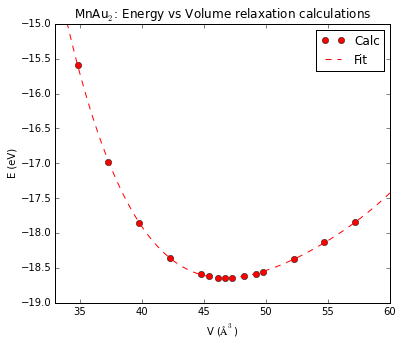

In [6]:
# Polynomial fitting
results_e_vs_v_fit = sm.OLS(relax_energy, e_vs_v_fitting).fit()
a, b, c, d, e = results_e_vs_v_fit.params
a_err, b_err, c_err, d_err, e_err = results_e_vs_v_fit.bse
rsquared = results_e_vs_v_fit.rsquared
print("Fitting results","\nR^2 =",rsquared,"\n")
print('{0:8s} {1:10s}  {2:10s}'.format('coeff'.ljust(8), 'value'.rjust(10), 'std err'.rjust(10)))
print('{0:8s} {1:10.6f}  {2:10.6f}'.format("a".ljust(8), a, a_err))
print('{0:8s} {1:10.6f}  {2:10.6f}'.format("b".ljust(8), b, b_err))
print('{0:8s} {1:10.6f}  {2:10.6f}'.format("c".ljust(8), c, c_err))
print('{0:8s} {1:10.6f}  {2:10.6f}'.format("d".ljust(8), d, d_err))
print('{0:8s} {1:10.6f}  {2:10.6f}'.format("e".ljust(8), e, e_err))

# Generate fitline for plotting
fitline = []
i = 30
while i <= 65:
    fitline.append([i, e_vs_v_model(i, a, b, c, d, e)])
    i = i + 0.1
fitline = np.array(fitline)

# Plot the results
fig = plt.figure(figsize=(6.0, 5.0))
plot_list = [[relax_volume, relax_energy, 'ro', "Calc"],
             [fitline[:, 0], fitline[:, 1], 'r--', "Fit"]]
ax = fig_plot(fig, 1, 1, 1, r'V ($\AA^3$)', 'E (eV)', 'MnAu$_2$: Energy vs Volume relaxation calculations',
             [33, 60, -19, -15], plot_list)
ax.axhspan(0, 0, 0, 1)
ax.legend(loc="best", shadow=False)

The above E vs V curve can be used to create a pressure (P) vs V curve. The relationship between them is $P = - \frac{dE}{dV}$. Below we calculate this, and then plot the P vs V curve.

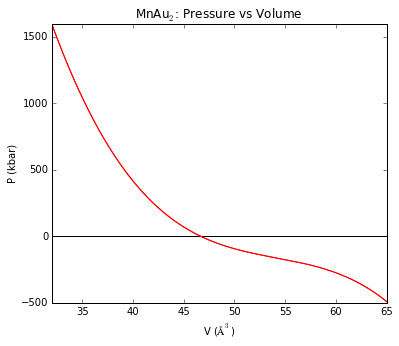

In [7]:
# Obtaining Pressure vs. Volume equation
x = sympy.symbols('x')
fitline_sympy = a + b*x + c*x**2 + d*x**3 + e*x**4
p_vs_v = -sympy.diff(fitline_sympy, x) * eVAng_to_kbar
eval_p_vs_v = lambdify(x, p_vs_v)
x_plot = np.linspace(30, 67, 1000)

# Plot the figure
fig = plt.figure(figsize=(6.0, 5.0))
plot_list = [[x_plot, eval_p_vs_v(x_plot), 'r-', "pressure"]]
ax = fig_plot(fig, 1, 1, 1, r'V ($\AA^3$)', 'P (kbar)', 'MnAu$_2$: Pressure vs Volume',
             [32, 65, -500, 1600], plot_list)
plot_list = [[x_plot, eval_p_vs_v(x_plot), 'r-', "pressure"]]
ax = fig_plot(fig, 1, 1, 1, r'V ($\AA^3$)', 'P (kbar)', 'MnAu$_2$: Pressure vs Volume',
             [32, 65, -500, 1600], plot_list)
ax.axhspan(0, 0, 0, 1)

Having obtained the above curve, we can now calculate the pressure of each considered volume. Note that we've converted our pressures into kbar. We can also calculate the minimized volume, according to DFT.

In [8]:
# Minimize the pressure with respect to volume
print("Minimized Volume =", sympy.solve(sympy.Eq(p_vs_v, 0), x)[0], 'Å^3')

Minimized Volume = 46.6792192405263 Å^3


It is well known that the LSDA functional overbinds materials, and MnAu$_{2}$ is no different. The experimental volume is 49.741042 $Å^{3}$, and so LSDA overbinds by 6%. To correct for this, we shift the pressures so that $P = 0$ corresponds to the experimental volume. The corresponding pressures to our cell volumes are therefore:

In [9]:
# Calculate the pressure for all considered volumes
pressure_list = []
print('{0:15s}   {1:16s}'.format('Volume (Å^3)'.rjust(15), 'Pressure (kbar)'.rjust(16)))
for item in relax_volume:
    tmp_p = float(p_vs_v.subs(x, item) - p_vs_v.subs(x, relax_volume[11]))
    pressure_list.append(tmp_p)
    print('{0:15.6f}   {1:16.3f}'.format(item, tmp_p))
pressure_list = np.array(pressure_list)

   Volume (Å^3)    Pressure (kbar)
      34.818690           1161.544
      37.305894            801.330
      39.792797            524.158
      42.279983            317.691
      44.766790            169.709
      45.432960            138.418
      46.145408            108.353
      46.669994             88.298
      47.254016             67.892
      48.222093             38.109
      49.180408             12.977
      49.741042              0.000
      52.228134            -46.250
      54.715203            -83.129
      57.202191           -122.907


The volumes that correspond to negative pressures were used in fitting to the energy vs volume plot to help determine the DFT energy minimum. When we move on to calculating magnetic energies as a function of the spiral angle, we will only consider $P \geq 0$. So, from this point on we drop the negative pressures from our discussion.

We now visualize the lattice parameters as a function of volume and pressure to see if there are any noteworthy trends.

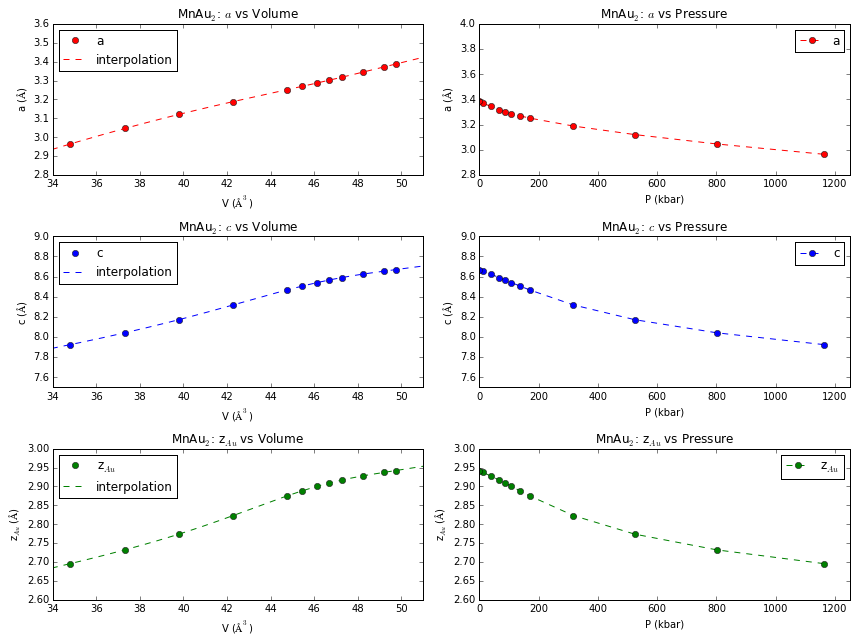

In [10]:
# Interpolate in-plane and c axis results
relax_a_vs_vol_spline = interpolate.InterpolatedUnivariateSpline(relax_volume, relax_a_lat)
relax_c_vs_vol_spline = interpolate.InterpolatedUnivariateSpline(relax_volume, relax_c_lat)
relax_z_vs_vol_spline = interpolate.InterpolatedUnivariateSpline(relax_volume, relax_z_Au)
x_plot = np.linspace(30, 67, 1000)
yplot_a_vs_vol = relax_a_vs_vol_spline(x_plot)
yplot_c_vs_vol = relax_c_vs_vol_spline(x_plot)
yplot_z_vs_vol = relax_z_vs_vol_spline(x_plot)

# Create figure
fig = plt.figure(figsize=(12.0, 9.0))

# Define subplots
subplot_list = [
                [1, 'V ($\AA^3$)', 'a ($\AA$)', 'MnAu$_2$: $a$ vs Volume', [34, 51, 2.8, 3.6],
                 [[relax_volume[0:12], relax_a_lat[0:12], 'ro', "a"], [x_plot, yplot_a_vs_vol, 'r--', "interpolation"]]],
                [3, 'V ($\AA^3$)', 'c ($\AA$)', 'MnAu$_2$: $c$ vs Volume', [34, 51, 7.5, 9.0],
                 [[relax_volume[0:12], relax_c_lat[0:12], 'bo', "c"], [x_plot, yplot_c_vs_vol, 'b--', "interpolation"]]],
                [5, 'V ($\AA^3$)', 'z$_{Au}$ ($\AA$)', 'MnAu$_2$: z$_{Au}$ vs Volume', [34, 51, 2.6, 3.0],
                 [[relax_volume[0:12], relax_z_Au[0:12], 'go', "z$_{Au}$"], [x_plot, yplot_z_vs_vol, 'g--', "interpolation"]]],
                [2, 'P (kbar)', 'a ($\AA$)', 'MnAu$_2$: $a$ vs Pressure', [0, 1250, 2.8, 4.0],
                 [[pressure_list[0:12], relax_a_lat[0:12], 'ro--',"a"]]],
                [4, 'P (kbar)', 'c ($\AA$)', 'MnAu$_2$: $c$ vs Pressure', [0, 1250, 7.5, 9.0],
                 [[pressure_list[0:12], relax_c_lat[0:12], 'bo--', "c"]]],
                [6, 'P (kbar)', 'z$_{Au}$ ($\AA$)', 'MnAu$_2$: z$_{Au}$ vs Pressure', [0, 1250, 2.6, 3.0],
                 [[pressure_list[0:12], relax_z_Au[0:12], 'go--', "z$_{Au}$"]]]
                ]

# Generate subplots
for entry in subplot_list:
    n = entry[0]
    x_label = entry[1]
    y_label = entry[2]
    in_title = entry[3]
    axis_range = entry[4]
    plot_list = entry[5]
    ax = fig_plot(fig, 3, 2, n, x_label, y_label, in_title, axis_range, plot_list)
    ax.legend(loc="best", shadow=False, numpoints=1)

# Improve spacing between subplots
fig.tight_layout()

The main takeaway from the above lattice parameter plots is that the dependence on volume (pressure) is smooth and they monotonically decrease with pressure. The smooth dependence contrasts with the measurement by [Smith *et. al.*, J. Phys. Chem. Sol. **27**, 925 (1966)](http://www.sciencedirect.com/science/article/pii/0022369766900631), where they found that at $T = 77 K$ the $c$ parameter suddenly decreased for $P > 5 \text{ kbar}$, finding that $c(P = 0) - c(P = 8.83) = 0.045 \text{ Å}$. However, the uncertainty of this difference is $\sqrt((0.044)^2 + (0.048)^2) = 0.065$, so within the measurement error.

# Investigation of Heisenberg model
[Return to Table of Contents](#Table-of-Contents)

The fitting model that we use will be

$$E(\theta) = \text{const.} + J_{1} \cos(\theta) + J_{2} \cos(2 \theta) + J_{3} \cos(3 \theta) + J_{4} \cos(4 \theta)$$

To simplify the equation for analysis, we assume that $J_{1} < 0$ (as we'll see, this is the case for all physically realistic pressures and charge dopings) and scale everything by $\lvert J_{1} \rvert$. We also subtract by the constant on both sides:

$$\begin{align}
E_{eff}(\theta) &= \frac{E(\theta) - \text{const.}}{\lvert J_{1} \rvert} \\
&= - \cos(\theta) + j_{2} \cos(2 \theta) + j_{3} \cos(3 \theta) + j_{4} \cos(4 \theta)
\end{align}$$

where $j_{i} = J_{i}/\lvert J_{1} \rvert$.

## Case 1: $j_{1}, j_{2} \neq 0$, $j_{3} = j_{4} = 0$
[Return to Table of Contents](#Table-of-Contents)

Here we explore the parameter space for $E_{eff}(\theta)$ when $j_{3} = j_{4} = 0$. This replicates the results by [U. Enz, J. Appl. Phys. **32**, S22 (1961)](http://scitation.aip.org/content/aip/journal/jap/32/3/10.1063/1.2000413). The model is now

$$E_{eff}(\theta) = - \cos(\theta) + j_{2} \cos(2 \theta)$$

We take the derivative of $\theta$ and set it equal to zero to find the extrema:

$$ 0 = \sin(\theta) - 2 j_{2} \sin(2 \theta) = 0$$

We use the identity $\sin(2 \theta) = 2 \sin(\theta) \cos(\theta)$:

$$\begin{align}
0 &= \sin(\theta) - 4 j_{2} \sin(\theta) \cos(\theta) \\
&= \sin(\theta) \left[ 1 - 4 j_{2} \cos(\theta) \right]
\end{align}$$

To satisfy the equation, we can either set $\sin(\theta) = 0$ or $1 - 4 j_{2} \cos(\theta) = 0$. The first gives us $\theta = n \pi$ where $n = 0, \pi, 2\pi, \dots$, and the second gives us:

$$\theta = \arccos \left( \frac{1}{4 j_{2}} \right)$$

The $\arccos(x)$ is only defined for $-1 \leq x \leq 1$, so this yields the inequality $\lvert \frac{1}{4 j_{2}} \rvert \leq 1$. Plugging in the definition for $j_{2}$, we get the familiar relation

$$\lvert J_{1} \rvert \leq 4 \lvert J_{2} \rvert$$

The model is plotted below.

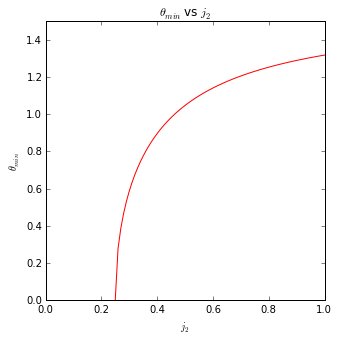

In [11]:
# Data to plot
X = np.arange(0, 1.01, 0.01)
Y = np.arccos(1 / (4 * X))

# Build the figure
fig = plt.figure(figsize=(5, 5))

# Plot figure
plot_list = [[X, Y, 'r-', "model"]]
ax = fig_plot(fig, 1, 1, 1, r"$j_{2}$", r"$\theta_{min}$", r"$\theta_{min}$ vs $j_{2}$", [0, 1, 0, 1.5], plot_list)

As we see in the above plot, the critical value of $j_{2}$ where a spiral angle starts to develop is $j_{2} = \frac{1}{4}$, and the given "spiral" angle by the above formula is $\theta = 0$, equivalent to the ferromagnetic solution, so here they are degenerate. For any $j_{2} > \frac{1}{4}$, the ferromagnetic solution is higher in energy and unstable and the spiral angle is supported, and the spiral angle increases continuously. This indicates that the $J_{1}-J_{2}$ model only supports second-order transitions, and cannot capture instances of first order transitions, such as what was observed in R. Adiatullin and I.G. Fakidov, Sov. Phys. Sol. St. **12**, 2547 (1971).

## Case 2: $j_{1}, j_{2}, j_{3} \neq 0$, $j_{4} = 0$
[Return to Table of Contents](#Table-of-Contents)

Having seen the limitations of considering the simple $J_{1} - J_{2}$ model, we include an additional interplanar interaction, $J_{3}$, and investigate how it modifies the ferromagnetic-to-spiral transition. So now we explore the parameter space for $E_{eff}(\theta)$ when $j_{4} = 0$. This model was previously investigated in [A. Pimpinelli, E. Rastelli, and A. Tassi, J. Phys.: Condens. Matter **1**, 7941 (1989)](http://iopscience.iop.org/0953-8984/1/42/015) and [R. Zinke, J. Richter, and S.-L. Drechsler, J. Phys.: Condens. Matter **22**, 446002 (2010)](http://iopscience.iop.org/0953-8984/22/44/446002).

Below we build up the model in Python and check how the ferromagnetic configuration energy compares with the antiferromagnetic one for all relevant values of $j_{2}$ and $j_{3}$. Based on our DFT calculations, we restrict ourselves to $j_{2} \geq 0$ and $-1 \leq j_{3} \leq 1$.

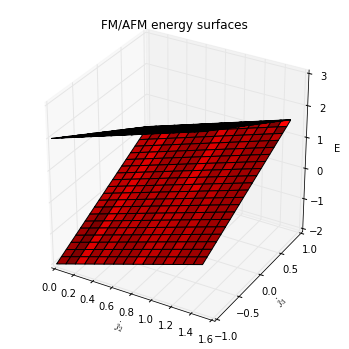

In [12]:
# Define variables
x = sympy.symbols('x')
j2 = sympy.symbols('j2', real=True)
j3 = sympy.symbols('j3', real=True)
j4 = sympy.symbols('j4', real=True)

# Define the model.
# We assume that j1 < 0. Since we scaled the model by j1, we need to take the minus sign into account.
heismodel = - sympy.cos(x) + j2 * sympy.cos(sympy.S(2) * x) + j3 * sympy.cos(sympy.S(3) * x) + j4 * sympy.cos(sympy.S(4) * x)

# Define energy planes for FM and AFM configurations
fmenergy = lambdify((j2, j3, j4), heismodel.subs(x, 0))
afmenergy = lambdify((j2, j3, j4), heismodel.subs(x, sympy.pi))

# Generate plotting data
X = np.arange(0, 1.5, 0.01)
Y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(X, Y)
Z1 = fmenergy(X, Y, 0)
Z2 = afmenergy(X, Y, 0)

# Plot figure and check whether AFM is preferred when j4 = 0
fig = plt.figure(figsize=(6.0, 6.0))
plot_list = [[X, Y, Z1, 'r', "FM"],
             [X, Y, Z2, 'b', "AFM"]]
ax = fig_plot3d(fig, 1, 1, 1, r"$j_{2}$", r"$j_{3}$", "E", "FM/AFM energy surfaces", plot_list)
ax.set_zlim3d(-2, 3)
ax.set_top_view()

The above shows us that the ferromagnetic configuration is *always* lower in energy compared to the antiferromagnetic configuration for the parameter space we're investigating. So we only need to compare spiral solutions against the ferromagnetic solution.

Next, we find the analytic solution for the extrema, which requires solving:

In [13]:
sympy.Eq(sympy.diff(heismodel.subs(j4, 0), x), 0)

Here we make use of the double and triple angle formulae:

$$\begin{align}
\sin(2x) &= 2 \sin(x) \cos(x) \\
\sin(3x) &= 3 \cos^{2}(x) \sin(x) - \sin^{3}(x) \\
&= \sin(x) \left[ 4 \cos^{2}(x) - 1 \right]
\end{align}$$

We transform the equation into:

$$\begin{align}
0 &= \sin(\theta) \left[ 1 + 3j_{3} - 4j_{2} \cos(\theta) - 12j_{3} \cos^2(\theta) \right]
\end{align}$$

Below we feed this equation into the Sympy solver:

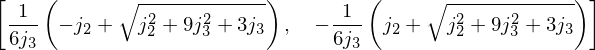

In [14]:
tmp_sol = sympy.solve(sympy.Eq(sympy.sin(x) * (sympy.S(1) + sympy.S(3) * j3 - sympy.S(4) * j2 * sympy.cos(x) - sympy.S(12) * j3 * sympy.cos(x) ** 2), 0), sympy.cos(x))
sympy.simplify(tmp_sol)

So the angles that minimize the derivative are

$$\begin{align}
\theta_{1}^{\pm} &= n\pi, \text{ where } n = 0, \pm 1, \pm 2, \dots \\
\theta_{2}^{\pm} &= \arccos \left[ \frac{-j_{2} \pm \sqrt{j_{2}^2 + 3j_{3} + 9 j_{3}^2}}{6 j_{3}} \right]
\end{align}$$

The $\theta_{1}^{\pm}$ solutions correspond to ferromagnetic and antiferromagnetic solutions, and $\theta_{2}^{\pm}$ is the spiral solution. For the subsequent analysis, we consider the $\theta_{2}^{+}$ solution, which is a minimum for a certain parameter range of $j_{2}$ and $j_{3}$. The $\theta_{2}^{-}$ solution is a maximum.

Below we explictly show that the $\theta_{2}^{+}$ angles are always lower in energy than the $\theta_{2}^{-}$ angles.

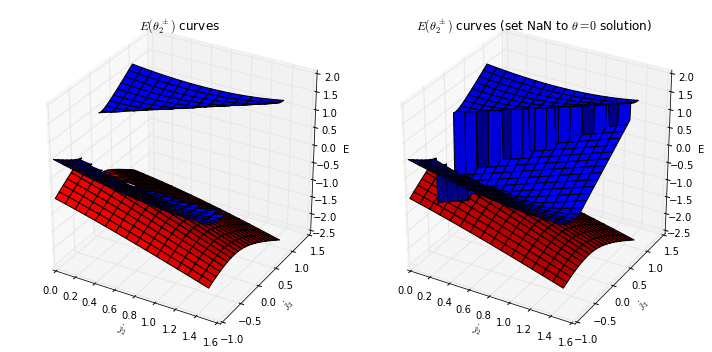

In [15]:
# Create plotting mesh
X = np.arange(0, 1.51, 0.01)
Y = np.arange(-1, 1.01, 0.01)
X, Y = np.meshgrid(X, Y)

# Calculate energies using mesh
Z1 = np_heismodel_calc(np_th2p(X, Y), X, Y, 0)
Z2 = np_heismodel_calc(np_th2m(X, Y), X, Y, 0)
Z3 = np_heismodel_calc(np_th2p(X, Y), X, Y, 0)
Z4 = np_heismodel_calc(np_th2m(X, Y), X, Y, 0)

# Code snippet sets theta = 0 for areas where th2p and th2m return NaN, i.e. where theta is complex.
check1 = np.isnan(Z3)
for row in np.arange(len(check1)):
    tmp = check1[row]
    for col in np.arange(len(tmp)):
        if str(tmp[col]) is "True":
            Z3[row, col] = np_heismodel_calc(0, X[row, col], Y[row, col], 0)
            
check2 = np.isnan(Z4)
for row in np.arange(len(check2)):
    tmp = check2[row]
    for col in np.arange(len(tmp)):
        if str(tmp[col]) is "True":
            Z4[row, col] = np_heismodel_calc(0, X[row, col], Y[row, col], 0)

# Build the figure
fig = plt.figure(figsize=(10, 5))

# Define subplots
subplot_list = [
                [1, "$j_{2}$", "$j_{3}$", "E", r"$E(\theta_{2}^{\pm})$ curves",
                [[X, Y, Z1, 'r', "th2p"], [X, Y, Z2, 'b', "th2m"]]],
                [2, "$j_{2}$", "$j_{3}$", "E", r"$E(\theta_{2}^{\pm})$ curves (set NaN to $\theta = 0$ solution)",
                [[X, Y, Z3, 'r', "th2p"], [X, Y, Z4, 'b', "th2m"]]]    
                ]

# Generate subplots
for entry in subplot_list:
    n = entry[0]
    x_label = entry[1]
    y_label = entry[2]
    z_label = entry[3]
    in_title = entry[4]
    plot_list = entry[5]
    ax = fig_plot3d(fig, 1, 2, n, x_label, y_label, z_label, in_title, plot_list)
    ax.set_top_view()

fig.tight_layout()

The red surfaces correspond to the $\theta_{2}^{+}$ solution, the blue surfaces the $\theta_{2}^{-}$ solution. We note that, in principle, $\theta_{2}^{\pm}$ can be complex. However, there is no physical meaning to an imaginary turn angle, so those regions of parameter space are omitted from the surface, as is seen in the plot on the left. On the right, we fill in the "blank" areas by inserting the appropriate $\theta = 0$ solution.

For all values of $j_{2}$ and $j_{3}$, the red curve is lower in energy than the blue one, so it is the only solution we need to compare against the $\theta = 0$ ferromagnetic configuration. Further analysis using the second derivatives of the exchange model reveal that, indeed, real values of $\theta_{2}^{-}$ correspond to maxima in the energy curve.

Having established this, we can now create a contour plot of the values of $\theta_{min}$ in the $j_{2} - j_{3}$ parameter space. Below we calculate the energy for the ferromagnetic configuration and the spin spiral solutions and compare them at every point, then take the lower energy angle and put it in the contour plot.

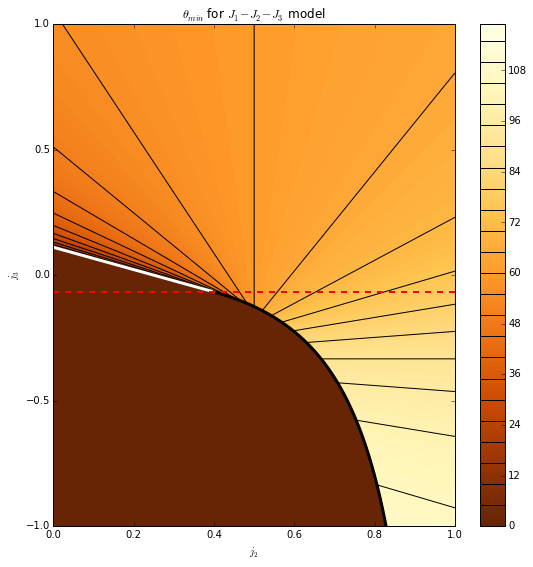

In [16]:
# Generate contour plot data
X = np.arange(0, 1.001, 0.001)
Y = np.arange(-1, 1.001, 0.001)
X, Y = np.meshgrid(X, Y)

# Calculate energies using mesh
Z_E_qss = np_heismodel_calc(np_th2p(X, Y), X, Y, 0)
Z_th_qss = np_th2p(X, Y)
Z_E_fm = np_heismodel_calc(0.0, X, Y, 0)
Z = 0.0 * X + 0.0 * Y
            
# Build final Z array
for row in np.arange(len(Z)):
    tmp = Z[row]
    for col in np.arange(len(tmp)):
        tmp = Z_E_qss[row, col] - Z_E_fm[row, col]
        if tmp < 0:
            Z[row, col] = Z_th_qss[row, col] * 180/np.pi
        else:
            Z[row, col] = 0.0

# Fix numbers in j3 = 0 range
X_tmp = np.arange(0, 1.01, 0.001)
for entry in range(1000):
    z_tmp = np.arccos(1 / (4 * X_tmp[entry])) * (180 / np.pi)
    if np.isnan(z_tmp):
        Z[1000, entry] = np.float(0)
    else:
        Z[1000, entry] = z_tmp
            
# Build the figure
fig = plt.figure(figsize=(9, 9))
plot_list = [[X, Y, Z, np.arange(0, 120, 1), 'YlOrBr_r', 'lower']]
ax = fig_contour(fig, 1, 1, 1, "$j_{2}$", "$j_{3}$", r"$\theta_{min}$ for $J_1 - J_2 - J_3$ model", plot_list)

# Plot phase boundaries
X1 = np.arange(0, 0.401, 0.001)
X2 = np.arange(0.4, 0.901, 0.001)
Y1 = (1 / 9) * (1 - 4 * X1)
Y2 = (X2 * X2) / (4 * (X2 - 1))
ax.plot(X1, Y1, 'w-', linewidth=3)
ax.plot(X2, Y2, 'k-', linewidth=3)

# Set axes
ax.set_xlim([0, 1])
ax.set_ylim([-1, 1])

# Plot j3 = -1/15, the critical value between first and second order transitions
ax.axhline(y=-1/15, xmin=0, xmax=1, linewidth=2, color="r", linestyle='--')

# Save Z data
tmp_filename = "j1j2j3model_z.dat.gz"
tmp_header = ('Created with np.meshgrid(X, Y) with X = np.arange(0, 1.001, delta); '
              'Y = np.arange(-1, 1.001, delta), and delta = ' + str(0.001))
np.savetxt(str(OUTPUTPATH / tmp_filename), Z, fmt='%12.7f', delimiter=' ',
           header=tmp_header)

As you can see, there is a value of $j_{3}$ (marked by the dashed red line) where the transition between the ferromagnetic and spin spiral solution switches to first order. The first order transitions occur when crossing the thick black line and the second order transitions occur when crossing the thick white line. We now show how to find the dashed red line that separates these two regions.

First, we need to calculate the critical value of $j_{2}$ when the transition is second order, i.e. north of the red line. We begin with our model:

$$E_{eff}(\theta) = - \cos(\theta) + j_{2} \cos(2\theta) + j_{3} \cos(3\theta)$$

We do a series expansion for small angles up to second order:

$$E_{eff}(\theta) \approx - 1 + \frac{\theta^2}{2} + j_{2} \left( 1 - 2 \theta^{2} \right) + j_{3} \left( 1 - \frac{9}{2} \theta^2 \right)$$

When there is a second order transition, the above equation in the limit $\theta \to 0$ has the same energy as $E_{eff}(0)$. So we calculate:

\begin{align*}
0 &= E_{eff}(\theta) - E_{eff}(0) \\
&\approx \theta^{2} \left( \frac{1}{2} - 2 j_{2} - \frac{9}{2} j_{3} \right)
\end{align*}

The above implies that for small angles, a second order phase transition will occur when:

$$j_{2}^{c} = \frac{1}{4} \left( 1 - 9j_{3} \right)$$

A first order transition occurs when a finite angle $\theta > 0$ becomes stable for $j_{2} = j_{2}^{c}$. We take the first derivative of $E_{eff}(\theta)$, plug in $j_{2} \to j_{2}^{c}$, and set it equal to zero. After some algebra, we obtain

$$\left(1 + 3 j_{3} \right) + \cos(\theta) \left( 9j_{3} - 1 \right) + \cos^{2}(\theta) \left( -12 j_{3} \right) = 0$$

We end up with two solutions, $\cos(\theta) = 1, \frac{-1 -3j_{3}}{12j_{3}}$. The second solution is $> 1$ for a given region of parameter space, which yields imaginary angles. It is in this range that transitions are second order. When the second solution is equivalent to $1$, then finite angles become stable and first order transitions appear. Therefore, we need to solve

$$1 = \frac{-1 -3 j_{3}}{12 j_{3}}$$

Which yields $j_{3}^{c} = - 1/15$, or in the unscaled exchange parameters:

$$J_{3}^{c} = - \frac{1}{15} \lvert J_{1} \rvert$$

This indicates that $J_{3}$ does not need to be large relative to $\lvert J_{1} \rvert$ in order for the system to experience a first order transition under pressure. If $J_{3}$ is sensitive to the materials synthesis process, this could explain how different MnAu$_{2}$ experiments could see either first- or second-order transitions.

To wrap up, we can derive the phase boundary for first order transitions as follows. A first order transition begins when the energy of the ferromagnetic and finite spiral angle solutions are degenerate. To this end, we go back to $E_{eff}(\theta)$ and apply the following double and triple angle formulae:

\begin{align*}
\cos(2x) &= 2 \cos^{2}(x) - 1 \\
\cos(3x) &= 4 \cos^{3}(x) - 3 \cos(x)
\end{align*}

Applying this to the model, we obtain

$$E_{eff}(\theta) = -j_{2} + \cos(\theta) \left( -1 - 3 j_{3} \right) + \cos^{2}(\theta) \left( 2 j_{2} \right) + \cos^{3}(\theta) \left( 4 j_{3} \right)$$

We now plug our angle solution $\cos(\theta_{2}^{+})$ into the above solution and calculate $E_{eff}(\theta_{2}^{+}) - E_{eff}(0) = 0$, then solve for $j_{3}$.

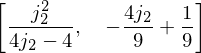

In [17]:
tmp_cos = (-j2 + sympy.sqrt(j2 ** 2 + sympy.S(3) * j3 + sympy.S(9) * j3 ** 2))/(sympy.S(6) * j3)
tmp_sol = sympy.solve(sympy.Eq(-j2 + tmp_cos * (- sympy.S(1) - sympy.S(3) * j3) + tmp_cos ** 2 * (sympy.S(2) * j2) + tmp_cos ** 3 * (sympy.S(4) * j3) - (- sympy.S(1) + j2 + j3), 0), j3)
sympy.simplify(tmp_sol)

The following are the phase boundaries:

\begin{align*}
    j_{3} &= \begin{cases}
        \frac{1}{9} \left(1 - 4 j_{2} \right) & 0 \leq j_{2} \leq \frac{2}{5} \\
        \frac{j_{2}^2}{4 \left(j_{2} - 1\right)} & j_{2} > \frac{2}{5}
    \end{cases}
\end{align*}

Finally, let's determine the value of $\theta_{min}$ at the onset of the first order transition. To do this, we plug in $j_{3} = j_{2}^2 / (4j_{2} - 4)$ into $E_{eff}(\theta)$ and minimize the equation. Doing this and performing some algebra yields

$$\sin(\theta) \left[ \left(1 + \frac{3 j_{2}^2}{4 \left(j_{2} - 1\right)} \right) + \cos(\theta) (-4 j_{2}) + \cos^{2}(\theta) \left( \frac{3 j_{2}^2}{1 - j_{2}} \right) \right] = 0$$

We solve this equation.

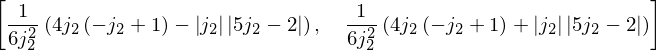

In [18]:
tmp_sol = sympy.solve(sympy.Eq((1 + (sympy.S(3) * j2 ** 2)/(4 * j2 - 4)) + sympy.cos(x) * (- 4 * j2) + sympy.cos(x) ** 2 * ((3 * j2 ** 2)/(1 - j2)), 0), sympy.cos(x))
sympy.simplify(tmp_sol)

The above equations are only valid for $j_{2} > 2/5$, so they can be further simplified. Further, the second solution is higher in energy than the first for $j_{2} > 2/5$, so we discard it. Therfore, the initial angle at a first order transition is

$$\theta = \arccos \left[ \frac{2 - 3 j_{2}}{2 j_{2}} \right]$$

This completely describes the phase diagram of the one dimensional $J_{1} - J_{2} - J_{3}$ Heisenberg model when $J_{1} < 0$ and $J_{2} > 0$.

## Case 3: $j_{1}, j_{2}, j_{3}, j_{4} \neq 0$
[Return to Table of Contents](#Table-of-Contents)

Here we consider the case where we include up to fourth neighbor interactions. As we'll see in our calculations, these $j_{4}$ terms are important and cannot be ignored.

We proceed as we did in the previous case, writing down the model and taking the derivative, which we set equal to 0 in order to find the extrema.

In [19]:
# Define variables
x = sympy.symbols('x')
j2 = sympy.symbols('j2')
j3 = sympy.symbols('j3')
j4 = sympy.symbols('j4')

# Define the model.
# We assume that j1 < 0. Since we scaled the model by j1, we need to take the minus sign into account.
heismodel = - sympy.cos(x) + j2 * sympy.cos(sympy.S(2) * x) + j3 * sympy.cos(sympy.S(3) * x) + j4 * sympy.cos(sympy.S(4) * x)

# Take derivative
sympy.Eq(sympy.diff(heismodel, x), 0)

Here we make use of the double, triple, and quadruple angle formulae:

$$\begin{align}
\sin(2x) &= 2 \sin(x) \cos(x) \\
\sin(3x) &= \sin(x) \left[ 4 \cos^{2}(x) - 1 \right] \\
\sin(4x) &= 4 \sin(x) \cos(x) - 8 \sin^{3}(x) \cos(x) \\
&= \sin(x) \left[ 8 \cos^{3}(x) - 4 \cos(x) \right]
\end{align}$$

We transform the equation into:

\begin{align}
0 &= \sin(\theta) \left[ \left( 1 + j_{3} \right) + \left(16 j_{4} - 4 j_{2} \right) \cos(\theta) - 12 j_{3} \cos^{2}(\theta) - 32 j_{4} \cos^{3}(\theta) \right]
\end{align}

Unlike the previous case, this equation cannot be solved for $\theta_{min}$ analytically. However, we can still solve for the critical value of $j_{2}$ for second order phase transitions. In the same way as last time, we start with $E_{eff}(\theta)$ and take a series expansion around small angles, and then we calculate:

\begin{align}
0 &= E_{eff}(\theta) - E_{eff}(0) \\
&= \theta^{2} \left( \frac{1}{2} - 2j_{2} - \frac{9}{2}j_{3} - 8j_{4} \right)
\end{align}

We find then that the critical $j_{2}$ is

$$j_{2}^{c} = \frac{1}{4} \left(1 - 9 j_{3} - 16 j_{4} \right)$$

Next, we determine when this expression is valid. We take plug $j_{2}^{c}$ into the expression obtained from taking the first derivative:

\begin{align}
0 &= \sin(\theta) \left[ \left( 1 + j_{3} \right) + \left( -1 + 9 j_{3} + 32 j_{4} \right) \cos(\theta) - 12 j_{3} \cos^{2}(\theta) - 32 j_{4} \cos^{3}(\theta) \right]
\end{align}

This equation can be solved. The Sympy solver has some difficulty in handling this, so we run the equation in Mathematica. The result is

$$\cos(\theta) = 1, \frac{-3 j_{3} - 8 j_{4} \pm \sqrt{9 j_{3}^{2} -8 j_{4} + 24 j_{3} j_{4} + 64 j_{4}^{2}}}{16 j_{4}}$$

Again, when the solutions are equivalent, this means that first order transitions appear. Solving for $j_{3}$, we obtain:

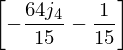

In [20]:
sympy.solve(sympy.Eq((-sympy.S(3) * j3 - sympy.S(8) * j4 + sympy.sqrt(9 * j3 ** 2 - 8 * j4 + 24 * j3 * j4 + 64 * j4 ** 2))/(16 * j4), 1), j3)

So we found that first order transitions occur when

$$J_{3}^{c} < - \frac{1}{15} \left( \vert J_{1} \vert + 64 J_{4} \right)$$

This expression is consistent with what was derived in [R. Zinke, J. Richter, and S.-L. Drechsler, J. Phys.: Condens. Matter **22**, 446002 (2010)](http://iopscience.iop.org/0953-8984/22/44/446002). We should note that the expressions for $j_{2}^{c}$ and $j_{3}^{c}$ only apply when $j_{3}, j_{4} > 0$ (antiferromagnetic), or if one of them is ferromagnetic, such as $j_{4} < 0$, the expressions only apply when the antiferromagnetic couplings still dominate, i.e. $\vert j_{3} \vert \gg \vert j_{4} \vert$. When ferromagnetic couplings become strong, then we no longer have an analytical expression we can use.

This is as far as we can go analytically. Everything else needs to be solved numerically, such as determining $\theta_{min}$ for an arbitrary set of parameters. We turn to doing this next.

The numerical procedure is as follows:

1. Choose a value of $j_{4}$.
2. Divide $j_{2}-j_{3}$ plane into a grid of points.
3. Minimize $E_{eff}(\theta)$ at each point on the mesh to find $\theta_{min}$.
4. Export the $\theta_{min}$ array to a file.

The procedure is implemented in the [following code](#Scanning-$j_{4}$). We run the code and save the phase diagram for several values of $j_{4}$. Next, we visualize the plots to see how varying $j_{4}$ changes the phase diagram.

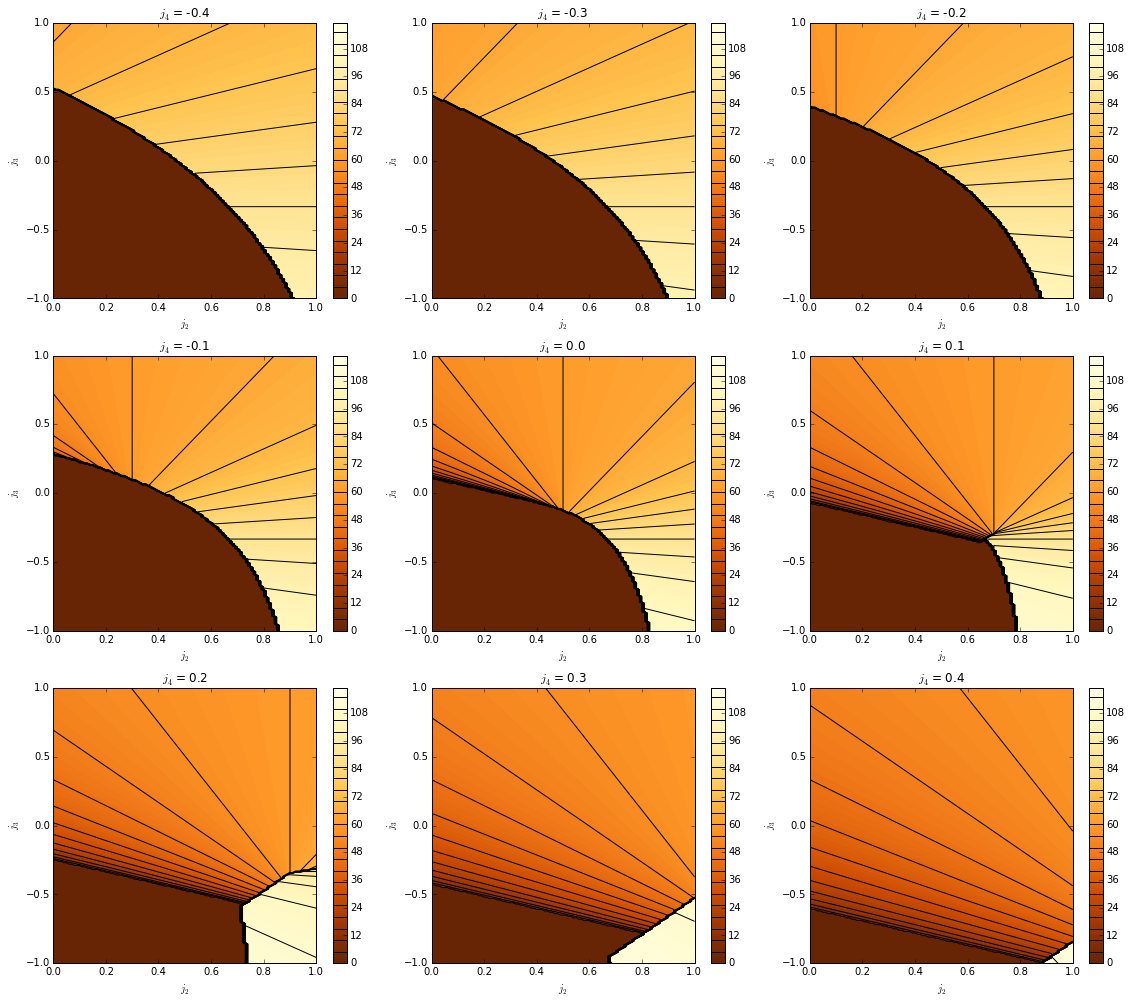

In [21]:
# Create plotting mesh
delta = 0.01
X = np.arange(0, 1.01, delta)
Y = np.arange(-1, 1.01, delta)
X, Y = np.meshgrid(X, Y)

# Set value of j4
j4list = [[-0.4, 1], [-0.3, 2], [-0.2, 3], [-0.1, 4],
          [0.0, 5],
          [0.1, 6], [0.2, 7], [0.3, 8], [0.4, 9]]

# Build the figure
fig = plt.figure(figsize=(16, 14))

# Loop over different j4 values
for item in j4list:
    # Define temporary variables
    tmp_j4 = np.float(item[0])
    subp = item[1]
    tmp_title = r"$j_{4}$ = " + str(tmp_j4)
    tmp_filename = 'j1j2j3j4model_j4' + str(tmp_j4) + '_z.dat.gz'
    
    # Load array
    Z_th = np.loadtxt(str(OUTPUTPATH / tmp_filename))
    
    # Create subplot
    plot_list = [[X, Y, Z_th, np.arange(0, 120, 1), 'YlOrBr_r', 'lower']]
    ax = fig_contour(fig, 3, 3, subp, "$j_{2}$", "$j_{3}$", tmp_title, plot_list)

# Better layout
fig.tight_layout()

The effect of $j_{4}$ is clear in these plots. When $j_{4} < 0$ and becomes more negative, the ferromagnetic phase region enlarges. In addition, the critical value of $j_{3}$ that separates the first- and second- order phase transitions is shifted toward positive values of $j_{3}$. By $j_{4} = -0.2$, the second order transition disappears entirely from the phase diagram. When $j_{4} > 0$ the opposite occurs, where the ferromagnetic region shrinks and the critical value of $j_{3}$ is pushed towards more negative values. This is consistent with the derived expression for $j_{3}^{c}$. It is clear that $j_{4}$ can have a dramatic effect on the shape of the phase diagram.

It is also useful to generate a contour plot of the surface in $(j_{2}, j_{3}, j_{4})$ parameter space that separates the ferromagnetic phase and the spin spiral phase. [The contour plot was calculated with the following code](#Routine-to-calculate-contour-plot-of-$j_{2},-j_{3},-j_{4}$-surface-separating-FM-and-spiral-phases). The dividing line separating first and second order regions of parameter space is given by the analytic solution for $j_{3}^{c}$ when $j_{3} > 0$ and [needs to be solved for numerically](#Routine-to-find-the-1st/2nd-order-dividing-line-in-$j_{3},-j_{4}$-space) when $j_{3} < 0$. See the main text for a full explanation of the meaning of this plot.

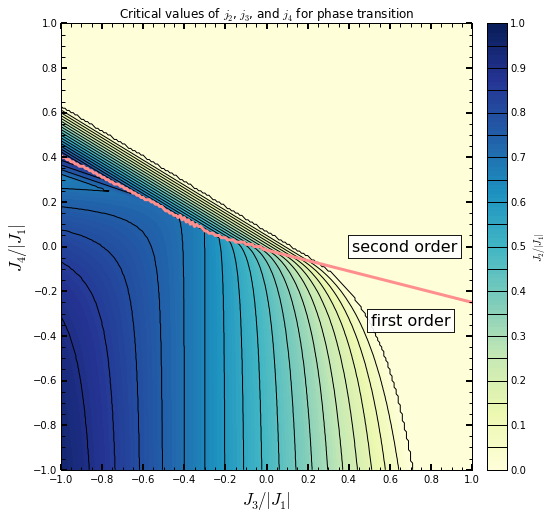

In [22]:
# Build the figure
fig = plt.figure(figsize=(8, 8))

# Create plotting mesh
delta = 0.01
X = np.arange(-1, 1.01, delta)
Y = np.arange(-1, 1.01, delta)
X, Y = np.meshgrid(X, Y)

# Define temporary variables
tmp_title = r"Critical values of $j_{2}$, $j_{3}$, and $j_{4}$ for phase transition"
tmp_filename = "critical_j2j3j4.dat.gz"
    
# Load array
Z_j2 = np.loadtxt(str(OUTPUTPATH / tmp_filename))
    
# Create subplot
plot_list = [[X, Y, Z_j2, np.arange(0, 1.01, 0.01), 'YlGnBu', 'lower']]
ax = fig_contour2(fig, 1, 1, 1, r"$J_{3}/\vert J_{1} \vert$", r"$J_{4}/\vert J_{1} \vert$", tmp_title, plot_list, -1, 1.1, 0.2, -1, 1.1, 0.2, 0, 1.1, 0.1, r"$J_{2} / \vert J_{1} \vert$")

# Text boxes
ax.text(0.7, -0.33, 'first order', fontsize=16, horizontalalignment='center', verticalalignment='center',
         bbox={'facecolor':'white', 'alpha':0.9, 'pad':8})
ax.text(0.67, 0.00, 'second order', fontsize=16, horizontalalignment='center', verticalalignment='center',
         bbox={'facecolor':'white', 'alpha':0.9, 'pad':8})

# Plot dividing line
X = np.arange(-0.01, 1.01, 0.01)
Y = - (1 + 15 * X)/64
dividing_line = np.loadtxt(str(OUTPUTPATH / "j3j4_dividing_line.dat"))
ax.plot(X, Y, color='#ff8f8f', linewidth=3)
ax.plot(dividing_line[:,0], dividing_line[:,1], color='#ff8f8f', linewidth=3)

# Fitting DFT spin spiral calculations
[Return to Table of Contents](#Table-of-Contents)

In this section we fit our DFT calculations, which were performed using the spin spiral method implemented in the full potential code [ELK](http://elk.sourceforge.net). The spiral angle is simulated using ELK's spin spiral method, which takes the primitive unit cell and rotates it according to a provided $q$-vector. The relevant parameter in ELK is:

* vqlss: (0, 0, $q_z$), where $0 < q_z < \frac{2 \pi}{c}$

To convert from the wave vector **q** to the spiral angle $\theta$, we use the formula $\theta = q_{z} c / 2$.

There are four parameters we will vary in our calculations to see how they affect the exchange interactions. Those parameters are:

1. Pressure (use obtained [lattice parameters](#Dependence-of-crystal-structure-on-volume/pressure))
2. Charge dosing (experimental lattice parameters; dosing means adding extra electrons and also a uniform positive charge background to enforce charge neutrality)
3. Virtual Crystal Approximation (VCA) applied to Au (experimental lattice parameters)
4. The Hubbard *U* (experimental lattice parameters; the *U* incorporates stronger electronic correlations on Mn 3d states)

Regarding the use of a Hubbard *U*, in our previous study, [J.K. Glasbrenner, K.M. Bussmann, and I.I. Mazin, Phys. Rev. B **90**, 144421 (2014)](http://link.aps.org/doi/10.1103/PhysRevB.90.144421), we showed that it is necessary to use the DFT+*U* method to stabilize the spiral ground state. The spiral angle depends on the choice of *U*, so here we consider it as an additional variable parameter. For pressure and doping calculations, we consider two values, $U = 3.12 \text{ eV}$ and $4.7 \text{ eV}$, and set $J = 0.7 \text{ eV}$.

We checked convergence for MnAu$_{2}$ against several parameters in ELK. The relevant parameters and their converged values are listed below:

* kmesh: $16 \times 16 \times 16$
* nempty: $8$
* rgkmax: $8.0$
* gmaxvr: $12$
* lmaxapw: $8$
* swidth: $0.0001$

Next, we construct lists of the DFT data to aid in analysis.

In [23]:
## Create lists of data objects
# U = 4.7 eV calculations
p_data_list = [[0.000000, p49_data], [67.8921358, p47_data],
               [169.7089995, p44_data], [317.6914288, p42_data],
               [524.15848733, p39_data], [801.32960613, p37_data],
               [1161.54382441, p34_data]]
chg_data_list = [["-0.050", chg_n010], ["-0.025", chg_n005],
                 ["-0.010", chg_n002], ["-0.005", chg_n001],
                 ["0.000", exp_data],
                 ["+0.005", chg_p001], ["+0.010", chg_p002],
                 ["+0.025", chg_p005], ["+0.050", chg_p010]]
vca_data_list = [["-0.050", vca_au_n0050],
                 ["-0.025", vca_au_n0025],
                 ["0.000", exp_data],
                 ["+0.025", vca_au_p0025],
                 ["+0.050", vca_au_p0050]]

# U = 3.12 eV calculations
p_u312_data_list = [[0.000000, p497_u312_data], [12.97732956, p491_u312_data],
                    [38.10920522, p482_u312_data], [67.8921358, p472_u312_data],
                    [88.29843363, p467_u312_data], [108.3532474, p461_u312_data],
                    [169.7089995, p448_u312_data]]

chg_u312_data_list = [["-0.050", chg_u312_n010], ["-0.025", chg_u312_n005],
                 ["0.000", exp_u312_data],
                 ["+0.025", chg_u312_p005], ["+0.050", chg_u312_p010]]

vca_u312_data_list = [["-0.050", vca_u312_au_n0050],
                      ["-0.025", vca_u312_au_n0025],
                      ["0.000", exp_u312_data],
                      ["+0.025", vca_u312_au_p0025],
                      ["+0.050", vca_u312_au_p0050]]

# Varying U calculations
u_data_list = [["1.7", u017_data], ["2.2", u022_data],
               ["2.7", u027_data], ["3.2", u032_data],
               ["3.7", u037_data], ["4.7", u047_data]]

The analysis will proceed as follows:

1. Start loop through spin spiral calculations for each variable (pressure, doping, *U*)
2. For each spin spiral energy curve $E(\theta)$, fit to the $J_{1}-J_{2}-J_{3}-J_{4}$ model.
3. Calculate the spiral angle $\theta$ using two methods:
    1. Interpolate the DFT $E(\theta)$ curve and minimize it.
    2. Substitute fitted exchange parameters and minimize $J_{1}-J_{2}-J_{3}-J_{4}$ model.
4. Calculate the depth of the energy well for the interpolated DFT energy curve and for the $J_{1}-J_{2}-J_{3}-J_{4}$ model.
5. Print parameters, angles, and energy well depths.
6. Plot energy curves and fitted model for comparison.

## Pressure dependence
[Return to Table of Contents](#Table-of-Contents)

### P: U = 3.12 eV
[Return to Table of Contents](#Table-of-Contents)

Results for pressure calculations (U = 3.12 eV)
      P         j1    j1 Err        j2    j2 Err        j3    j3 Err        j4    j4 Err     const  const Er    R^2
   0.000  -20.1394    0.0877    9.8339    0.0878   -0.9823    0.0877   -0.7333    0.0878   11.7155    0.0632  1.000
  12.977  -22.3635    0.0881    9.9571    0.0882   -0.7869    0.0881   -0.7692    0.0882   13.7267    0.0635  1.000
  38.109  -26.5047    0.0725   10.1130    0.0726   -0.4949    0.0725   -0.7711    0.0726   17.4466    0.0523  1.000
  67.892  -31.1437    0.0681   10.2032    0.0682   -0.2159    0.0681   -0.6435    0.0682   21.5442    0.0491  1.000
  88.298  -34.1544    0.0667   10.3499    0.0668   -0.1301    0.0667   -0.6544    0.0668   24.4525    0.0481  1.000
 108.353  -37.0067    0.0780   10.4056    0.0782   -0.0440    0.0780   -0.5633    0.0782   26.9955    0.0563  1.000
 169.709  -44.9705    0.0891   10.4817    0.0892   -0.3415    0.0891   -0.5701    0.0892   34.9768    0.0642  1.000

Scaled exchange constan

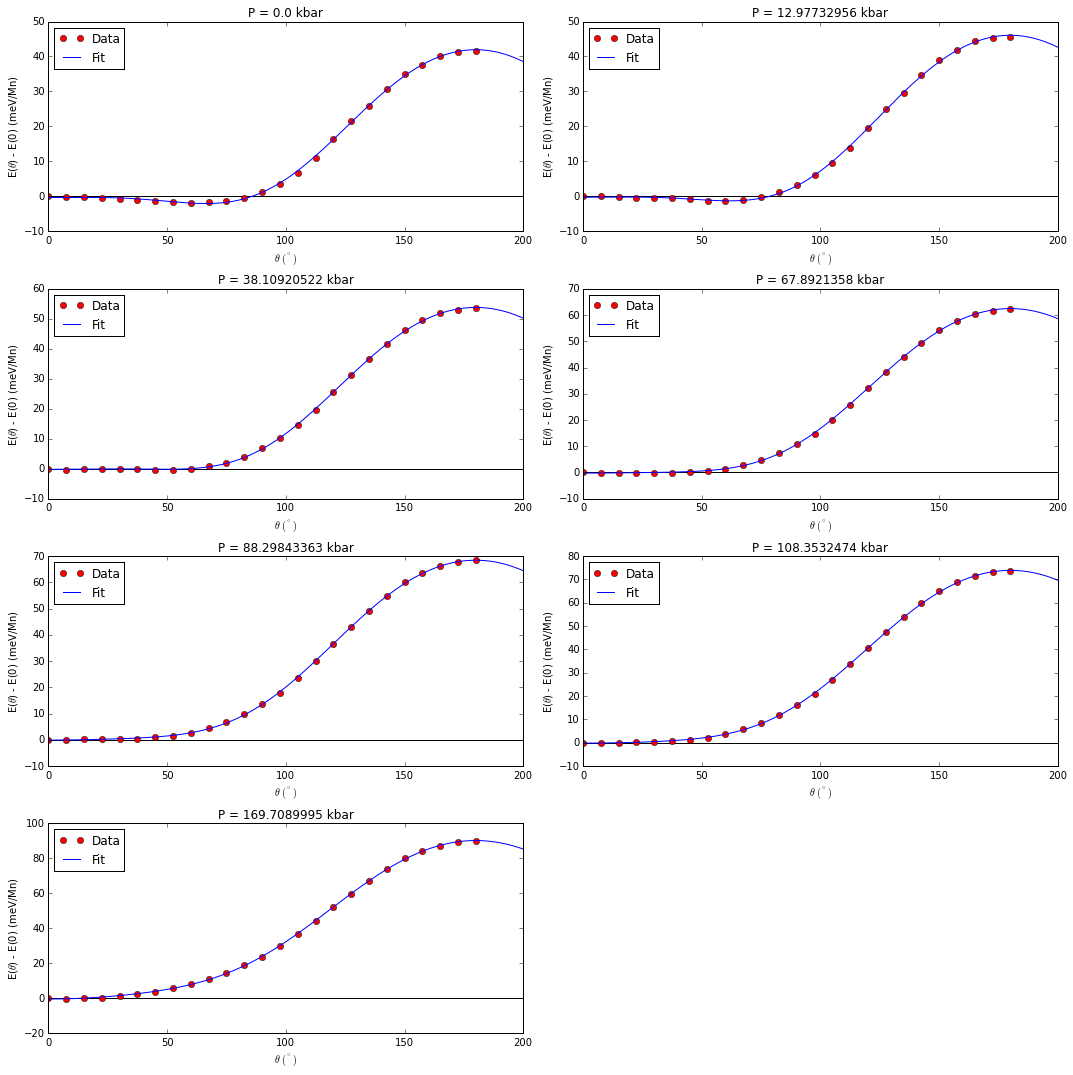

In [24]:
# Define figure
fig = plt.figure(figsize=(15.0, 15.0))

# Run analysis
list_fit_results, j_list_p_u312, scaled_pressure_u312, theta_u312_minimum_pressure, theta_u312_minimum_pressure_model = spinsprl_fit_and_plot(p_u312_data_list, 0, fig, 4, 2)

# Print results
print('Results for pressure calculations (U = 3.12 eV)')
print_exchange_const(list_fit_results, "P")
    
print("\nScaled exchange constants (U = 3.12 eV)")
print_scaled_exchange_consts(scaled_pressure_u312, "P")
    
print("\nResults for minimum Theta (U = 3.12 eV)")
print_min_theta(theta_u312_minimum_pressure, theta_u312_minimum_pressure_model, "P")

# Save scaled coordinates
np.savetxt(str(OUTPUTPATH / "p_jscaled_u312.dat.gz"), np.array(scaled_pressure_u312)[:, 1:4], fmt='%.4f', delimiter=' ')

# Tight layout for figure panels
fig.tight_layout()

### P: U = 4.7 eV
[Return to Table of Contents](#Table-of-Contents)

Results for pressure calculations
      P         j1    j1 Err        j2    j2 Err        j3    j3 Err        j4    j4 Err     const  const Er    R^2
   0.000   -5.5435    0.0943    6.4037    0.0944   -0.6415    0.0943   -0.9926    0.0944    0.4549    0.0680  0.998
  67.892  -13.4226    0.0916    7.7049    0.0914   -0.2128    0.0947   -1.0301    0.0914    6.7361    0.0669  0.999
 169.709  -24.2692    0.0722    9.1221    0.0723    0.0078    0.0722   -1.0323    0.0723   15.8160    0.0520  1.000
 317.691  -39.3228    0.1073   11.3247    0.1075    0.2179    0.1073   -1.1539    0.1075   28.4826    0.0774  1.000
 524.158  -58.0330    0.1399   11.7377    0.1401   -0.4304    0.1399   -0.9656    0.1401   47.1785    0.1009  1.000
 801.330  -73.4300    0.1295   12.5432    0.1297   -1.0711    0.1295   -0.3729    0.1297   61.8746    0.0934  1.000
1161.544  -84.3908    0.0661   13.2642    0.0662   -1.7995    0.0661    0.1930    0.0662   72.3755    0.0476  1.000

Scaled exchange constants
      P    

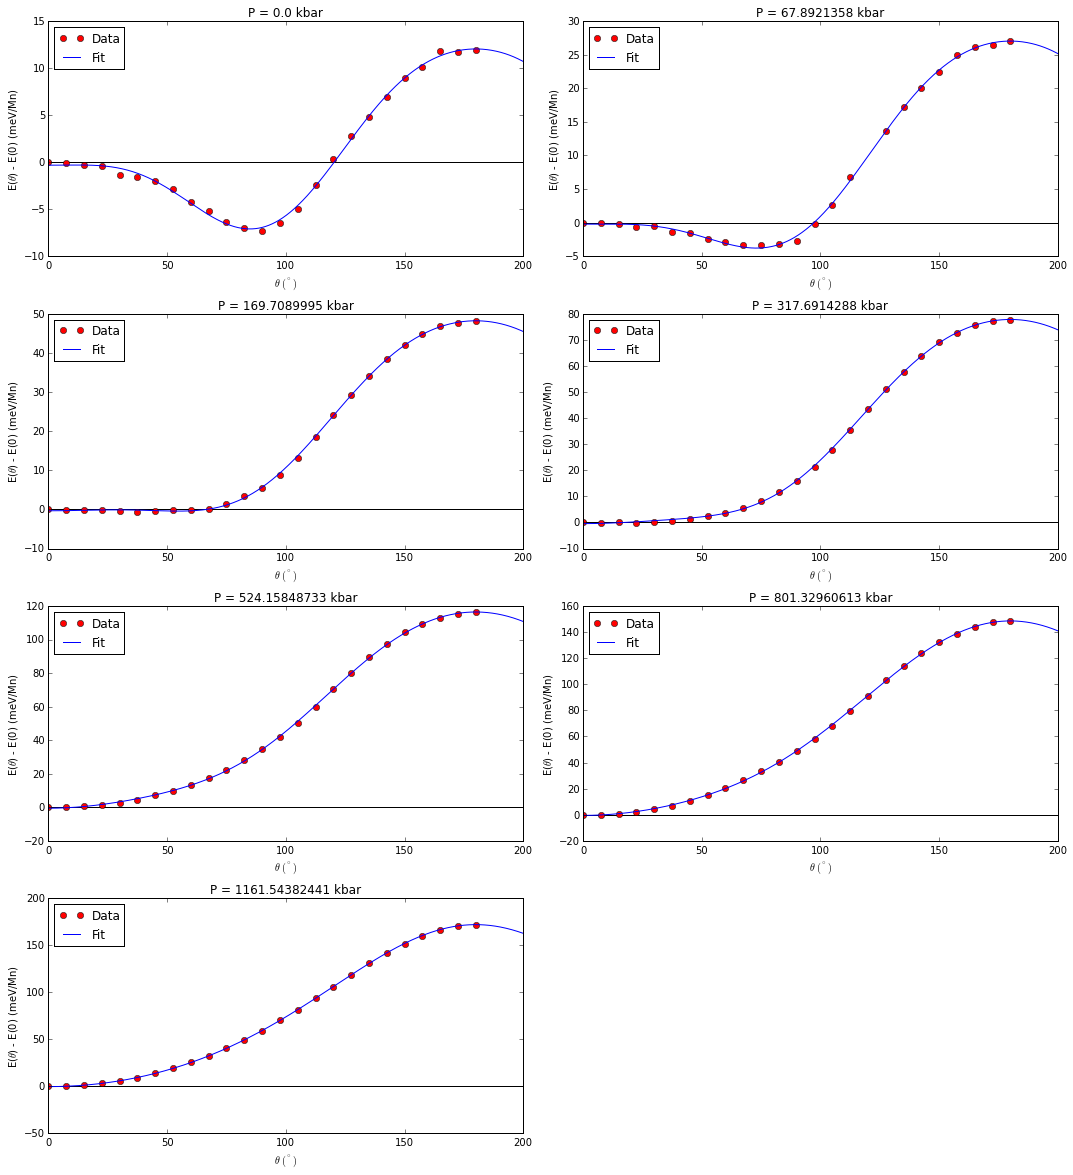

In [25]:
# Define figure
fig = plt.figure(figsize=(15.0, 20.0))

# Run analysis
list_fit_results, j_list_p, scaled_pressure, theta_minimum_pressure, theta_minimum_pressure_model = spinsprl_fit_and_plot(p_data_list, 0, fig, 5, 2)

# Print results
print('Results for pressure calculations')
print_exchange_const(list_fit_results, "P")
    
print("\nScaled exchange constants")
print_scaled_exchange_consts(scaled_pressure, "P")
    
print("\nResults for minimum Theta")
print_min_theta(theta_minimum_pressure, theta_minimum_pressure_model, "P")

# Save scaled coordinates
np.savetxt(str(OUTPUTPATH / "p_jscaled.dat.gz"), np.array(scaled_pressure)[:, 1:4], fmt='%.4f', delimiter=' ')

# Tight layout for figure panels
fig.tight_layout()

## Charge dosing
[Return to Table of Contents](#Table-of-Contents)

### Dosing: U = 3.12 eV
[Return to Table of Contents](#Table-of-Contents)

Results for charge dosing calculations (U = 3.12 eV)
 Dosing         j1    j1 Err        j2    j2 Err        j3    j3 Err        j4    j4 Err     const  const Er    R^2
  -0.050  -12.5109    0.0635    6.7832    0.0636   -0.5134    0.0635   -0.6678    0.0636    6.7815    0.0458  1.000
  -0.025  -16.2810    0.0410    7.1840    0.0410   -0.2603    0.0410   -0.6489    0.0410   10.0279    0.0295  1.000
   0.000  -20.2505    0.0435    7.7762    0.0436   -0.0861    0.0435   -0.7000    0.0436   13.1564    0.0314  1.000
   0.025  -24.5855    0.0581    8.2909    0.0582    0.3200    0.0581   -0.7065    0.0582   16.4469    0.0419  1.000
   0.050  -29.1444    0.0943    8.4463    0.0944    0.9843    0.0943   -0.5759    0.0944   20.3224    0.0680  1.000

Scaled exchange constants (U = 3.12 eV)
 Dosing      j2/j1     j3/j1     j4/j1  const/j1
  -0.050    0.5422   -0.0410   -0.0534    0.5420
  -0.025    0.4413   -0.0160   -0.0399    0.6159
   0.000    0.3840   -0.0043   -0.0346    0.6497
   0.025    0.

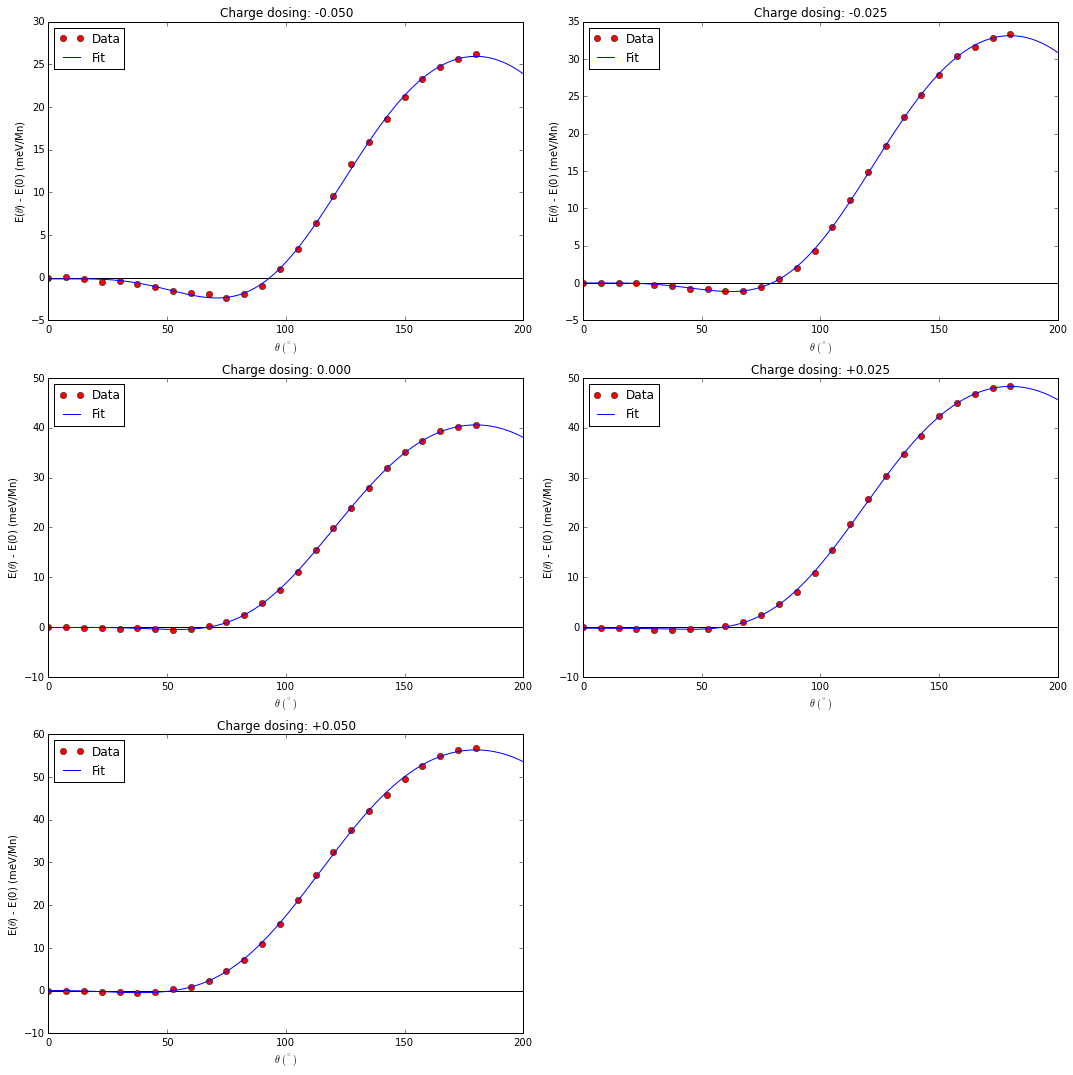

In [26]:
# Define figure
fig = plt.figure(figsize=(15.0, 15.0))

# Run analysis
list_fit_results, j_list_dosing_u312, scaled_dosing_u312, theta_u312_minimum_dosing, theta_u312_minimum_dosing_model = spinsprl_fit_and_plot(chg_u312_data_list, 1, fig, 3, 2)

# Print results
print('Results for charge dosing calculations (U = 3.12 eV)')
print_exchange_const(list_fit_results, "Dosing")

print("\nScaled exchange constants (U = 3.12 eV)")
print_scaled_exchange_consts(scaled_dosing_u312, "Dosing")
    
print("\nResults for minimum Theta (U = 3.12 eV)")
print_min_theta(theta_u312_minimum_dosing, theta_u312_minimum_dosing_model, "Dosing")

# Save scaled coordinates
np.savetxt(str(OUTPUTPATH / "dosing_jscaled_u312.dat.gz"), np.array(scaled_dosing_u312)[:, 1:4], fmt='%.4f', delimiter=' ')

# Tight layout for figure panels
fig.tight_layout()

### Dosing: U = 4.7 eV
[Return to Table of Contents](#Table-of-Contents)

Results for charge dosing calculations
 Dosing         j1    j1 Err        j2    j2 Err        j3    j3 Err        j4    j4 Err     const  const Er    R^2
  -0.050   -0.6574    0.0859    3.6749    0.0860   -0.7146    0.0859   -0.6583    0.0860   -1.9526    0.0620  0.990
  -0.025   -3.1144    0.0704    4.3517    0.0705   -0.3170    0.0704   -0.9235    0.0705   -0.2744    0.0508  0.997
  -0.010   -4.8464    0.0632    4.7346    0.0632   -0.1601    0.0632   -0.9704    0.0632    1.0315    0.0455  0.998
  -0.005   -5.4763    0.0663    4.9005    0.0664   -0.0754    0.0663   -0.9132    0.0664    1.4484    0.0478  0.998
   0.000   -6.1229    0.0706    5.0350    0.0707   -0.0480    0.0706   -0.9103    0.0707    1.8180    0.0509  0.998
   0.005   -6.7465    0.0764    5.2203    0.0765    0.0486    0.0764   -0.8760    0.0765    2.1707    0.0551  0.998
   0.010   -7.4455    0.0821    5.4008    0.0822    0.1156    0.0821   -0.8414    0.0822    2.6021    0.0592  0.998
   0.025   -9.6007    0.0854    5

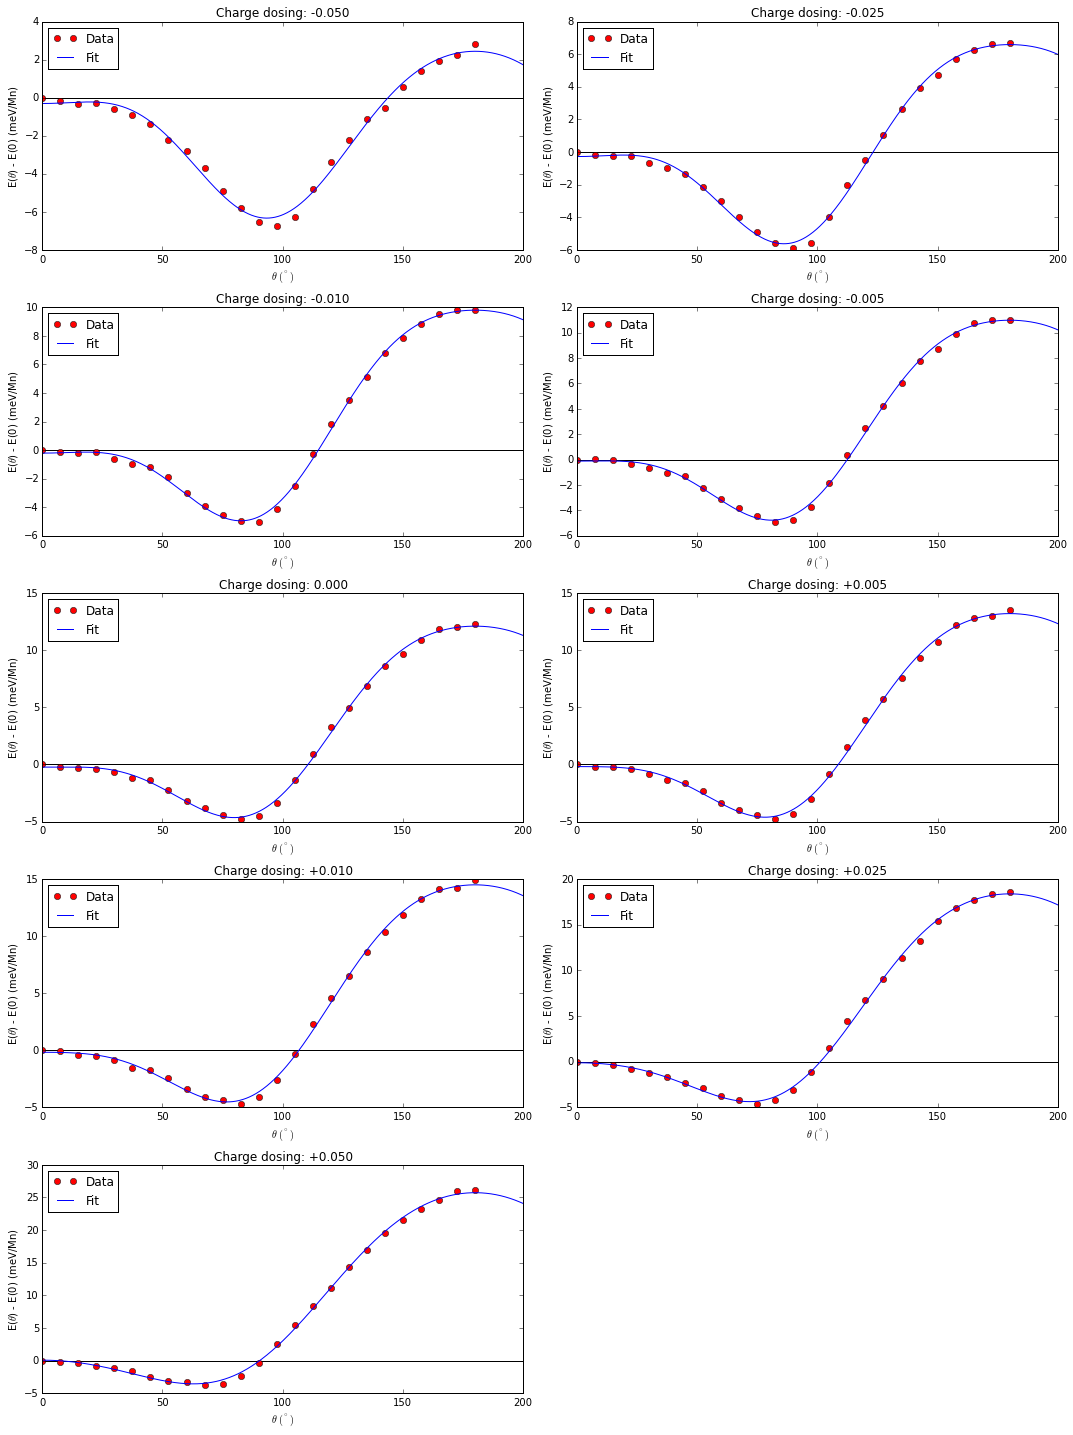

In [27]:
# Define figure
fig = plt.figure(figsize=(15.0, 20.0))

# Run analysis
list_fit_results, j_list_dosing, scaled_dosing, theta_minimum_dosing, theta_minimum_dosing_model = spinsprl_fit_and_plot(chg_data_list, 1, fig, 5, 2)

# Print results
print('Results for charge dosing calculations')
print_exchange_const(list_fit_results, "Dosing")
    
print("\nScaled exchange constants")
print_scaled_exchange_consts(scaled_dosing, "Dosing")
    
print("\nResults for minimum Theta")
print_min_theta(theta_minimum_dosing, theta_minimum_dosing_model, "Dosing")

# Save scaled coordinates
np.savetxt(str(OUTPUTPATH / "dosing_jscaled.dat.gz"), np.array(scaled_dosing)[1:9, 1:4], fmt='%.4f', delimiter=' ')

# Tight layout for figure panels
fig.tight_layout()

## Virtual crystal approximation
[Return to Table of Contents](#Table-of-Contents)

### VCA: U = 3.12 eV
[Return to Table of Contents](#Table-of-Contents)

Results for VCA calculations (U = 3.12 eV)
    VCA         j1    j1 Err        j2    j2 Err        j3    j3 Err        j4    j4 Err     const  const Er    R^2
  -0.050  -14.1347    0.0518    7.1857    0.0519   -0.5786    0.0518   -0.6446    0.0519    7.9599    0.0374  1.000
  -0.025  -17.1181    0.0387    7.3614    0.0388   -0.3046    0.0387   -0.6662    0.0388   10.8176    0.0279  1.000
   0.000  -20.2505    0.0435    7.7762    0.0436   -0.0861    0.0435   -0.7000    0.0436   13.1564    0.0314  1.000
   0.025  -23.5647    0.0486    8.1775    0.0487    0.3180    0.0486   -0.6913    0.0487   15.6762    0.0351  1.000
   0.050  -26.9893    0.1015    8.2059    0.1016    0.8370    0.1015   -0.6678    0.1016   18.7310    0.0732  1.000

Scaled exchange constants (U = 3.12 eV)
    VCA      j2/j1     j3/j1     j4/j1  const/j1
  -0.050    0.5084   -0.0409   -0.0456    0.5631
  -0.025    0.4300   -0.0178   -0.0389    0.6319
   0.000    0.3840   -0.0043   -0.0346    0.6497
   0.025    0.3470    0.

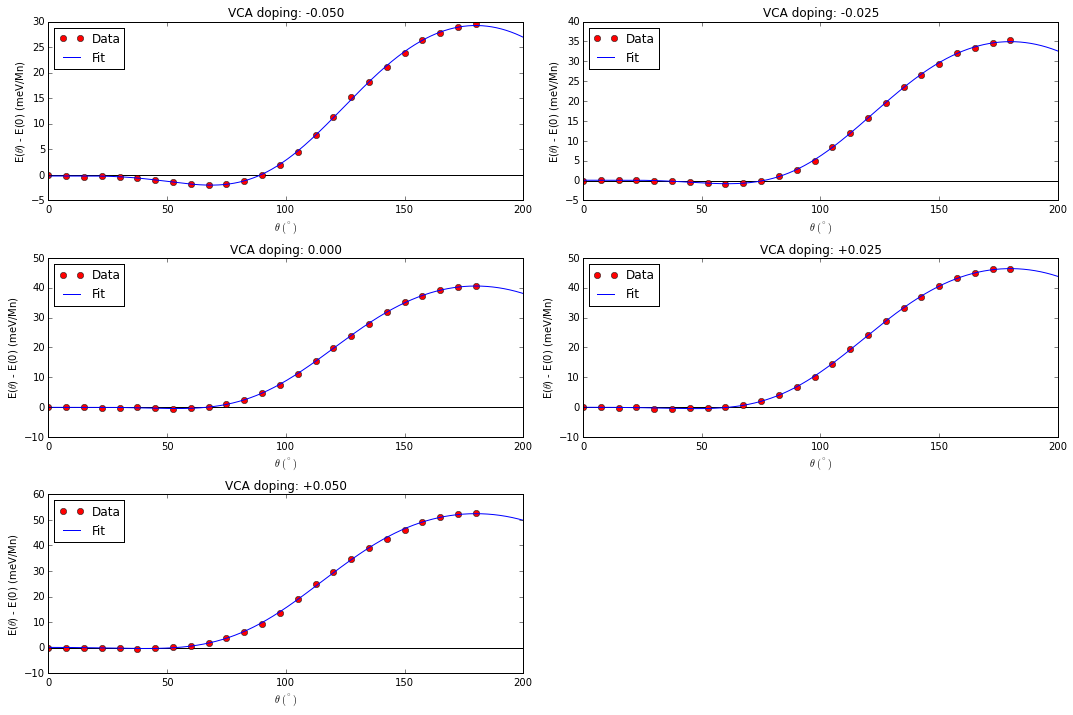

In [28]:
# Define figure
fig = plt.figure(figsize=(15.0, 10.0))

# Run analysis
list_fit_results, j_list_vca_u312, scaled_vca_u312, theta_u312_minimum_vca, theta_u312_minimum_vca_model = spinsprl_fit_and_plot(vca_u312_data_list, 2, fig, 3, 2)

# Print results
print('Results for VCA calculations (U = 3.12 eV)')
print_exchange_const(list_fit_results, "VCA")

print("\nScaled exchange constants (U = 3.12 eV)")
print_scaled_exchange_consts(scaled_vca_u312, "VCA")
    
print("\nResults for minimum Theta (U = 3.12 eV)")
print_min_theta(theta_u312_minimum_vca, theta_u312_minimum_vca_model, "VCA")

# Save scaled coordinates
np.savetxt(str(OUTPUTPATH / "vca_jscaled_u312.dat.gz"), np.array(scaled_vca_u312)[:, 1:4], fmt='%.4f', delimiter=' ')

# Tight layout for figure panels
fig.tight_layout()

### VCA: U = 4.7 eV
[Return to Table of Contents](#Table-of-Contents)

Results for VCA calculations
    VCA         j1    j1 Err        j2    j2 Err        j3    j3 Err        j4    j4 Err     const  const Er    R^2
  -0.050   -1.6202    0.0921    4.0940    0.0923   -0.7442    0.0921   -0.7241    0.0923   -1.2753    0.0664  0.992
  -0.025   -3.6679    0.0703    4.5317    0.0703   -0.3207    0.0703   -0.9799    0.0703    0.2928    0.0507  0.997
   0.000   -6.1229    0.0706    5.0350    0.0707   -0.0480    0.0706   -0.9103    0.0707    1.8180    0.0509  0.998
   0.025   -8.8932    0.0909    5.7378    0.0910    0.3137    0.0909   -0.6957    0.0910    3.4572    0.0655  0.999
   0.050  -11.7329    0.1121    6.2087    0.1122    0.6055    0.1121   -0.4044    0.1122    5.4447    0.0808  0.999

Scaled exchange constants
    VCA      j2/j1     j3/j1     j4/j1  const/j1
  -0.050    2.5269   -0.4594   -0.4469   -0.7871
  -0.025    1.2355   -0.0874   -0.2671    0.0798
   0.000    0.8223   -0.0078   -0.1487    0.2969
   0.025    0.6452    0.0353   -0.0782    0.3887
   

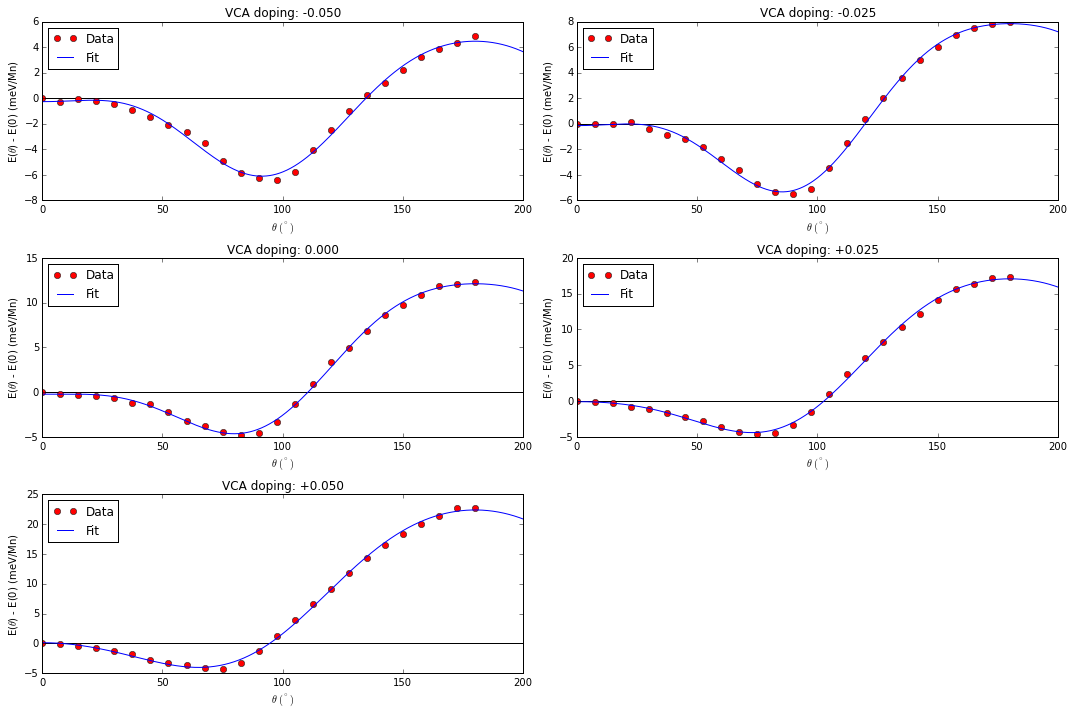

In [29]:
# Define figure
fig = plt.figure(figsize=(15.0, 10.0))

# Run analysis
list_fit_results, j_list_vca, scaled_vca, theta_minimum_vca, theta_minimum_vca_model = spinsprl_fit_and_plot(vca_data_list, 2, fig, 3, 2)

# Print results
print('Results for VCA calculations')
print_exchange_const(list_fit_results, "VCA")

print("\nScaled exchange constants")
print_scaled_exchange_consts(scaled_vca, "VCA")
    
print("\nResults for minimum Theta")
print_min_theta(theta_minimum_vca, theta_minimum_vca_model, "VCA")

# Save scaled coordinates
np.savetxt(str(OUTPUTPATH / "vca_jscaled.dat.gz"), np.array(scaled_vca)[1:5, 1:4], fmt='%.4f', delimiter=' ')

# Tight layout for figure panels
fig.tight_layout()

## Hubbard *U*
[Return to Table of Contents](#Table-of-Contents)

Results for U variation calculations
      U         j1    j1 Err        j2    j2 Err        j3    j3 Err        j4    j4 Err     const  const Er    R^2
   1.700  -37.7314    0.0455    9.0945    0.0456   -0.2716    0.0455   -0.2806    0.0456   29.0353    0.0328  1.000
   2.200  -31.4231    0.0221    8.9775    0.0221    0.0325    0.0221   -0.4564    0.0221   22.9388    0.0159  1.000
   2.700  -25.0395    0.0379    8.5403    0.0379    0.0267    0.0379   -0.6542    0.0379   16.9937    0.0273  1.000
   3.200  -19.4161    0.0462    7.6273    0.0463   -0.0997    0.0462   -0.7022    0.0463   12.3652    0.0333  1.000
   3.700  -14.3696    0.0541    6.7687    0.0542   -0.0028    0.0541   -0.7722    0.0542    8.3019    0.0390  1.000
   4.700   -6.1229    0.0706    5.0350    0.0707   -0.0480    0.0706   -0.9103    0.0707    1.8180    0.0509  0.998

Scaled exchange constants
      U      j2/j1     j3/j1     j4/j1  const/j1
   1.700    0.2410   -0.0072   -0.0074    0.7695
   2.200    0.2857    0.00

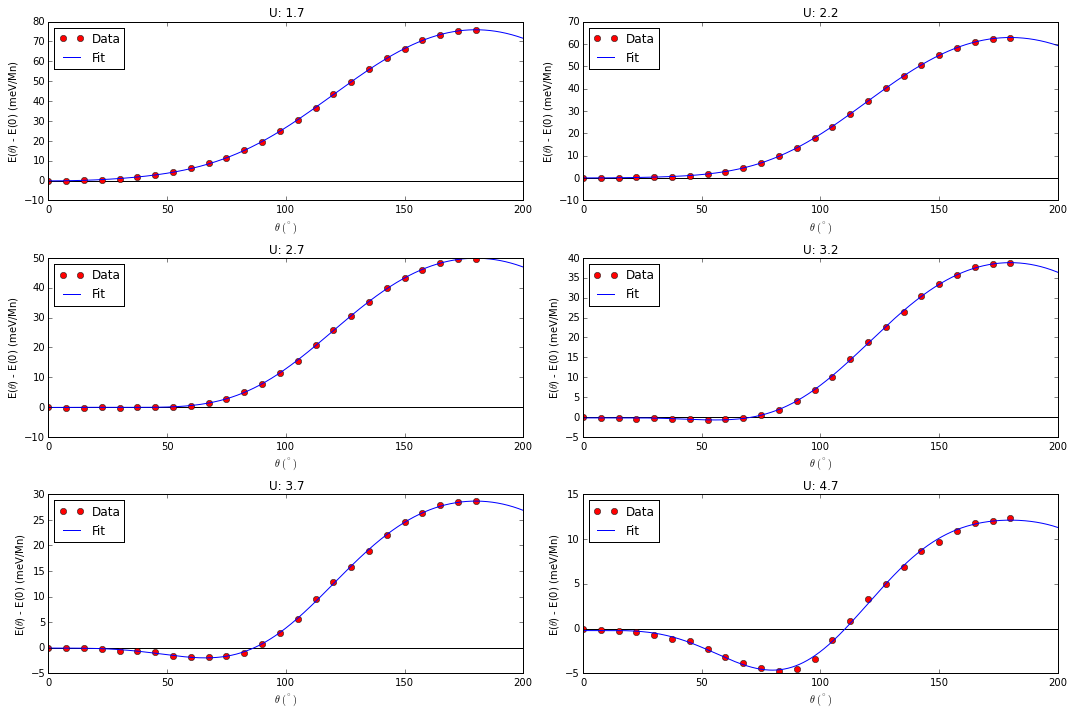

In [30]:
# Define figure
fig = plt.figure(figsize=(15.0, 10.0))

# Run analysis
list_fit_results, j_list_u, scaled_u, theta_minimum_u, theta_minimum_u_model = spinsprl_fit_and_plot(u_data_list, 3, fig, 3, 2)

# Print results
print('Results for U variation calculations')
print_exchange_const(list_fit_results, "U")

print("\nScaled exchange constants")
print_scaled_exchange_consts(scaled_u, "U")
    
print("\nResults for minimum Theta")
print_min_theta(theta_minimum_u, theta_minimum_u_model, "U")

# Save scaled coordinates
np.savetxt(str(OUTPUTPATH / "u_jscaled.dat.gz"), np.array(scaled_u)[:, 1:4], fmt='%.4f', delimiter=' ')

# Tight layout for figure panels
fig.tight_layout()

# Visualization of results
[Return to Table of Contents](#Table-of-Contents)

In the previous section we obtained the exchange parameters as a function of pressure, charge dosing, VCA doping, and *U*. We now turn to visualizing the parameters in an effort to try and figure out the basic trends.

The details of most of the following plots are discussed at length in the main text of the paper, so we do not repeat those discussions here. In the instances where we present plots that were not presented in the main text, we give a few words of discussion.

## Pressure/Dosing/VCA/U dependence of exchange parameters
[Return to Table of Contents](#Table-of-Contents)

Here we plot the exchange parameters as a function of pressure/dosing/VCA/U. We create two sets of plots, one set that plots the unscaled $J_{i}$ parameters, and another set that plots scaled $j_{i}$ parameters.

First, we convert the lists of j parameters as a function of the different variables into numpy arrays, and also create lists that will hold the subplot information that will be used to generate figure panels.

In [31]:
# Convert lists to numpy array
j_vs_p = np.array(j_list_p)
j_vs_chg = np.array(j_list_dosing)
j_vs_vca = np.array(j_list_vca)
j_vs_p_u312 = np.array(j_list_p_u312)
j_vs_chg_u312 = np.array(j_list_dosing_u312)
j_vs_vca_u312 = np.array(j_list_vca_u312)
j_vs_u = np.array(j_list_u)
scaled_j_vs_p = np.array(scaled_pressure)
scaled_j_vs_chg = np.array(scaled_dosing)
scaled_j_vs_vca = np.array(scaled_vca)
scaled_j_vs_p_u312 = np.array(scaled_pressure_u312)
scaled_j_vs_chg_u312 = np.array(scaled_dosing_u312)
scaled_j_vs_vca_u312 = np.array(scaled_vca_u312)
scaled_j_vs_u = np.array(scaled_u)

# Subplot lists
j_vs_p_subp = []
j_vs_chg_subp = []
j_vs_vca_subp = []
j_vs_p_u312_subp = []
j_vs_chg_u312_subp = []
j_vs_vca_u312_subp = []
j_vs_u_subp = []
scaled_j_vs_p_subp = []
scaled_j_vs_chg_subp = []
scaled_j_vs_vca_subp = []
scaled_j_vs_p_u312_subp = []
scaled_j_vs_chg_u312_subp = []
scaled_j_vs_vca_u312_subp = []
scaled_j_vs_u_subp = []

# Lists for colors and labels
color_list = ['ro-', 'bo-', 'go-', 'mo-']
color_list2 = ['bo-', 'go-', 'mo-']
label_list = [r'$J_1$', r'$J_2$', r'$J_3$', r'$J_4$']
label_list2 = [r'$j_{2}$', r'$j_3$', r'$j_4$']

# Lists of data and subplots
data_list = [[j_vs_p_subp, j_vs_p], [j_vs_chg_subp, j_vs_chg], [j_vs_vca_subp, j_vs_vca], [j_vs_u_subp, j_vs_u], [j_vs_p_u312_subp, j_vs_p_u312], [j_vs_chg_u312_subp, j_vs_chg_u312], [j_vs_vca_u312_subp, j_vs_vca_u312]]
data_list2 = [[scaled_j_vs_p_subp, scaled_j_vs_p], [scaled_j_vs_chg_subp, scaled_j_vs_chg], [scaled_j_vs_vca_subp, scaled_j_vs_vca], [scaled_j_vs_u_subp, scaled_j_vs_u], [scaled_j_vs_p_u312_subp, scaled_j_vs_p_u312], [scaled_j_vs_chg_u312_subp, scaled_j_vs_chg_u312], [scaled_j_vs_vca_u312_subp, scaled_j_vs_vca_u312]]

# Fill subplot lists
create_full_subp(data_list, color_list, label_list, 4)
create_full_subp(data_list2, color_list2, label_list2, 3)

### Visualizing unscaled exchange parameters
[Return to Table of Contents](#Table-of-Contents)

Here plot the exchange parameters $J_{1}$, $J_{2}$, $J_{3}$, and $J_{4}$ as a function of pressure, charge dosing, VCA, and *U*.

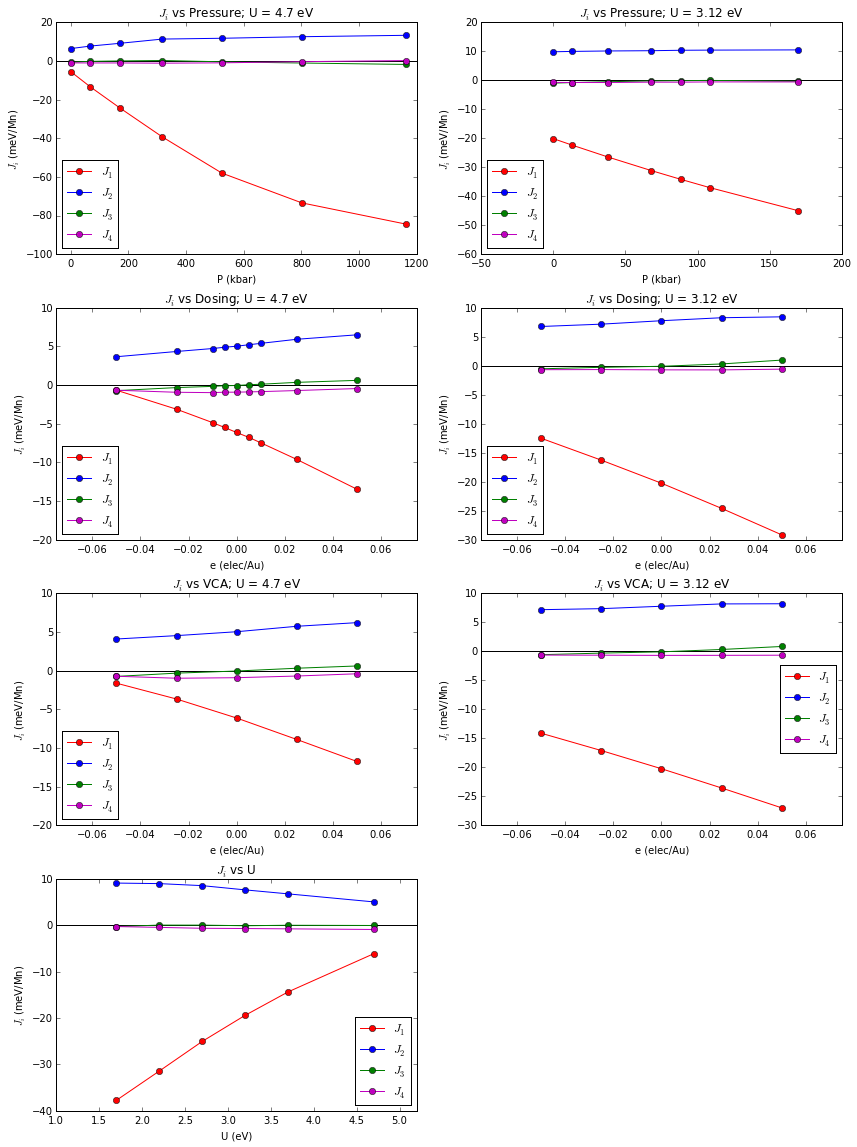

In [32]:
# Create figure
fig = plt.figure(figsize=(12.0, 16.0))
row = 4
col = 2

# Define subplots
subplot_list = [
                [1, 'P (kbar)', r'$J_{i}$ (meV/Mn)', r'$J_{i}$ vs Pressure; U = 4.7 eV', [-50, 1200, -100, 20], j_vs_p_subp],
                [3, r"e (elec/Au)", r'$J_{i}$ (meV/Mn)', r'$J_{i}$ vs Dosing; U = 4.7 eV', [-0.075, 0.075, -20, 10], j_vs_chg_subp],
                [5, r"e (elec/Au)", r'$J_{i}$ (meV/Mn)', r'$J_{i}$ vs VCA; U = 4.7 eV', [-0.075, 0.075, -20, 10], j_vs_vca_subp],
                [7, 'U (eV)', r'$J_{i}$ (meV/Mn)', r'$J_{i}$ vs U', [1, 5.2, -40, 10], j_vs_u_subp],
                [2, 'P (kbar)', r'$J_{i}$ (meV/Mn)', r'$J_{i}$ vs Pressure; U = 3.12 eV', [-50, 200, -60, 20], j_vs_p_u312_subp],
                [4, r"e (elec/Au)", r'$J_{i}$ (meV/Mn)', r'$J_{i}$ vs Dosing; U = 3.12 eV', [-0.075, 0.075, -30, 10], j_vs_chg_u312_subp],
                [6, r"e (elec/Au)", r'$J_{i}$ (meV/Mn)', r'$J_{i}$ vs VCA; U = 3.12 eV', [-0.075, 0.075, -30, 10], j_vs_vca_u312_subp]
               ]

# Generate subplots
for entry in subplot_list:
    n = entry[0]
    x_label = entry[1]
    y_label = entry[2]
    in_title = entry[3]
    axis_range = entry[4]
    plot_list = entry[5]
    ax = fig_plot(fig, row, col, n, x_label, y_label, in_title, axis_range, plot_list)
    ax.axhspan(0, 0, 0, 1)
    ax.legend(loc="best", shadow=False, numpoints=1)

# Improve spacing between subplots
fig.tight_layout()

These plots confirm that $J_{1}$ is affected the most strongly by variations in pressure, charge dosing, VCA, and *U*, and the parameter is always ferromagnetic. Increasing pressure and electron doping has the effect of making $J_{1}$ more ferromagnetic, while hole doping and increasing *U* has the effect of suppressing $J_{1}$. In absolute units, the remaining parameters, $J_{2}$, $J_{3}$, and $J_{4}$ do not vary as dramatically. [The phase diagrams discussed for the $J_{1}-J_{2}-J_{3}-J_{4}$ model](#Case-3:-$j_{1},-j_{2},-j_{3},-j_{4}-\neq-0$) are plotted in terms of the scaled parameters, $j_{i} \equiv J_{i} / \vert J_{1} \vert$, and much of the variations in $j_{i}$ can be traced to these large changes in $J_{1}$. In particular, couplings between third and fourth neighbors become important as $\vert J_{1} \vert \sim \vert J_{3} \vert, \vert J_{4} \vert$.

### Visualizing scaled exchange parameters
[Return to Table of Contents](#Table-of-Contents)

Here we plot the scaled exchange parameters, $j_{2}$, $j_{3}$, and $j_{4}$, as a function of pressure, charge dosing, VCA, and U.

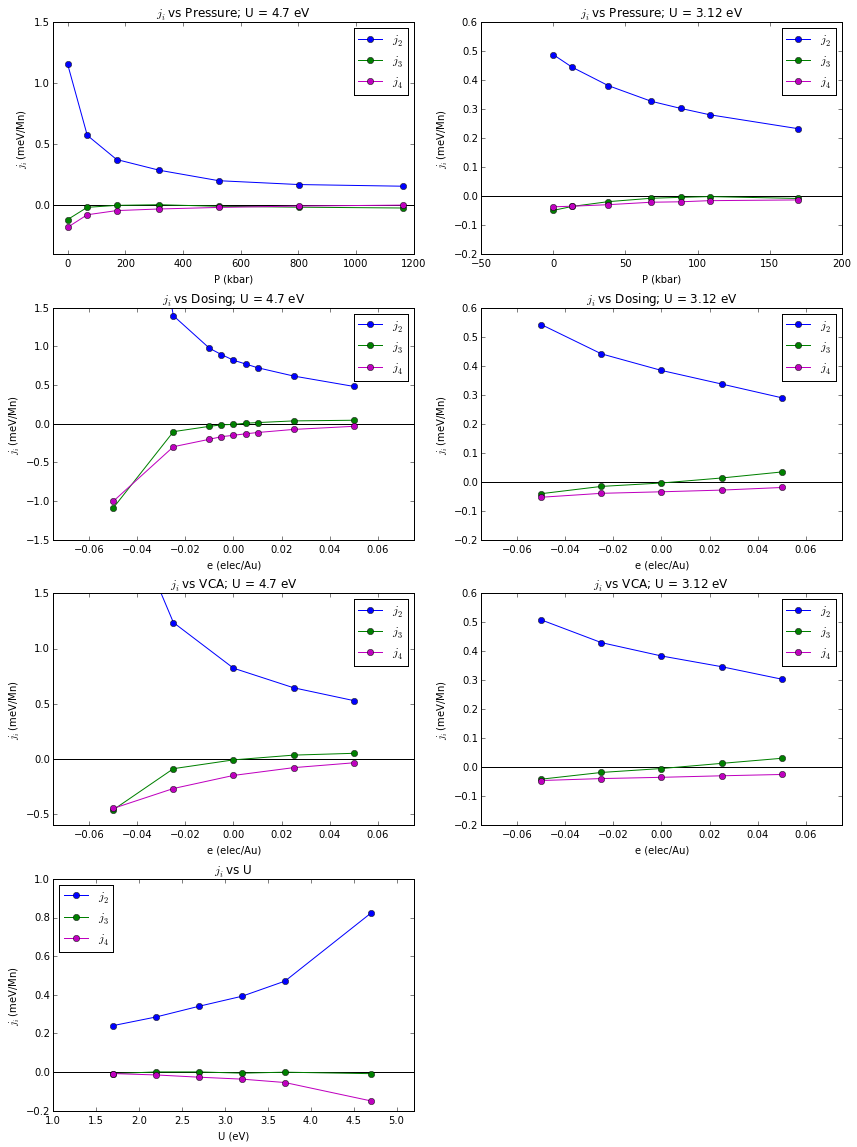

In [33]:
# Create figure
fig = plt.figure(figsize=(12.0, 16.0))
row = 4
col = 2

# Define subplots
subplot_list = [
                [1, 'P (kbar)', r'$j_{i}$ (meV/Mn)', r'$j_{i}$ vs Pressure; U = 4.7 eV', [-50, 1200, -0.4, 1.5], scaled_j_vs_p_subp],
                [3, r"e (elec/Au)", r'$j_{i}$ (meV/Mn)', r'$j_{i}$ vs Dosing; U = 4.7 eV', [-0.075, 0.075, -1.5, 1.5], scaled_j_vs_chg_subp],
                [5, r"e (elec/Au)", r'$j_{i}$ (meV/Mn)', r'$j_{i}$ vs VCA; U = 4.7 eV', [-0.075, 0.075, -0.6, 1.5], scaled_j_vs_vca_subp],
                [7, 'U (eV)', r'$j_{i}$ (meV/Mn)', r'$j_{i}$ vs U', [1, 5.2, -0.2, 1], scaled_j_vs_u_subp],
                [2, 'P (kbar)', r'$j_{i}$ (meV/Mn)', r'$j_{i}$ vs Pressure; U = 3.12 eV', [-50, 200, -0.2, 0.6], scaled_j_vs_p_u312_subp],
                [4, r"e (elec/Au)", r'$j_{i}$ (meV/Mn)', r'$j_{i}$ vs Dosing; U = 3.12 eV', [-0.075, 0.075, -0.2, 0.6], scaled_j_vs_chg_u312_subp],
                [6, r"e (elec/Au)", r'$j_{i}$ (meV/Mn)', r'$j_{i}$ vs VCA; U = 3.12 eV', [-0.075, 0.075, -0.2, 0.6], scaled_j_vs_vca_u312_subp]
               ]

# Generate subplots
for entry in subplot_list:
    n = entry[0]
    x_label = entry[1]
    y_label = entry[2]
    in_title = entry[3]
    axis_range = entry[4]
    plot_list = entry[5]
    ax = fig_plot(fig, row, col, n, x_label, y_label, in_title, axis_range, plot_list)
    ax.axhspan(0, 0, 0, 1)
    ax.legend(loc="best", shadow=False, numpoints=1)

# Improve spacing between subplots
fig.tight_layout()

See the main text for a discussion of the scaled exchange parameters.

## Pressure/Dosing/VCA/U dependence of $\theta$
[Return to Table of Contents](#Table-of-Contents)

To setup plots of $\theta$ as a function of pressure, charge dosing, VCA, and U, we convert the lists of $\theta$ into numpy arrays and define lists that contain the plotting information.

In [34]:
# Convert lists to numpy array
thmin_vs_p = np.array(theta_minimum_pressure)[0:7].astype("float")
thmin_vs_chg = np.array(theta_minimum_dosing).astype("float")
thmin_vs_vca = np.array(theta_minimum_vca).astype("float")
thmin_vs_p_u312 = np.array(theta_u312_minimum_pressure).astype("float")
thmin_vs_chg_u312 = np.array(theta_u312_minimum_dosing).astype("float")
thmin_vs_vca_u312 = np.array(theta_u312_minimum_vca).astype("float")
thmin_vs_u = np.array(theta_minimum_u).astype("float")
thmin_vs_p_model = np.array(theta_minimum_pressure_model)[0:7].astype("float")
thmin_vs_chg_model = np.array(theta_minimum_dosing_model).astype("float")
thmin_vs_vca_model = np.array(theta_minimum_vca_model).astype("float")
thmin_vs_p_u312_model = np.array(theta_u312_minimum_pressure_model).astype("float")
thmin_vs_chg_u312_model = np.array(theta_u312_minimum_dosing_model).astype("float")
thmin_vs_vca_u312_model = np.array(theta_u312_minimum_vca_model).astype("float")
thmin_vs_u_model = np.array(theta_minimum_u_model).astype("float")

# Subplot Lists
thmin_vs_p_subp = [
    [thmin_vs_p[:, 0], thmin_vs_p[:, 1], 'ro', 'U = 4.7 eV (DFT)'], [thmin_vs_p_u312[:, 0], thmin_vs_p_u312[:, 1], 'bo', 'U = 3.12 eV (DFT)'],
    [thmin_vs_p_model[:, 0], thmin_vs_p_model[:, 1], 'r+--', 'U = 4.7 eV (model)'], [thmin_vs_p_u312_model[:, 0], thmin_vs_p_u312_model[:, 1], 'bx--', 'U = 3.12 eV (model)']
]
thmin_vs_chg_subp = [
    [thmin_vs_chg[:, 0], thmin_vs_chg[:, 1], 'ro', 'U = 4.7 eV (DFT)'], [thmin_vs_chg_u312[:, 0], thmin_vs_chg_u312[:, 1], 'bo', 'U = 3.12 eV (DFT)'],
    [thmin_vs_chg_model[:, 0], thmin_vs_chg_model[:, 1], 'r+--', 'U = 4.7 eV (model)'], [thmin_vs_chg_u312_model[:, 0], thmin_vs_chg_u312_model[:, 1], 'bx--', 'U = 3.12 eV (model)']
]
thmin_vs_vca_subp = [
    [thmin_vs_vca[:, 0], thmin_vs_vca[:, 1], 'ro', 'U = 4.7 eV (DFT)'], [thmin_vs_vca_u312[:, 0], thmin_vs_vca_u312[:, 1], 'bo', 'U = 3.12 eV (DFT)'],
    [thmin_vs_vca_model[:, 0], thmin_vs_vca_model[:, 1], 'r+--', 'U = 4.7 eV (model)'], [thmin_vs_vca_u312_model[:, 0], thmin_vs_vca_u312_model[:, 1], 'bx--', 'U = 3.12 eV (model)']
]
thmin_vs_u_subp = [
    [thmin_vs_u[:, 0], thmin_vs_u[:, 1], 'ro', 'DFT'], [thmin_vs_u_model[:, 0], thmin_vs_u_model[:, 1], 'r+--', 'model']
]

Below we plot $\theta$ as a function of pressure, charge dosing, VCA, and U. $\theta$ was calculated using two methods:
1. Interpolate the DFT energy curves $E(\theta)$, and minimize it.
2. Take the fitted exchange constants $J_{i}$ and plug them into the $J_{1}-J_{2}-J_{3}-J_{4}$ model. Then, minimize the model.

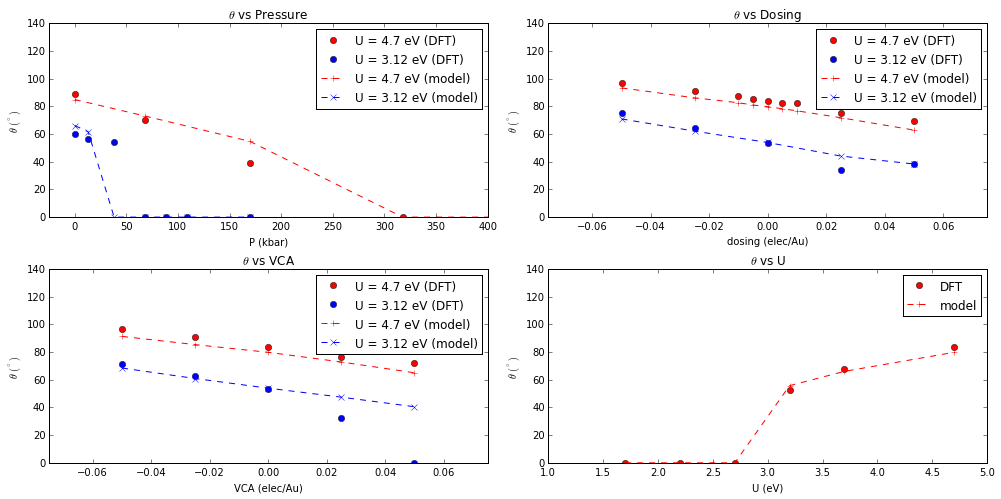

In [35]:
# Create figure
fig = plt.figure(figsize=(14.0, 7.0))
row = 2
col = 2

# Define subplots
subplot_list = [
                [1, 'P (kbar)', r'$\theta$ $(^{\circ})$', r'$\theta$ vs Pressure', [-25, 400, 0, 140], thmin_vs_p_subp],
                [2, r"dosing (elec/Au)", r'$\theta$ $(^{\circ})$', r'$\theta$ vs Dosing', [-0.075, 0.075, 0, 140], thmin_vs_chg_subp],
                [3, 'VCA (elec/Au)', r'$\theta$ $(^{\circ})$', r'$\theta$ vs VCA', [-0.075, 0.075, 0, 140], thmin_vs_vca_subp],
                [4, r"U (eV)", r'$\theta$ $(^{\circ})$', r'$\theta$ vs U', [1, 5, 0, 140], thmin_vs_u_subp]
               ]

# Generate subplots
for entry in subplot_list:
    n = entry[0]
    x_label = entry[1]
    y_label = entry[2]
    in_title = entry[3]
    axis_range = entry[4]
    plot_list = entry[5]
    ax = fig_plot(fig, row, col, n, x_label, y_label, in_title, axis_range, plot_list)
    ax.legend(loc="upper right", shadow=False, numpoints=1)

# Improve spacing between subplots
fig.tight_layout()

See the main text for a discussion of $\theta$ as a function of pressure, charge dosing, VCA, and U.

## Parametric plot of $j_{3}, j_{4}$ on contour plot of spiral-to-FM transition surface
[Return to Table of Contents](#Table-of-Contents)

It is instructive to make parametric plots of $(j_{3}, j_{4})$ as pressure, charge dosing, VCA, and U are varied, and overlay these parametric curves on top of the contour plot that depicts the surface in $(j_{2}, j_{3}, j_{4})$ space that separates ferromagnetic and spiral order. This shows how close MnAu$_{2}$ gets to the dividing line between 1st and 2nd order phase transitions as these different parameters are varied. See the main text for a detailed discussion of the following plot.

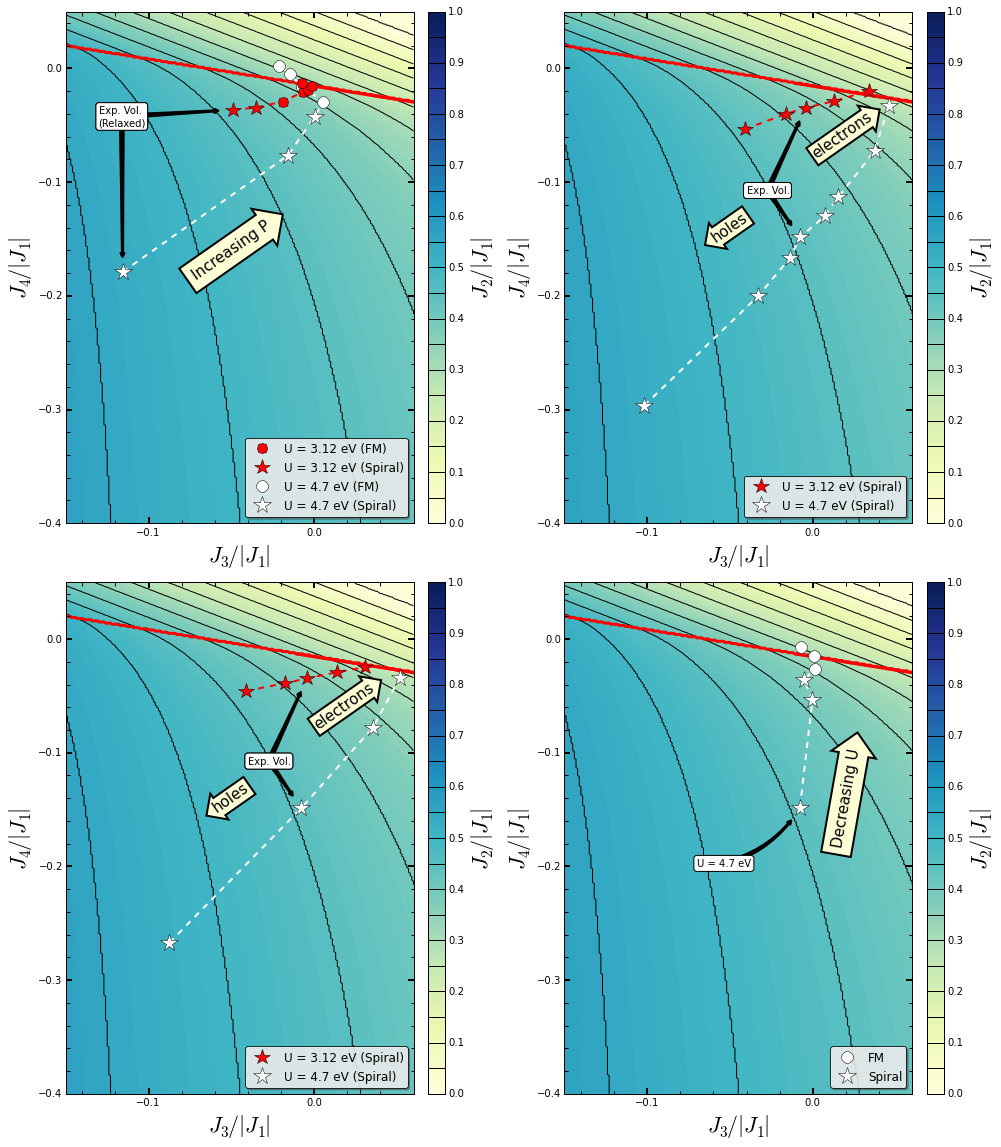

In [36]:
# Build the figure
fig = plt.figure(figsize=(14, 16))

# Create plotting mesh
delta = 0.001
X = np.arange(-0.15, 0.061, delta)
Y = np.arange(-0.40, 0.051, delta)
X, Y = np.meshgrid(X, Y)

# Define temporary variables
tmp_title = ""
tmp_filename = "critical_j2j3j4_zoomed.dat.gz"
    
# Load array
Z_j2 = np.loadtxt(str(OUTPUTPATH / tmp_filename))
    
# Create subplot
plot_list = [[X, Y, Z_j2, np.arange(0, 1.01, 0.01), 'YlGnBu', 'lower']]
ax1 = fig_contour3(fig, 2, 2, 1, r"$J_{3}/\vert J_{1} \vert$", r"$J_{4}/\vert J_{1} \vert$", tmp_title, plot_list, -1, 1.1, 0.1, -1, 1.1, 0.1, 0, 1.1, 0.1)
ax1.set_xlim(-0.15, 0.06)
ax1.set_ylim(-0.4, 0.05)
ax2 = fig_contour3(fig, 2, 2, 2, r"$J_{3}/\vert J_{1} \vert$", r"$J_{4}/\vert J_{1} \vert$", tmp_title, plot_list, -1, 1.1, 0.1, -1, 1.1, 0.1, 0, 1.1, 0.1)
ax2.set_xlim(-0.15, 0.06)
ax2.set_ylim(-0.4, 0.05)
ax3 = fig_contour3(fig, 2, 2, 3, r"$J_{3}/\vert J_{1} \vert$", r"$J_{4}/\vert J_{1} \vert$", tmp_title, plot_list, -1, 1.1, 0.1, -1, 1.1, 0.1, 0, 1.1, 0.1)
ax3.set_xlim(-0.15, 0.06)
ax3.set_ylim(-0.4, 0.05)
ax4 = fig_contour3(fig, 2, 2, 4, r"$J_{3}/\vert J_{1} \vert$", r"$J_{4}/\vert J_{1} \vert$", tmp_title, plot_list, -1, 1.1, 0.1, -1, 1.1, 0.1, 0, 1.1, 0.1)
ax4.set_xlim(-0.15, 0.06)
ax4.set_ylim(-0.4, 0.05)

# Data to plot
X = np.arange(-0.01, 0.061, 0.001)
Y = - (1 + 15 * X)/64
dividing_line = np.loadtxt(str(OUTPUTPATH / "j3j4_dividing_line_zoomed.dat"))

# Plot dividing line
ax1.plot(X, Y, color='red', linewidth=3)
ax2.plot(X, Y, color='red', linewidth=3)
ax3.plot(X, Y, color='red', linewidth=3)
ax4.plot(X, Y, color='red', linewidth=3)
ax1.plot(dividing_line[:,0], dividing_line[:,1], color='red', linewidth=3)
ax2.plot(dividing_line[:,0], dividing_line[:,1], color='red', linewidth=3)
ax3.plot(dividing_line[:,0], dividing_line[:,1], color='red', linewidth=3)
ax4.plot(dividing_line[:,0], dividing_line[:,1], color='red', linewidth=3)

# Load points
pressure_u47_points = np.loadtxt(str(OUTPUTPATH / "p_jscaled.dat.gz"))
dosing_u47_points = np.loadtxt(str(OUTPUTPATH / "dosing_jscaled.dat.gz"))
vca_u47_points = np.loadtxt(str(OUTPUTPATH / "vca_jscaled.dat.gz"))
pressure_u312_points = np.loadtxt(str(OUTPUTPATH / "p_jscaled_u312.dat.gz"))
dosing_u312_points = np.loadtxt(str(OUTPUTPATH / "dosing_jscaled_u312.dat.gz"))
vca_u312_points = np.loadtxt(str(OUTPUTPATH / "vca_jscaled_u312.dat.gz"))
u_points = np.loadtxt(str(OUTPUTPATH / "u_jscaled.dat.gz"))

# Straight lines
ax1.plot(pressure_u47_points[:,1], pressure_u47_points[:,2], 'w--', linewidth=2)
ax1.plot(pressure_u312_points[:,1], pressure_u312_points[:,2], 'r--', linewidth=2)
ax2.plot(dosing_u47_points[:,1], dosing_u47_points[:,2], 'w--', linewidth=2)
ax2.plot(dosing_u312_points[:,1], dosing_u312_points[:,2], 'r--', linewidth=2)
ax3.plot(vca_u47_points[:,1], vca_u47_points[:,2], 'w--', linewidth=2)
ax3.plot(vca_u312_points[:,1], vca_u312_points[:,2], 'r--', linewidth=2)
ax4.plot(u_points[:,1], u_points[:,2], 'w--', linewidth=2)

# Plot U=4.7 points
for item in pressure_u47_points:
    tmp_j2 = item[0]
    tmp_j3 = item[1]
    tmp_j4 = item[2]
    j2c_test_out = j2c_test(tmp_j2, tmp_j3, tmp_j4)
    if j2c_test_out == True:
        red_stars_p, = ax1.plot(tmp_j3, tmp_j4, 'w*', ms=18, label=r"U = 4.7 eV (Spiral)")
    else:
        red_circles_p, = ax1.plot(tmp_j3, tmp_j4, 'wo', ms=12, label=r"U = 4.7 eV (FM)")
    
for item in dosing_u47_points:
    tmp_j2 = item[0]
    tmp_j3 = item[1]
    tmp_j4 = item[2]
    j2c_test_out = j2c_test(tmp_j2, tmp_j3, tmp_j4)
    if j2c_test_out == True:
        ax2.plot(tmp_j3, tmp_j4, 'w*', ms=18, label=r"U = 4.7 eV (Spiral)")
    else:
        ax2.plot(tmp_j3, tmp_j4, 'wo', ms=12, label=r"U = 4.7 eV (FM)")
    
for item in vca_u47_points:
    tmp_j2 = item[0]
    tmp_j3 = item[1]
    tmp_j4 = item[2]
    j2c_test_out = j2c_test(tmp_j2, tmp_j3, tmp_j4)
    if j2c_test_out == True:
        ax3.plot(tmp_j3, tmp_j4, 'w*', ms=18, label=r"U = 4.7 eV (Spiral)")
    else:
        ax3.plot(tmp_j3, tmp_j4, 'wo', ms=12, label=r"U = 4.7 eV (FM)")
    
# Plot U=3.12 points
for item in pressure_u312_points:
    tmp_j2 = item[0]
    tmp_j3 = item[1]
    tmp_j4 = item[2]
    j2c_test_out = j2c_test(tmp_j2, tmp_j3, tmp_j4)
    if j2c_test_out == True:
        white_stars_p, = ax1.plot(tmp_j3, tmp_j4, 'r*', ms=16, label=r"U = 3.12 eV (Spiral)")
    else:
        white_circles_p, = ax1.plot(tmp_j3, tmp_j4, 'ro', ms=10, label=r"U = 3.12 eV (FM)")
    
for item in dosing_u312_points:
    tmp_j2 = item[0]
    tmp_j3 = item[1]
    tmp_j4 = item[2]
    j2c_test_out = j2c_test(tmp_j2, tmp_j3, tmp_j4)
    if j2c_test_out == True:
        ax2.plot(tmp_j3, tmp_j4, 'r*', ms=16)
    else:
        ax2.plot(tmp_j3, tmp_j4, 'ro', ms=10)
    
for item in vca_u312_points:
    tmp_j2 = item[0]
    tmp_j3 = item[1]
    tmp_j4 = item[2]
    j2c_test_out = j2c_test(tmp_j2, tmp_j3, tmp_j4)
    if j2c_test_out == True:
        ax3.plot(tmp_j3, tmp_j4, 'r*', ms=16)
    else:
        ax3.plot(tmp_j3, tmp_j4, 'ro', ms=10)

# Plot U dependence
for item in u_points:
    tmp_j2 = item[0]
    tmp_j3 = item[1]
    tmp_j4 = item[2]
    j2c_test_out = j2c_test(tmp_j2, tmp_j3, tmp_j4)
    if j2c_test_out == True:
        white_stars_u, = ax4.plot(tmp_j3, tmp_j4, 'w*', ms=18, label="Spiral")
    else:
        white_circles_u, = ax4.plot(tmp_j3, tmp_j4, 'wo', ms=12, label="FM")

# Annotations
ax1.annotate("Exp. Vol.\n(Relaxed)", xy=(pressure_u47_points[0, 1], pressure_u47_points[0, 2]), xytext=(-0.13, -0.05), bbox=dict(boxstyle="round", fc="w"),
            arrowprops=dict(arrowstyle="fancy", facecolor='black', lw=2, shrinkB=15),
            )
ax1.annotate("Exp. Vol.\n(Relaxed)", xy=(pressure_u312_points[0, 1], pressure_u312_points[0, 2]), xytext=(-0.13, -0.05), bbox=dict(boxstyle="round", fc="w"),
            arrowprops=dict(arrowstyle="fancy", facecolor='black', lw=2, shrinkB=15),
            )
ax1.text(-0.05, -0.16, "Increasing P", ha="center", va="center", rotation=35,
            size=15,
            bbox=dict(boxstyle="rarrow,pad=0.5", fc="#fdfed5", ec="k", lw=2))
ax2.annotate('Exp. Vol.', xy=(dosing_u47_points[3, 1], dosing_u47_points[3, 2]), xytext=(-0.04, -0.11), bbox=dict(boxstyle="round", fc="w"),
            arrowprops=dict(arrowstyle="fancy", facecolor='black', lw=2, shrinkB=15),
            )
ax2.annotate('Exp. Vol.', xy=(dosing_u312_points[2, 1], dosing_u312_points[2, 2]), xytext=(-0.04, -0.11), bbox=dict(boxstyle="round", fc="w"),
            arrowprops=dict(arrowstyle="fancy", facecolor='black', lw=2, shrinkB=15),
            )
ax2.text(0.018, -0.059, "electrons", ha="center", va="center", rotation=35,
            size=15,
            bbox=dict(boxstyle="rarrow,pad=0.2", fc="#fdfed5", ec="k", lw=2))
ax2.text(-0.05, -0.14, "holes", ha="center", va="center", rotation=35,
            size=15,
            bbox=dict(boxstyle="larrow,pad=0.2", fc="#fdfed5", ec="k", lw=2))
ax3.annotate('Exp. Vol.', xy=(vca_u47_points[1, 1], vca_u47_points[1, 2]), xytext=(-0.04, -0.11), bbox=dict(boxstyle="round", fc="w"),
            arrowprops=dict(arrowstyle="fancy", facecolor='black', lw=2, shrinkB=15),
            )
ax3.annotate('Exp. Vol.', xy=(vca_u312_points[2, 1], vca_u312_points[2, 2]), xytext=(-0.04, -0.11), bbox=dict(boxstyle="round", fc="w"),
            arrowprops=dict(arrowstyle="fancy", facecolor='black', lw=2, shrinkB=15),
            )
ax3.text(0.018, -0.059, "electrons", ha="center", va="center", rotation=35,
            size=15,
            bbox=dict(boxstyle="rarrow,pad=0.2", fc="#fdfed5", ec="k", lw=2))
ax3.text(-0.05, -0.14, "holes", ha="center", va="center", rotation=35,
            size=15,
            bbox=dict(boxstyle="larrow,pad=0.2", fc="#fdfed5", ec="k", lw=2))
ax4.annotate('U = 4.7 eV', xy=(u_points[5, 1], u_points[5, 2]), xytext=(-0.07, -0.2), bbox=dict(boxstyle="round", fc="w"),
            arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=0.2", facecolor='black', lw=2, shrinkB=15),
            )
ax4.text(0.02, -0.14, "Decreasing U", ha="center", va="center", rotation=80,
            size=15,
            bbox=dict(boxstyle="rarrow,pad=0.5", fc="#fdfed5", ec="k", lw=2))
    
# Legends
ax1.legend(loc="lower right", shadow = True, framealpha = 0.8, fancybox = True,
           handles=[white_circles_p, white_stars_p, red_circles_p, red_stars_p],
           handler_map={white_circles_p: HandlerLine2D(numpoints=1),
                        white_stars_p: HandlerLine2D(numpoints=1),
                        red_circles_p: HandlerLine2D(numpoints=1),
                        red_stars_p: HandlerLine2D(numpoints=1)})
ax2.legend(loc="lower right", shadow = True, framealpha = 0.8, fancybox = True,
           handles=[white_stars_p, red_stars_p],
           handler_map={white_stars_p: HandlerLine2D(numpoints=1),
                        red_stars_p: HandlerLine2D(numpoints=1)})
ax3.legend(loc="lower right", shadow = True, framealpha = 0.8, fancybox = True,
           handles=[white_stars_p, red_stars_p],
           handler_map={white_stars_p: HandlerLine2D(numpoints=1),
                        red_stars_p: HandlerLine2D(numpoints=1)})
ax4.legend(loc="lower right", shadow = True, framealpha = 0.8, fancybox = True,
           handles=[white_circles_u, white_stars_u],
           handler_map={white_circles_u: HandlerLine2D(numpoints=1),
                        white_stars_u: HandlerLine2D(numpoints=1)})

# Better layout
fig.tight_layout()

## Evolution of MnAu$_{2}$ on $\theta$ contour plot for $J_{1}-J_{2}-J_{3}-J_{4}$ model
[Return to Table of Contents](#Table-of-Contents)

The [parameteric plots in the previous section](#Evolution-of-MnAu$_{2}$-on-$\theta$-contour-plot-for-$J_{1}-J_{2}-J_{3}-J_{4}$-model) contain a lot of information about MnAu$_{2}$, and may not be as easy to understand at first glance as the $\theta$-based phase diagrams shown in the [$J_{1}-J_{2}-J_{3}$](#Case-2:-$j_{1},-j_{2},-j_{3}-\neq-0$,-$j_{4}-=-0$) and [$J_{1}-J_{2}-J_{3}-J_{4}$](#Case-3:-$j_{1},-j_{2},-j_{3},-j_{4}-\neq-0$) model discussions, where $j_{4}$ is fixed. It is useful then to create a series of these $\theta$ phase diagrams using [the fitted exchange parameters](#Fitting-DFT-spin-spiral-calculations). This shows how MnAu$_{2}$ evolves as a function of pressure, charge dosing, VCA, and U in a more straightforward manner.

To create these diagrams, we first ran [this Python code](#Using-fitted-exchange-parameters) to calculate $\theta$ as a function of $(j_{2}, j_{3})$ for different fixed $j_{4}$'s. We then create the contour plot, and indicate with a white circle where MnAu$_{2}$ sits in the phase diagram. The title of each panel shows the variable being considered and its value.

### P Diagram: U = 3.12 eV
[Return to Table of Contents](#Table-of-Contents)

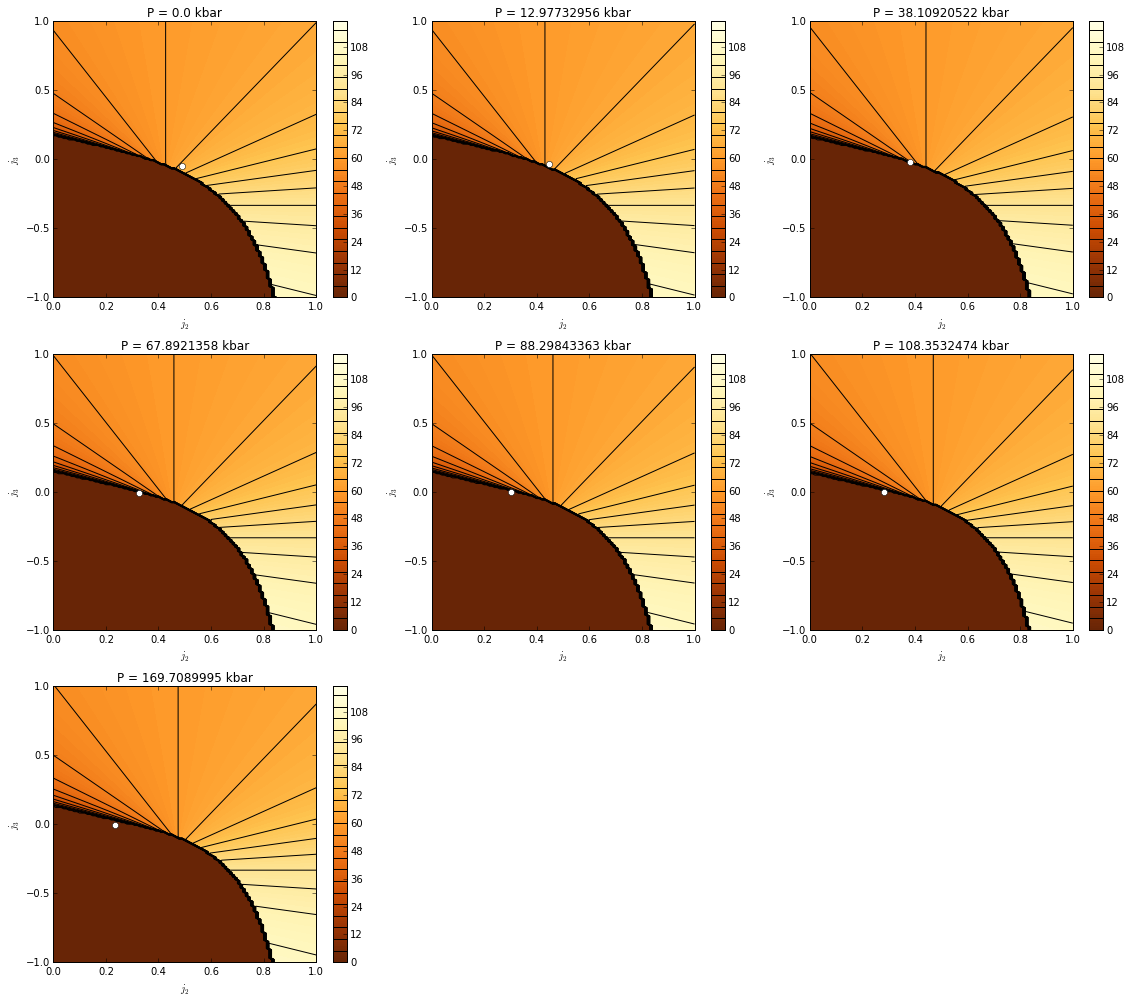

In [37]:
# Create plotting mesh
delta = 0.01
X = np.arange(0, 1.01, delta)
Y = np.arange(-1, 1.01, delta)
X, Y = np.meshgrid(X, Y)

# Set value of j4
j4list = []
for i in range(7):
    j4list.append([scaled_j_vs_p_u312[int(i), 3], int(i + 1), scaled_j_vs_p_u312[int(i), 0],
                   scaled_j_vs_p_u312[int(i), 1], scaled_j_vs_p_u312[int(i), 2]])

# Build the figure
fig = plt.figure(figsize=(16, 14))

for item in j4list:
    tmp_j4 = np.float(item[0])
    subp = item[1]
    tmp_filename = 'dftmodel_results_u312_p' + str(item[2]) + '_z.dat.gz'
    tmp_j2 = np.float(item[3])
    tmp_j3 = np.float(item[4])
    
    # Load array
    Z_th = np.loadtxt(str(OUTPUTPATH / tmp_filename))
    
    ax = fig.add_subplot(3, 3, subp)

    # Label axes
    ax.set_xlabel("$j_{2}$")
    ax.set_ylabel("$j_{3}$")

    # Set titles
    tmp_title = r"P = " + str(item[2]) + " kbar"
    ax.set_title(tmp_title)
            
    # Plot surfaces
    levels = np.arange(0, 120, 1)
    j3contourf = ax.contourf(X, Y, Z_th, levels, cmap='YlOrBr_r', origin='lower')
    j3contour = ax.contour(X, Y, Z_th, levels=j3contourf.levels[::5], colors = ('k'))
    ax.plot([tmp_j2], [tmp_j3], 'wo')
    cb = fig.colorbar(j3contourf)
    cb.add_lines(j3contour)

fig.tight_layout()

### P Diagram: U = 4.7 eV
[Return to Table of Contents](#Table-of-Contents)

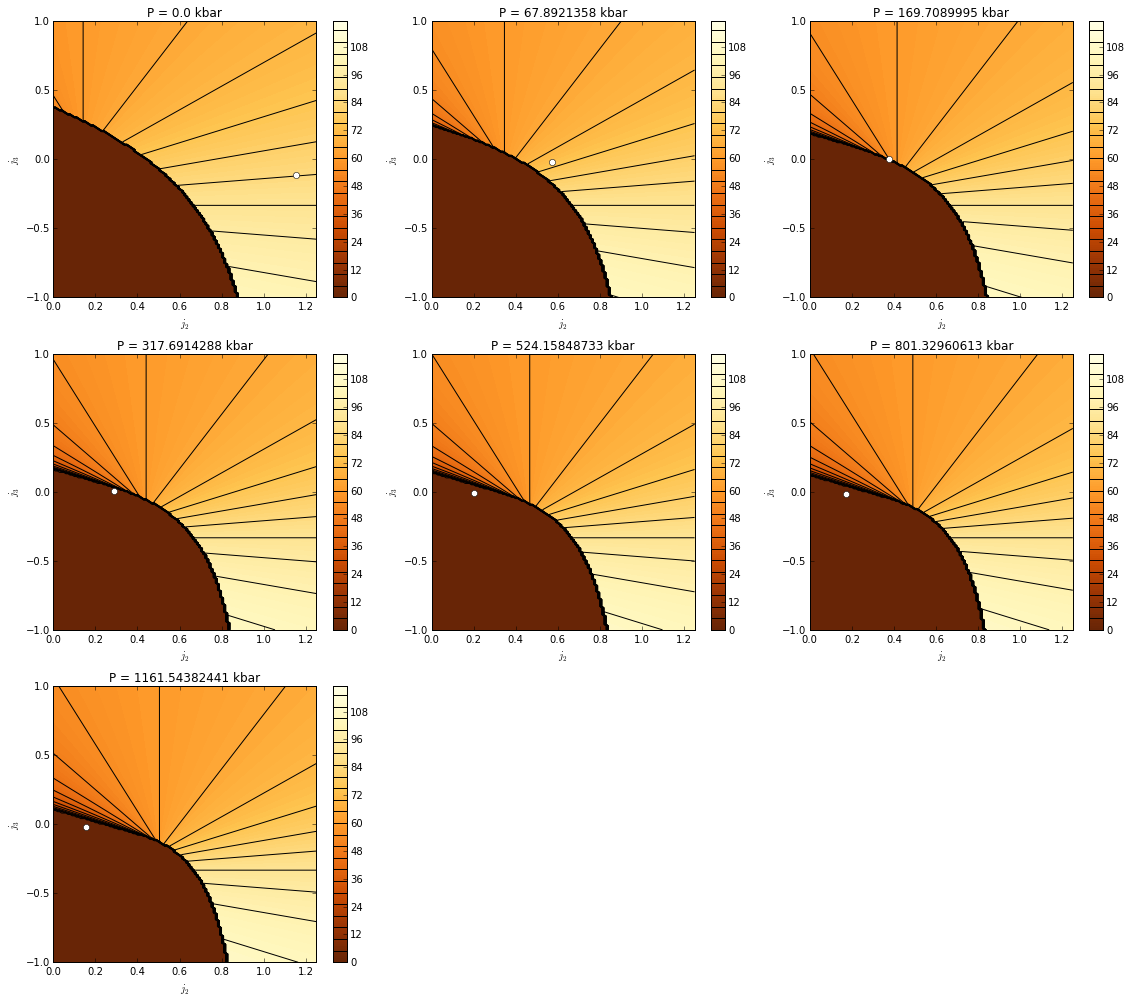

In [38]:
# Create plotting mesh
delta = 0.01
X = np.arange(0, 1.26, delta)
Y = np.arange(-1, 1.01, delta)
X, Y = np.meshgrid(X, Y)

# Set value of j4
j4list = []
for i in range(7):
    j4list.append([scaled_j_vs_p[int(i), 3], int(i + 1), scaled_j_vs_p[int(i), 0],
                   scaled_j_vs_p[int(i), 1], scaled_j_vs_p[int(i), 2]])

# Build the figure
fig = plt.figure(figsize=(16, 14))

for item in j4list:
    tmp_j4 = np.float(item[0])
    subp = item[1]
    tmp_filename = 'dftmodel_results_p' + str(item[2]) + '_z.dat.gz'
    tmp_j2 = np.float(item[3])
    tmp_j3 = np.float(item[4])
    
    # Load array
    Z_th = np.loadtxt(str(OUTPUTPATH / tmp_filename))
    
    ax = fig.add_subplot(3, 3, subp)

    # Label axes
    ax.set_xlabel("$j_{2}$")
    ax.set_ylabel("$j_{3}$")

    # Set titles
    tmp_title = r"P = " + str(item[2]) + " kbar"
    ax.set_title(tmp_title)
            
    # Plot surfaces
    levels = np.arange(0, 120, 1)
    j3contourf = ax.contourf(X, Y, Z_th, levels, cmap='YlOrBr_r', origin='lower')
    j3contour = ax.contour(X, Y, Z_th, levels=j3contourf.levels[::5], colors = ('k'))
    ax.plot([tmp_j2], [tmp_j3], 'wo')
    cb = fig.colorbar(j3contourf)
    cb.add_lines(j3contour)

fig.tight_layout()

### Dosing Diagram: U = 3.12 eV
[Return to Table of Contents](#Table-of-Contents)

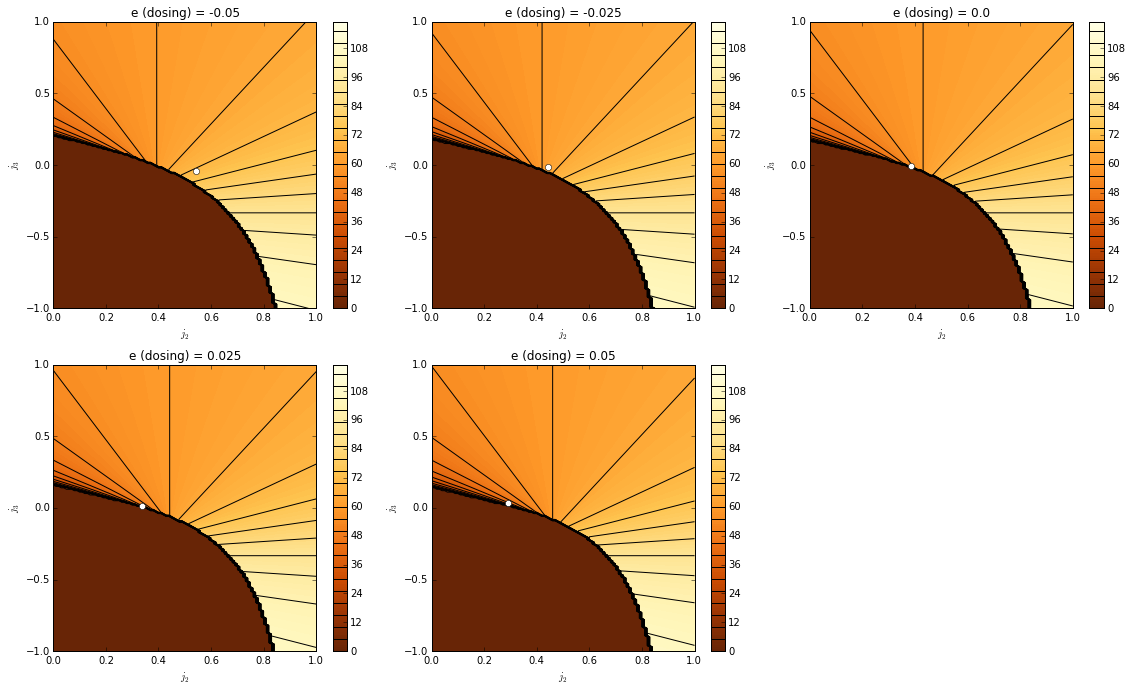

In [39]:
# Create plotting mesh
delta = 0.01
X = np.arange(0, 1.01, delta)
Y = np.arange(-1, 1.01, delta)
X, Y = np.meshgrid(X, Y)

# Set value of j4
j4list = []
for i in range(5):
    j4list.append([scaled_j_vs_chg_u312[int(i), 3], int(i + 1), scaled_j_vs_chg_u312[int(i), 0],
                   scaled_j_vs_chg_u312[int(i), 1], scaled_j_vs_chg_u312[int(i), 2]])

# Build the figure
fig = plt.figure(figsize=(16, 14))

for item in j4list:
    tmp_j4 = np.float(item[0])
    subp = item[1]
    tmp_filename = 'dftmodel_results_u312_chg' + str(item[2]) + '_z.dat.gz'
    tmp_j2 = np.float(item[3])
    tmp_j3 = np.float(item[4])
    
    # Load array
    Z_th = np.loadtxt(str(OUTPUTPATH / tmp_filename))
    
    ax = fig.add_subplot(3, 3, subp)

    # Label axes
    ax.set_xlabel("$j_{2}$")
    ax.set_ylabel("$j_{3}$")

    # Set titles
    tmp_title = r"e (dosing) = " + str(item[2])
    ax.set_title(tmp_title)
            
    # Plot surfaces
    levels = np.arange(0, 120, 1)
    j3contourf = ax.contourf(X, Y, Z_th, levels, cmap='YlOrBr_r', origin='lower')
    j3contour = ax.contour(X, Y, Z_th, levels=j3contourf.levels[::5], colors = ('k'))
    ax.plot([tmp_j2], [tmp_j3], 'wo')
    cb = fig.colorbar(j3contourf)
    cb.add_lines(j3contour)

fig.tight_layout()

### Dosing Diagram: U = 4.7 eV
[Return to Table of Contents](#Table-of-Contents)

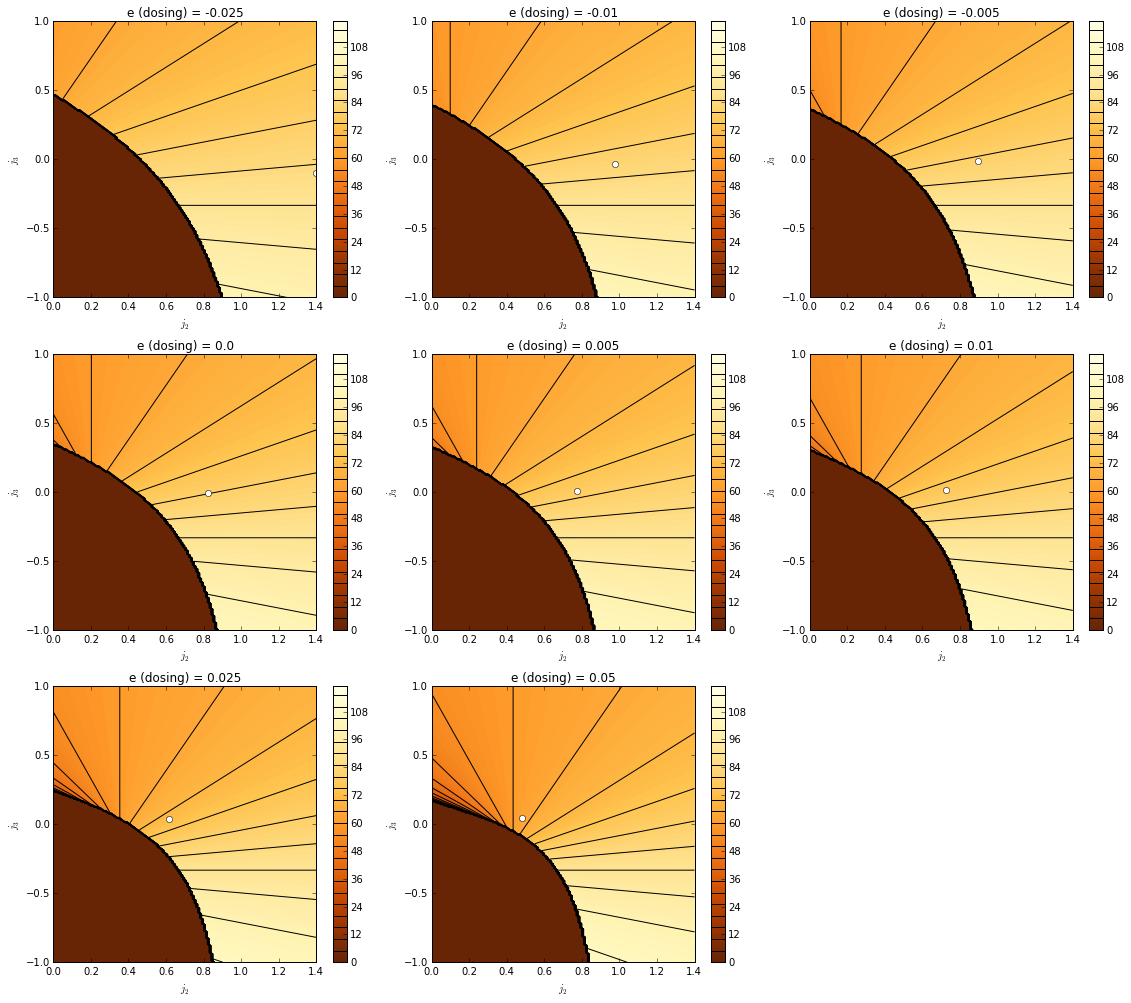

In [40]:
# Create plotting mesh
delta = 0.01
X = np.arange(0, 1.41, delta)
Y = np.arange(-1, 1.01, delta)
X, Y = np.meshgrid(X, Y)

# Set value of j4
j4list = []
for i in range(1, 9):
    j4list.append([scaled_j_vs_chg[int(i), 3], int(i), scaled_j_vs_chg[int(i), 0],
                   scaled_j_vs_chg[int(i), 1], scaled_j_vs_chg[int(i), 2]])

# Build the figure
fig = plt.figure(figsize=(16, 14))

for item in j4list:
    tmp_j4 = np.float(item[0])
    subp = item[1]
    tmp_filename = 'dftmodel_results_chg' + str(item[2]) + '_z.dat.gz'
    tmp_j2 = np.float(item[3])
    tmp_j3 = np.float(item[4])
    
    # Load array
    Z_th = np.loadtxt(str(OUTPUTPATH / tmp_filename))
    
    ax = fig.add_subplot(3, 3, subp)

    # Label axes
    ax.set_xlabel("$j_{2}$")
    ax.set_ylabel("$j_{3}$")

    # Set titles
    tmp_title = r"e (dosing) = " + str(item[2])
    ax.set_title(tmp_title)
            
    # Plot surfaces
    levels = np.arange(0, 120, 1)
    j3contourf = ax.contourf(X, Y, Z_th, levels, cmap='YlOrBr_r', origin='lower')
    j3contour = ax.contour(X, Y, Z_th, levels=j3contourf.levels[::5], colors = ('k'))
    ax.plot([tmp_j2], [tmp_j3], 'wo')
    cb = fig.colorbar(j3contourf)
    cb.add_lines(j3contour)

fig.tight_layout()

### VCA Diagram: U = 3.12 eV
[Return to Table of Contents](#Table-of-Contents)

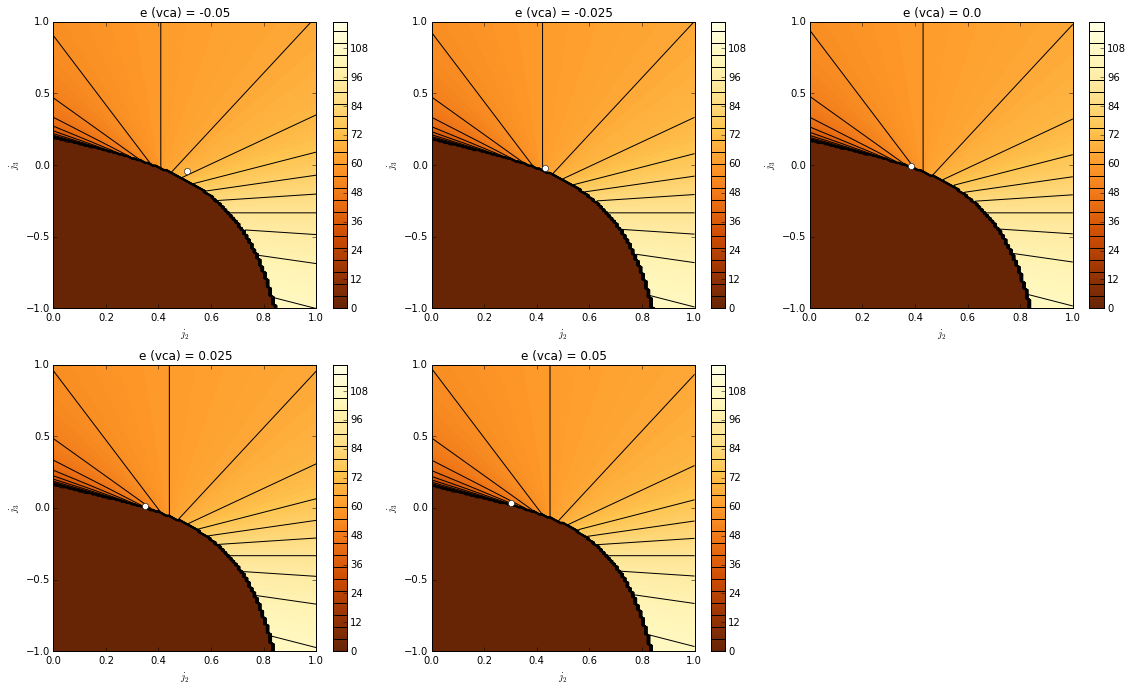

In [41]:
# Create plotting mesh
delta = 0.01
X = np.arange(0, 1.01, delta)
Y = np.arange(-1, 1.01, delta)
X, Y = np.meshgrid(X, Y)

# Set value of j4
j4list = []
for i in range(5):
    j4list.append([scaled_j_vs_vca_u312[int(i), 3], int(i + 1), scaled_j_vs_vca_u312[int(i), 0],
                   scaled_j_vs_vca_u312[int(i), 1], scaled_j_vs_vca_u312[int(i), 2]])

# Build the figure
fig = plt.figure(figsize=(16, 14))

for item in j4list:
    tmp_j4 = np.float(item[0])
    subp = item[1]
    tmp_filename = 'dftmodel_results_u312_vca' + str(item[2]) + '_z.dat.gz'
    tmp_j2 = np.float(item[3])
    tmp_j3 = np.float(item[4])
    
    # Load array
    Z_th = np.loadtxt(str(OUTPUTPATH / tmp_filename))
    
    ax = fig.add_subplot(3, 3, subp)

    # Label axes
    ax.set_xlabel("$j_{2}$")
    ax.set_ylabel("$j_{3}$")

    # Set titles
    tmp_title = r"e (vca) = " + str(item[2])
    ax.set_title(tmp_title)
            
    # Plot surfaces
    levels = np.arange(0, 120, 1)
    j3contourf = ax.contourf(X, Y, Z_th, levels, cmap='YlOrBr_r', origin='lower')
    j3contour = ax.contour(X, Y, Z_th, levels=j3contourf.levels[::5], colors = ('k'))
    ax.plot([tmp_j2], [tmp_j3], 'wo')
    cb = fig.colorbar(j3contourf)
    cb.add_lines(j3contour)

fig.tight_layout()

### VCA Diagram: U = 4.7 eV
[Return to Table of Contents](#Table-of-Contents)

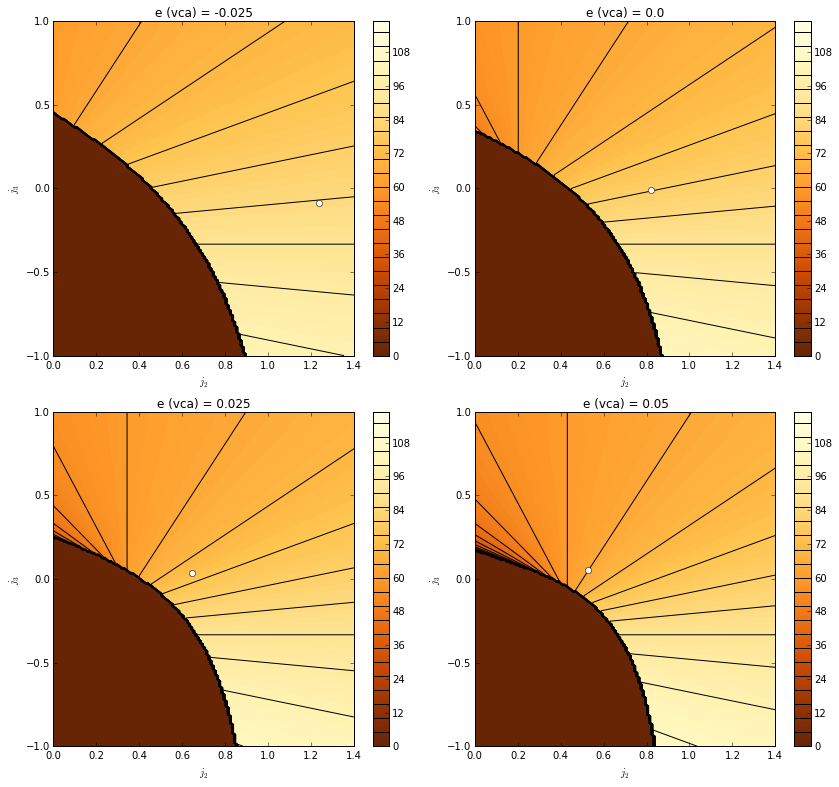

In [42]:
# Create plotting mesh
delta = 0.01
X = np.arange(0, 1.41, delta)
Y = np.arange(-1, 1.01, delta)
X, Y = np.meshgrid(X, Y)

# Set value of j4
j4list = []
for i in range(1, 5):
    j4list.append([scaled_j_vs_vca[int(i), 3], int(i), scaled_j_vs_vca[int(i), 0],
                   scaled_j_vs_vca[int(i), 1], scaled_j_vs_vca[int(i), 2]])

# Build the figure
fig = plt.figure(figsize=(12, 11))

for item in j4list:
    tmp_j4 = np.float(item[0])
    subp = item[1]
    tmp_filename = 'dftmodel_results_vca' + str(item[2]) + '_z.dat.gz'
    tmp_j2 = np.float(item[3])
    tmp_j3 = np.float(item[4])
    
    # Load array
    Z_th = np.loadtxt(str(OUTPUTPATH / tmp_filename))
    
    ax = fig.add_subplot(2, 2, subp)

    # Label axes
    ax.set_xlabel("$j_{2}$")
    ax.set_ylabel("$j_{3}$")

    # Set titles
    tmp_title = r"e (vca) = " + str(item[2])
    ax.set_title(tmp_title)
            
    # Plot surfaces
    levels = np.arange(0, 120, 1)
    j3contourf = ax.contourf(X, Y, Z_th, levels, cmap='YlOrBr_r', origin='lower')
    j3contour = ax.contour(X, Y, Z_th, levels=j3contourf.levels[::5], colors = ('k'))
    ax.plot([tmp_j2], [tmp_j3], 'wo')
    cb = fig.colorbar(j3contourf)
    cb.add_lines(j3contour)

fig.tight_layout()

### U Diagram
[Return to Table of Contents](#Table-of-Contents)

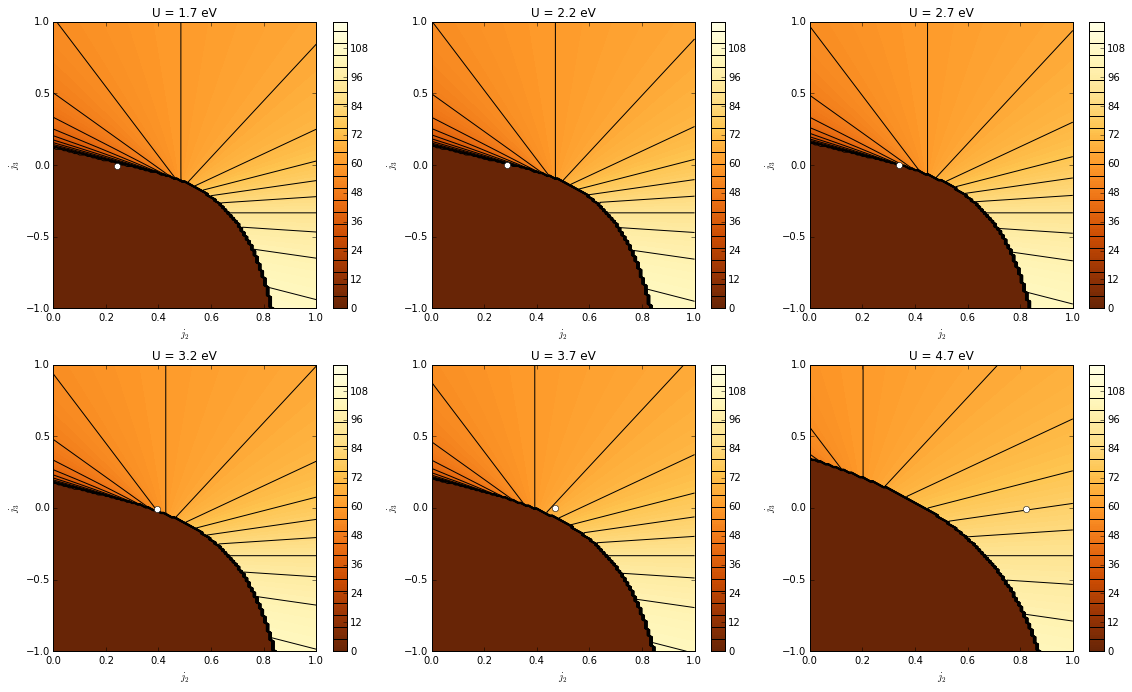

In [43]:
# Create plotting mesh
delta = 0.01
X = np.arange(0, 1.01, delta)
Y = np.arange(-1, 1.01, delta)
X, Y = np.meshgrid(X, Y)

# Set value of j4
j4list = []
for i in range(6):
    j4list.append([scaled_j_vs_u[int(i), 3], int(i + 1), scaled_j_vs_u[int(i), 0],
                   scaled_j_vs_u[int(i), 1], scaled_j_vs_u[int(i), 2]])

# Build the figure
fig = plt.figure(figsize=(16, 14))

for item in j4list:
    tmp_j4 = np.float(item[0])
    subp = item[1]
    tmp_filename = 'dftmodel_results_u' + str(item[2]) + '_z.dat.gz'
    tmp_j2 = np.float(item[3])
    tmp_j3 = np.float(item[4])
    
    # Load array
    Z_th = np.loadtxt(str(OUTPUTPATH / tmp_filename))
    
    ax = fig.add_subplot(3, 3, subp)

    # Label axes
    ax.set_xlabel("$j_{2}$")
    ax.set_ylabel("$j_{3}$")

    # Set titles
    tmp_title = r"U = " + str(item[2]) + " eV"
    ax.set_title(tmp_title)
            
    # Plot surfaces
    levels = np.arange(0, 120, 1)
    j3contourf = ax.contourf(X, Y, Z_th, levels, cmap='YlOrBr_r', origin='lower')
    j3contour = ax.contour(X, Y, Z_th, levels=j3contourf.levels[::5], colors = ('k'))
    ax.plot([tmp_j2], [tmp_j3], 'wo')
    cb = fig.colorbar(j3contourf)
    cb.add_lines(j3contour)

fig.tight_layout()

# Python code
[Return to Table of Contents](#Table-of-Contents)

This section collects Python code that users may want to run outside of the IPython notebook, due to these routines potentially requiring more resources.

## Routine to calculate $j_{2}-j_{3}-j_{4}$ phase diagrams
[Return to Table of Contents](#Table-of-Contents)

### Scanning $j_{4}$
[Return to Table of Contents](#Table-of-Contents)

Code to generate phase diagram for $J_{1}-J_{2}-J_{3}-J_{4}$ model for the range $-0.4 \leq J_{4}/\vert J_{1} \vert \leq 0.4$, iterating in steps of $J_{4}/\vert J_{1} \vert$ += $0.1$.

In [ ]:
# Import modules
from pathlib import Path
import numpy as np
from scipy.optimize import minimize_scalar


# Functions
def np_heismodel_calc(th, j2, j3, j4):
    tmp = - np.cos(th) + j2 * np.cos(2 * th) + j3 * np.cos(3 * th) + j4 * np.cos(4 * th)
    return tmp


def np_heismodel_optimize(j2, j3, j4, lower_bound, upper_bound):
    def tmp_func(x):
        return - np.cos(x) + j2 * np.cos(2 * x) + j3 * np.cos(3 * x) + j4 * np.cos(4 * x)
    return minimize_scalar(tmp_func, bounds=(lower_bound, upper_bound), method='bounded', options={'xatol': 1e-15})


# Set output path
OUTPUTPATH = Path('./output')

# Create plotting mesh
delta = 0.01
X = np.arange(0, 1.01, delta)
Y = np.arange(-1, 1.01, delta)
X, Y = np.meshgrid(X, Y)

# Set value of j4
j4list = [[-0.4, 1], [-0.3, 2], [-0.2, 3], [-0.1, 4],
          [0.0, 5],
          [0.1, 6], [0.2, 7], [0.3, 8], [0.4, 9]]

# Calculate minimized thetas on meshgrid for different values of j4
for item in j4list:
    tmp_j4 = np.float(item[0])
    subp = item[1]
    
    # Create empty arrays
    Z_E = 0*X + 0*Y
    Z_th = 0*X + 0*Y
    
    # Build final Z array
    for row in np.arange(len(Z_E)):
        tmp = Z_E[row]
        for col in np.arange(len(tmp)):
            tmp_fm_energy = np_heismodel_calc(0, X[row, col], Y[row, col], tmp_j4)
            tmp_res = np_heismodel_optimize(X[row, col], Y[row, col], tmp_j4, 0, 3 * np.pi / 4)
            tmp_angle = tmp_res.x * 180 / np.pi
            if np.abs(tmp_angle) < 1e-3:
                Z_E[row, col] = np_heismodel_calc(0, X[row, col], Y[row, col], tmp_j4)
                Z_th[row, col] = 0
            else:
                tmp_delta = tmp_res.fun - tmp_fm_energy
                if tmp_delta < 0:
                    Z_E[row, col] = tmp_res.fun
                    Z_th[row, col] = tmp_angle
                else:
                    Z_E[row, col] = tmp_fm_energy
                    Z_th[row, col] = 0
    
    # Output Z_th to plain text file
    tmp_filename = 'j1j2j3j4model_j4' + str(tmp_j4) + '_z.dat.gz'
    tmp_header = ('Created with np.meshgrid(X, Y) with X = np.arange(0, 1.01, delta); '
                  'Y = np.arange(-1, 1.01, delta), and delta = ' + str(delta))
    np.savetxt(str(OUTPUTPATH / tmp_filename), Z_th, fmt='%12.7f', delimiter=' ',
               header=tmp_header)

### Using fitted exchange parameters
[Return to Table of Contents](#Table-of-Contents)

Code to calculate the $J_{1}-J_{2}-J_{3}-J_{4}$ phase diagrams for MnAu$_{2}$ under pressure, charge dosing, VCA, and variation in $U$. The different variables are commented out, from one # mark to seven # marks.

In [ ]:
# Import modules
from pathlib import Path
import numpy as np
from scipy.optimize import minimize_scalar


# Functions
def np_heismodel_calc(th, j2, j3, j4):
    tmp = - np.cos(th) + j2 * np.cos(2 * th) + j3 * np.cos(3 * th) + j4 * np.cos(4 * th)
    return tmp


def np_heismodel_optimize(j2, j3, j4, lower_bound, upper_bound):
    def tmp_func(x):
        return - np.cos(x) + j2 * np.cos(2 * x) + j3 * np.cos(3 * x) + j4 * np.cos(4 * x)
    return minimize_scalar(tmp_func, bounds=(lower_bound, upper_bound), method='bounded', options={'xatol': 1e-15})


# Set output path
OUTPUTPATH = Path('./output')

# Set value of j4
j4list = []
#for i in range(7):
#    j4list.append([scaled_j_vs_p[int(i), 3], int(i + 1), scaled_j_vs_p[int(i), 0]])
##for i in range(1,9):
##    j4list.append([scaled_j_vs_chg[int(i), 3], int(i), scaled_j_vs_chg[int(i), 0]])
###for i in range(1, 5):
###    j4list.append([scaled_j_vs_vca[int(i), 3], int(i), scaled_j_vs_vca[int(i), 0]])
####for i in range(7):
####    j4list.append([scaled_j_vs_p_u312[int(i), 3], int(i + 1), scaled_j_vs_p_u312[int(i), 0]])
#####for i in range(5):
#####    j4list.append([scaled_j_vs_chg_u312[int(i), 3], int(i + 1), scaled_j_vs_chg_u312[int(i), 0]])
######for i in range(5):
######    j4list.append([scaled_j_vs_vca_u312[int(i), 3], int(i + 1), scaled_j_vs_vca_u312[int(i), 0]])
#######for i in range(6):
#######    j4list.append([scaled_j_vs_u[int(i), 3], int(i + 1), scaled_j_vs_u[int(i), 0]])

# Create plotting mesh
delta = 0.01
#X = np.arange(0, 1.26, delta)
#Y = np.arange(-1, 1.01, delta)
##X = np.arange(0, 1.41, delta)
##Y = np.arange(-1, 1.01, delta)
###X = np.arange(0, 1.41, delta)
###Y = np.arange(-1, 1.01, delta)
####X = np.arange(0, 1.01, delta)
####Y = np.arange(-1, 1.01, delta)
#####X = np.arange(0, 1.01, delta)
#####Y = np.arange(-1, 1.01, delta)
######X = np.arange(0, 1.01, delta)
######Y = np.arange(-1, 1.01, delta)
#######X = np.arange(0, 1.01, delta)
#######Y = np.arange(-1, 1.01, delta)
X, Y = np.meshgrid(X, Y)

# Calculate minimized thetas on meshgrid for different values of j4
for item in j4list:
    tmp_j4 = np.float(item[0])
    subp = item[1]
    #tmp_filename = 'dftmodel_results_p' + str(item[2]) + '_z.dat.gz'
    ##tmp_filename = 'dftmodel_results_chg' + str(item[2]) + '_z.dat.gz'
    ###tmp_filename = 'dftmodel_results_vca' + str(item[2]) + '_z.dat.gz'
    ####tmp_filename = 'dftmodel_results_u312_p' + str(item[2]) + '_z.dat.gz'
    #####tmp_filename = 'dftmodel_results_u312_chg' + str(item[2]) + '_z.dat.gz'
    ######tmp_filename = 'dftmodel_results_u312_vca' + str(item[2]) + '_z.dat.gz'
    #######tmp_filename = 'dftmodel_results_u' + str(item[2]) + '_z.dat.gz'
    
    # Create empty arrays
    Z_E = 0*X + 0*Y
    Z_th = 0*X + 0*Y
    
    # Build final Z array
    for row in np.arange(len(Z_E)):
        tmp = Z_E[row]
        for col in np.arange(len(tmp)):
            tmp_fm_energy = np_heismodel_calc(0, X[row, col], Y[row, col], tmp_j4)
            tmp_res = np_heismodel_optimize(X[row, col], Y[row, col], tmp_j4, 0, 3*np.pi/4)
            tmp_angle = tmp_res.x * 180 / np.pi
            if np.abs(tmp_angle) < 1e-3:
                Z_E[row, col] = np_heismodel_calc(0, X[row, col], Y[row, col], tmp_j4)
                Z_th[row, col] = 0
            else:
                tmp_delta = tmp_res.fun - tmp_fm_energy
                if tmp_delta < 0:
                    Z_E[row, col] = tmp_res.fun
                    Z_th[row, col] = tmp_angle
                else:
                    Z_E[row, col] = tmp_fm_energy
                    Z_th[row, col] = 0
    
    # Output Z_th to plain text file
    tmp_header = ('Created with np.meshgrid(X, Y) with X = np.arange(0, 1.01, delta); '
                  'Y = np.arange(-1, 1.01, delta), and delta = ' + str(delta))
    np.savetxt(str(OUTPUTPATH / tmp_filename), Z_th, fmt='%12.7f', delimiter=' ',
               header=tmp_header)

## Routine to calculate contour plot of $j_{2}, j_{3}, j_{4}$ surface separating FM and spiral phases
[Return to Table of Contents](#Table-of-Contents)

In [ ]:
# Import modules
from pathlib import Path
import numpy as np
from scipy.optimize import minimize_scalar


# Raw path for data files
OUTPUTPATH = Path('./output')


# Define function to calculate energies of the J1-J2-J3 model
def heismodel_calc(x, j2, j3, j4):
    tmp = - np.cos(x) + j2 * np.cos(2 * x) + j3 * np.cos(3 * x) + j4 * np.cos(4 * x)
    return tmp


def heismodel_optimize(j2, j3, j4):
    def tmp_func(x):
        return - np.cos(x) + j2 * np.cos(2 * x) + j3 * np.cos(3 * x) + j4 * np.cos(4 * x)
    return minimize_scalar(tmp_func, bounds=(0, 3*np.pi/4), method='bounded', options={'xatol': 1e-15})


# Create plotting mesh
# Commented out portion generated larger version of critical parameter contour plot
#delta = 0.01
#X = np.arange(-1.00, 1.01, delta)
#Y = np.arange(-1.00, 1.01, delta)
delta = 0.001
X = np.arange(-0.15, 0.061, delta)
Y = np.arange(-0.40, 0.051, delta)
X, Y = np.meshgrid(X, Y)
Z_j2 = 0*X + 0*Y

#tmp_filename = 'critical_j2j3j4.dat.gz'
tmp_filename = 'critical_j2j3j4_zoomed.dat.gz'
j2 = np.arange(0, 1.1, 0.001)

for row in np.arange(len(Z_j2)):
    if row % 1 == 0:
        print("Analyzing row number", str(row + 1))
    tmp = Z_j2[row]
    for col in np.arange(len(tmp)):
        for tmp_j2 in j2:
            tmp_fm_energy = heismodel_calc(0, tmp_j2, X[row, col], Y[row, col])
            tmp_res = heismodel_optimize(tmp_j2, X[row, col], Y[row, col])
            tmp_angle = tmp_res.x * 180 / np.pi
            if np.abs(tmp_angle) > 1e-3:
                tmp_delta = tmp_res.fun - tmp_fm_energy
                if tmp_delta < 0:
                    Z_j2[row, col] = tmp_j2
                    break

# Output Z_th to plain text file
tmp_header = ('Created with np.meshgrid(X, Y) with X = np.arange(-0.15, 0.061, delta); '
              'Y = np.arange(-0.40, 0.051, delta), and delta = ' + str(delta))
np.savetxt(str(OUTPUTPATH / tmp_filename), Z_j2, fmt='%12.7f', delimiter=' ',
           header=tmp_header)

## Routine to find the 1st/2nd order dividing line in $j_{3}, j_{4}$ space
[Return to Table of Contents](#Table-of-Contents)

In [ ]:
# Import modules
from pathlib import Path
import numpy as np

# Raw path for data files
OUTPUTPATH = Path('./output/MnAu2')

# Functions
def first_order_check(j3, j4):
    tmp = - (1 + 64 * j4)/15
    if j3 < tmp:
        return True
    else:
        return False


def j2c_calc(j3, j4):
    tmp = (1/4) * (1 - 9 * j3 - 16 * j4)
    return tmp


# Create plotting mesh
# Commented out portion found line for larger region of (j3, j4) space
# delta = 0.01
# X = np.arange(-1, 1.01, delta)
# Y = np.arange(-1, 1.01, delta)
# X, Y = np.meshgrid(X, Y)
# Z_j2 = np.loadtxt(str(OUTPUTPATH / "critical_j2j3j4.dat.gz"))
delta = 0.001
X = np.arange(-0.15, 0.061, delta)
Y = np.arange(-0.40, 0.051, delta)
X, Y = np.meshgrid(X, Y)
Z_j2 = np.loadtxt(str(OUTPUTPATH / "critical_j2j3j4_zoomed.dat.gz"))

# Extract number of rows and columns
nrow, ncol = Z_j2.shape

dividing_line = []

for col in range(ncol):
    searching = True
    if col % 2 == 0:
        print("Analyzing col number", str(col + 1))
    while (searching is True):
        for row in range(nrow):
            test_first_order = first_order_check(X[row, col], Y[row, col])
            if test_first_order is False:
                pred_j2c = j2c_calc(X[row, col], Y[row, col])
                calc_j2c = Z_j2[row, col]
                delta_j2c = np.abs(calc_j2c - pred_j2c)
                if delta_j2c < 5e-3:
                    dividing_line.append([X[row, col], Y[row, col]])
                    searching = False
                    break
        else:
            searching = False

# Convert to numpy array
dividing_line = np.array(dividing_line)

# Save results
# np.savetxt(str(OUTPUTPATH / "j3j4_dividing_line.dat"), dividing_line,
#            fmt='%12.7f', delimiter=' ')
np.savetxt(str(OUTPUTPATH / "j3j4_dividing_line_zoomed.dat"), dividing_line,
           fmt='%12.7f', delimiter=' ')